In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # Para formatear los ejes
from scipy.stats import norm

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' No hay filas duplicadas.
'''

len(df.drop_duplicates()) 

240000

In [5]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

id     antiguedad   habitaciones        garages  \
count  240000.000000  196445.000000  217529.000000  202235.000000   
mean   149969.382092       8.116114       2.902326       1.546874   
std     86634.579744       9.553830       0.896894       0.853507   
min         1.000000       0.000000       1.000000       0.000000   
25%     74930.750000       0.000000       2.000000       1.000000   
50%    149875.500000       5.000000       3.000000       2.000000   
75%    225016.500000      10.000000       3.000000       2.000000   
max    299999.000000      80.000000      10.000000       3.000000   

               banos  metroscubiertos  metrostotales        idzona  \
count  213779.000000    222600.000000  188533.000000  2.113790e+05   
mean        2.132417       174.016774     176.765145  2.423468e+06   
std         0.912546        98.152950      94.427328  1.056794e+07   
min         1.000000        15.000000      15.000000  2.200000e+01   
25%         1.000000        90.000000     102.000000  2.489000e+04   
50%         2.000000       153.000000     155.000000  5.638300e+04   
75%         3.000000       240.000000     238.000000  8.783800e+04   
max         4.000000       439.000000     439.000000  5.000400e+07   

                 lat            lng       gimnasio  usosmultiples  \
count  116512.000000  116512.000000  240000.000000  240000.000000   
mean       20.696818     -99.509221       0.062475       0.055092   
std         3.137884       9.744143       0.242017       0.228160   
min      -100.886679    -125.859375       0.000000       0.000000   
25%        19.359846    -100.977908       0.000000       0.000000   
50%        19.543273     -99.240387       0.000000       0.000000   
75%        20.740005     -99.134777       0.000000       0.000000   
max        83.026219     121.036000       1.000000       1.000000   

             piscina  escuelascercanas  centroscomercialescercanos  \
count  240000.000000     240000.000000               240000.000000   
mean        0.087383          0.444142                    0.396533   
std         0.282397          0.496871                    0.489179   
min         0.000000          0.000000                    0.000000   
25%         0.000000          0.000000                    0.000000   
50%         0.000000          0.000000                    0.000000   
75%         0.000000          1.000000                    1.000000   
max         1.000000          1.000000                    1.000000   

             precio  
count  2.400000e+05  
mean   2.530838e+06  
std    2.152552e+06  
min    3.100000e+05  
25%    9.527725e+05  
50%    1.850000e+06  
75%    3.390000e+06  
max    1.252500e+07

In [6]:
''' Hay todo tipo de datos incorrectos
'''

df[['direccion', 'descripcion', 'titulo']]

direccion  \
0       Avenida Division del Norte 2005   
1                            AV. MEXICO   
2                           Urbi Tonala   
3         IGNACIO MANUEL ALTAMIRANO 128   
4                       PASEOS DEL SOL    
...                                 ...   
239995                          BOSQUES   
239996              Filiberto Navas 325   
239997                 Nicolas San Juan   
239998            Javier Rojo Gomez 120   
239999                        AVE. STIM   

                                              descripcion  \
0       depto. interior de 80.15m2, consta de sala com...   
1       <p>entre sonora y guerrero, atr&aacute;s del h...   
2       descripcion \nla mejor ubicacion residencial e...   
3       casa en privada con caseta de vigilancia casas...   
4       bonito departamento en excelentes condiciones ...   
...                                                   ...   
239995  vendo casa en bosques de ica residencial a 10 ...   
239996  casa con un jardin amplio, un cuarto de servic...   
239997  departamento con excelente ubicación, muy cerc...   
239998  casa sola, dividida en cuatro departamentos de...   
239999  id:19816, muy bonito e iluminado departamento,...   

                                                   titulo  
0                                       depto. tipo a-402  
1                          condominio horizontal en venta  
2                   casa en venta urbi 3 recamaras tonala  
3       casa sola en toluca zinacantepec con credito i...  
4                                          paseos del sol  
...                                                   ...  
239995  bonita casas de 2 recamaras a 10 minutos del c...  
239996  casa en condominio a 10 min. del centro de toluca  
239997                                   nicolas san juan  
239998                      casa sola. javier rojo gomez.  
239999  departamento en bosques de las lomas  / av. st...  

[240000 rows x 3 columns]

In [7]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format') #Sólo por si posteriormente se cambia el formato de los float
df['precio'].sample(5)

123548    2638000.0
115927    5620000.0
203558    2050000.0
221330    1400000.0
52019      550000.0
Name: precio, dtype: float64

In [8]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [9]:
''' Reacomodamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

ID                                             Titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

        TipoPropiedad     Precio                Fecha  Antiguedad  \
0         Apartamento  2273000.0  2015-08-23 00:00:00         NaN   
1  Casa en condominio  3600000.0  2013-06-28 00:00:00        10.0   
2                Casa  1200000.0  2015-10-17 00:00:00         5.0   
3                Casa   650000.0  2012-03-09 00:00:00         1.0   
4         Apartamento  1150000.0  2016-06-07 00:00:00        10.0   

   MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
0                      80.0                    80.0   
1                     268.0                   180.0   
2                     144.0                   166.0   
3                      63.0                    67.0   
4                      95.0                    95.0   

                                         Descripcion  CantHabitaciones  \
0  depto. interior de 80.15m2, consta de sala com...               2.0   
1  <p>entre sonora y guerrero, atr&aacute;s del h...               3.0   
2  descripcion \nla mejor ubicacion residencial e...               3.0   
3  casa en privada con caseta de vigilancia casas...               2.0   
4  bonito departamento en excelentes condiciones ...               2.0   

   CantGarages  CantBanos   IDZona                        Direccion  \
0          1.0        2.0  23533.0  Avenida Division del Norte 2005   
1          2.0        2.0  24514.0                       AV. MEXICO   
2          2.0        2.0  48551.0                      Urbi Tonala   
3          1.0        1.0  53666.0    IGNACIO MANUEL ALTAMIRANO 128   
4          1.0        1.0  47835.0                  PASEOS DEL SOL    

                   Ciudad         Provincia    Latitud   Longitud  \
0           Benito Juárez  Distrito Federal        NaN        NaN   
1  La Magdalena Contreras  Distrito Federal  19.310205 -99.227655   
2                  Tonalá           Jalisco        NaN        NaN   
3            Zinacantepec    Edo. de México  19.301890 -99.688015   
4                 Zapopan           Jalisco        NaN        NaN   

   TieneGimnasio  TieneUsosMultiples  TienePileta  TieneEscuelasCerca  \
0            0.0                 0.0          0.0                 0.0   
1            0.0                 0.0          0.0                 1.0   
2            0.0                 0.0          0.0                 0.0   
3            0.0                 0.0          0.0                 1.0   
4            0.0                 0.0          0.0                 0.0   

   TieneShoppingsCerca  
0                  0.0  
1                  1.0  
2                  0.0  
3                  1.0  
4                  0.0

In [10]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11328411102295

In [11]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antiguedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBanos'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299999, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12525000.0]

In [12]:
''' Adecuación de tipos para columnas sin NaN. 
'''

#int
dfok['ID'] = dfok['ID'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMultiples'] = dfok['TieneUsosMultiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

In [13]:
dfok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
ID                          240000 non-null uint32
Titulo                      234613 non-null object
TipoPropiedad               239954 non-null object
Precio                      240000 non-null uint32
Fecha                       240000 non-null datetime64[ns]
Antiguedad                  196445 non-null float64
MetrosCuadradosCubiertos    222600 non-null float64
MetrosCuadradosTotales      188533 non-null float64
Descripcion                 238381 non-null object
CantHabitaciones            217529 non-null float64
CantGarages                 202235 non-null float64
CantBanos                   213779 non-null float64
IDZona                      211379 non-null float64
Direccion                   186928 non-null object
Ciudad                      239628 non-null object
Provincia                   239845 non-null object
Latitud                     116512 non-null float64
Longit

In [14]:
"""''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() """;

In [15]:
pd.options.display.max_colwidth = 1000 ## Ver strings largos
dfok[ ( dfok['MetrosCuadradosCubiertos'] > dfok['MetrosCuadradosTotales'] ) & ( dfok['ID'] >= 47890 ) ].head()

ID                                  Titulo       TipoPropiedad  \
1    53461          condominio horizontal en venta  Casa en condominio   
12   47890  hermosa casa en zibata queretaro 170m²                Casa   
13  130216      casa matias romero - sión bancaria                Casa   
14  181436             casa en venta en valle real                Casa   
21  224513              casa en venta en querétaro  Casa en condominio   

     Precio      Fecha  Antiguedad  MetrosCuadradosCubiertos  \
1   3600000 2013-06-28        10.0                     268.0   
12  1500000 2013-08-12         0.0                     170.0   
13  3000000 2015-03-31        20.0                     227.0   
14  5300000 2014-11-25         NaN                     250.0   
21  2300000 2016-02-01         NaN                     181.0   

    MetrosCuadradosTotales  \
1                    180.0   
12                   141.0   
13                   185.0   
14                   231.0   
21                   150.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Descripcion  \
1   <p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>   
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            <p><strong>casa </strong>en venta en fraccionamiento con campo de golf <strong>zibat&aacute;</strong>, 141.4 m de terreno, 170 m de construcci&oacute;n, en esquina, jardin de 98 m, 3 recamaras, 2 1/2 ba&ntilde;os, cocina, cochera 2 autos.</p>   
13                                                   flamante casa habitación en condominio horizontal, desarrollada en 3 niveles. planta baja: estancia, comedor, cocina con desayunador, sala, cuarto de tv, 3 recamaras, 2 baños completos, patio de servicio, cuarto de servicio con baño, estacionamiento para 2 vehículos con cochera semicubierta; ubicada en la calle matías romero, colonia del valle.  la mejor zona de méxico. 3 niveles, cochera, condominio horizontal. 227 m2 construcción 185 m2 terreno etapa - emplazamiento entrega - 36 meses solo pagos de contado.  garantía de entrega**invierte 3 ya que su valor comercial es de $6. los remates bancarios son una gran opción de sión y no representan riesgo alguno.   
14                                                                                                   

#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, pero si se mira la descripción se ve que esto no es un error: es sólo una nomenclatura confusa.

In [16]:
pd.options.display.max_colwidth = 100 # Volver a strings más cortos 
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

### Algunos graficos basicos sobre como se distribuyen las propiedades

In [17]:
dfok["Antiguedad"].describe()

count    196445.000000
mean          8.116114
std           9.553830
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          80.000000
Name: Antiguedad, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

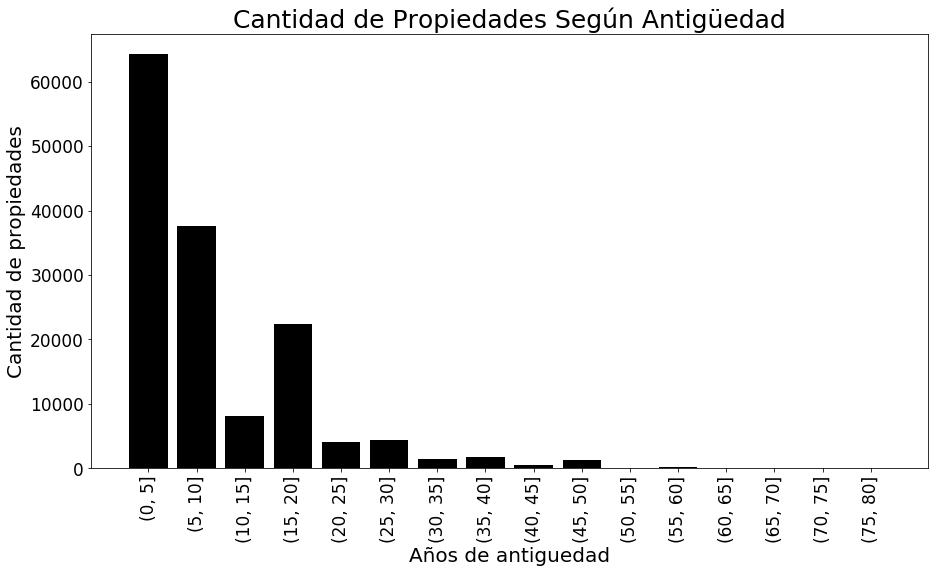

In [18]:
bins = pd.cut(dfok["Antiguedad"], [i for i in range(0, 81, 5)])
df_ant = dfok.groupby(bins).size()
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_ant.index.astype(str), df_ant.values, color = 'black')
plt.xlabel("Años de antiguedad", fontsize=20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.title("Cantidad de Propiedades Según Antigüedad", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.xticks(rotation = 90)


### Podemos ver que la mayoria de las propiedades tienen una antiguedad relativamente baja(0-10 años) junto con una gran cantidad teniendo entre 15 y 20 años.

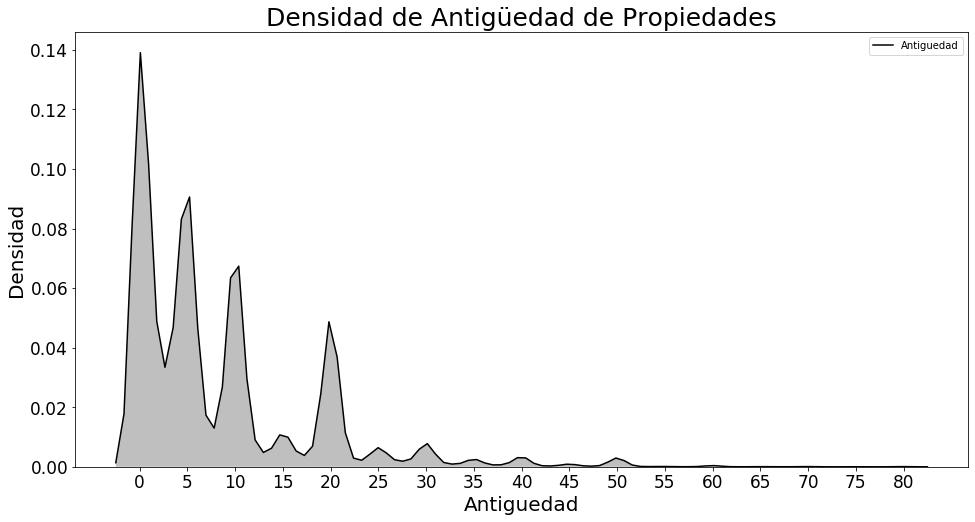

In [19]:
df_ant = dfok[pd.notnull(dfok["Antiguedad"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['Antiguedad'], shade=True, color = 'black')
plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Antiguedad", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Antigüedad de Propiedades", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


### Los distintos picos que se ven nos permiten concluir que, a pesar de que la antiguedad es cualquier numero natural, la gente suele asignarle valores que sean multiplos de 10 o de 5 con menor frecuencia (es decir, 20 años por sobre 19 o 21, 30 por sobre 29, 28 o 31, 15 por sobre 14 o 13, etc)

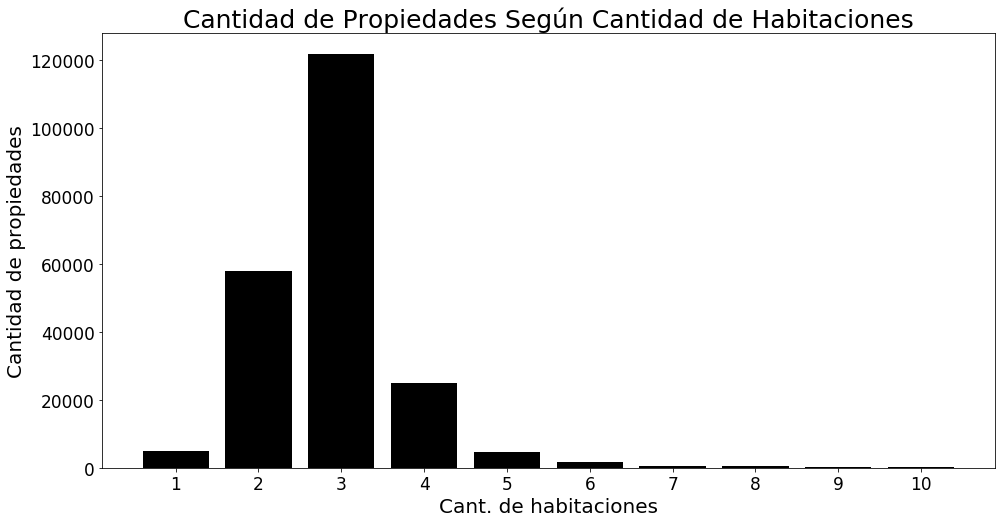

In [20]:
df_hab = dfok.groupby("CantHabitaciones").size()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_hab.index, df_hab.values, color = 'black')
plt.xlabel("Cant. de habitaciones", fontsize =20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.xticks([i for i in range(1,11)])
plt.title("Cantidad de Propiedades Según Cantidad de Habitaciones", fontsize=25
         );

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

### Se puede observar que la  gran mayoria de las casas cuentan con 2 o 3 habitaciones y 4 con menor frecuencia.

In [21]:
df_pubmes = dfok.copy()

In [22]:
df_pubmes["Fecha"] = df_pubmes["Fecha"].astype('datetime64')

In [23]:
df_pubmes.index = df_pubmes["Fecha"]

In [24]:
df_pubmes = pd.DataFrame(df_pubmes.resample('M').size()).reset_index()

In [25]:
df_pubmes = df_pubmes.rename(columns={0:"Cantidad"})

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


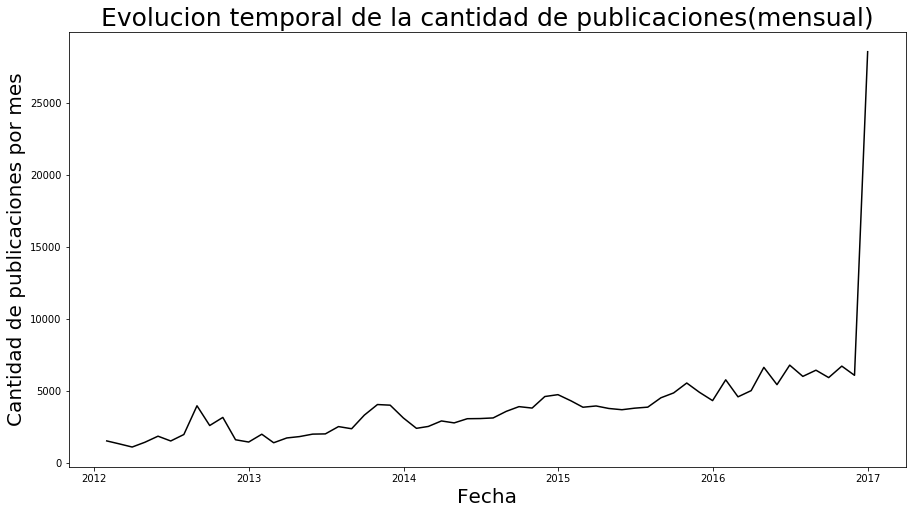

In [26]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubmes, color="black")
plt.title("Evolucion temporal de la cantidad de publicaciones(mensual)", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de publicaciones por mes", fontsize=20);

### Veamos como varia la cantidad mensual de publicaciones para cada año

In [27]:
df_pub_an = dfok.copy()

In [28]:
df_pub_an["Fecha"] = df_pub_an["Fecha"].astype('datetime64')

In [29]:
df_pub_an.index = df_pub_an["Fecha"]

In [30]:
df_pub_an = pd.DataFrame(df_pub_an.resample('M').size())

In [31]:
pub_12 = df_pub_an["2012-01-01":"2013-01-01"].reset_index()

In [32]:
pub_13 = df_pub_an["2013-01-01":"2014-01-01"].reset_index()

In [33]:
pub_14 = df_pub_an["2014-01-01":"2015-01-01"].reset_index()

In [34]:
pub_15 = df_pub_an["2015-01-01":"2016-01-01"].reset_index()

In [35]:
pub_16 = df_pub_an["2016-01-01":"2017-01-01"].reset_index()

In [36]:
pub_12 = pub_12.rename(columns={0:"Cantidad"})

In [37]:
pub_13 = pub_13.rename(columns={0:"Cantidad"})

In [38]:
pub_14 = pub_14.rename(columns={0:"Cantidad"})

In [39]:
pub_15 = pub_15.rename(columns={0:"Cantidad"})

In [40]:
pub_16 = pub_16.rename(columns={0:"Cantidad"})

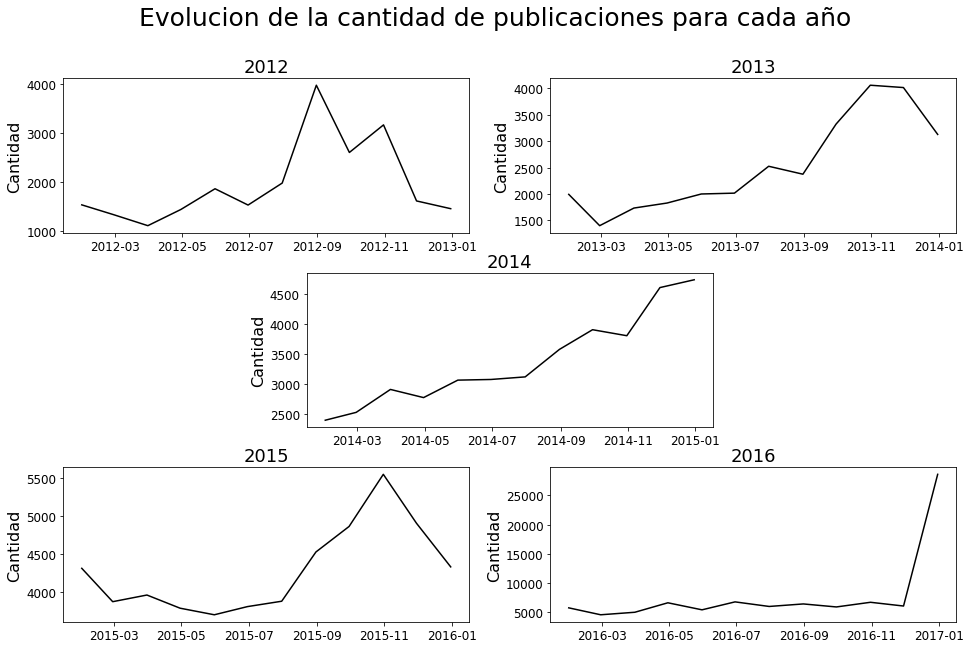

In [41]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(6, 4, hspace=0.7, wspace=0.5)
pubs_12 = fig.add_subplot(grid[:2, 0:2])
pubs_13 = fig.add_subplot(grid[:2, 2:])
pubs_14 = fig.add_subplot(grid[2:4, 1:3])
pubs_15 = fig.add_subplot(grid[4:6, 0:2])
pubs_16 = fig.add_subplot(grid[4:6, 2:4])


pubs_12.plot("Fecha", "Cantidad", data=pub_12, color="black")
pubs_13.plot("Fecha", "Cantidad", data=pub_13, color="black")
pubs_14.plot("Fecha", "Cantidad", data=pub_14, color="black")
pubs_15.plot("Fecha", "Cantidad", data=pub_15, color="black")
pubs_16.plot("Fecha", "Cantidad", data=pub_16, color="black")

pubs_12.title.set_text("2012")
pubs_13.title.set_text("2013")
pubs_14.title.set_text("2014")
pubs_15.title.set_text("2015")
pubs_16.title.set_text("2016")

pubs_12.title.set_size(18)
pubs_13.title.set_size(18)
pubs_14.title.set_size(18)
pubs_15.title.set_size(18)
pubs_16.title.set_size(18)


pubs_12.set_ylabel("Cantidad", fontsize=16)
pubs_13.set_ylabel("Cantidad", fontsize=16)
pubs_14.set_ylabel("Cantidad", fontsize=16)
pubs_15.set_ylabel("Cantidad", fontsize=16)
pubs_16.set_ylabel("Cantidad", fontsize=16)

pubs_12.tick_params(axis='both', which='major', labelsize = 12)
pubs_12.tick_params(axis='both', which='minor', labelsize = 12)

pubs_13.tick_params(axis='both', which='major', labelsize = 12)
pubs_13.tick_params(axis='both', which='minor', labelsize = 12)

pubs_14.tick_params(axis='both', which='major', labelsize = 12)
pubs_14.tick_params(axis='both', which='minor', labelsize = 12)

pubs_15.tick_params(axis='both', which='major', labelsize = 12)
pubs_15.tick_params(axis='both', which='minor', labelsize = 12)

pubs_16.tick_params(axis='both', which='major', labelsize = 12)
pubs_16.tick_params(axis='both', which='minor', labelsize = 12)


fig.suptitle('Evolucion de la cantidad de publicaciones para cada año', size=25);

### Veamos si hay alguna peculiaridad con el mes de diciembre de 2016 que parece tener un gran pico en la cantidad de publicaciones, podria ser que algunos datos se hayan capeado con el ultimo dia del año o alguna situacion similar.

In [42]:
df_pubdic = dfok.copy()

In [43]:
df_pubdic["Fecha"] = df_pubdic["Fecha"].astype('datetime64')

In [44]:
df_pubdic.index = df_pubdic["Fecha"]

In [45]:
df_pubdic = df_pubdic.sort_index()

In [46]:
df_pubdic = df_pubdic["2016-12-01 00:00:00":"2017-01-02 00:00:00"]

In [47]:
df_pubdic = pd.DataFrame(df_pubdic.resample('D').size()).reset_index()

In [48]:
df_pubdic = df_pubdic.rename(columns={0:"Cantidad"})

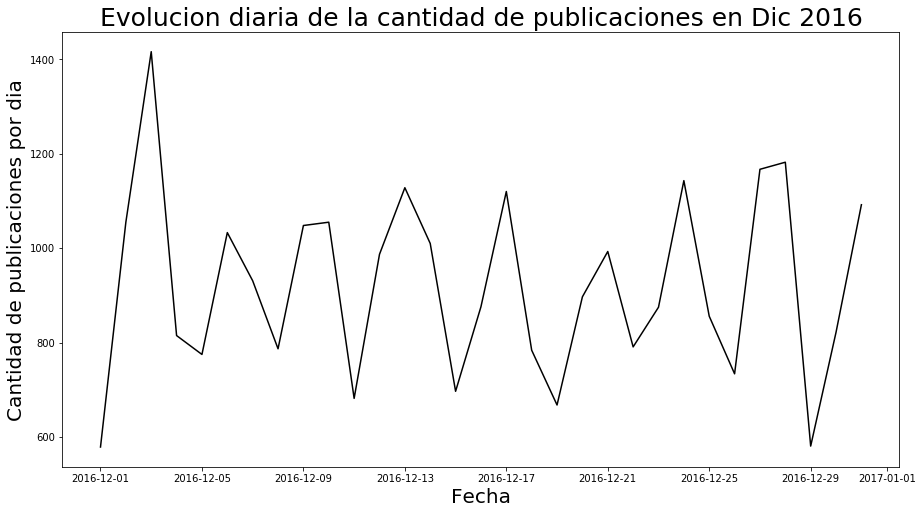

In [49]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubdic, color="black")
plt.title("Evolucion diaria de la cantidad de publicaciones en Dic 2016", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de publicaciones por dia", fontsize=20);

### Como podemos observar no parece haber una acumulacion de publicaciones en un dia particular del mes, por lo que no parece haber alguna alteracion de los datos en ese sentido.

In [50]:
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

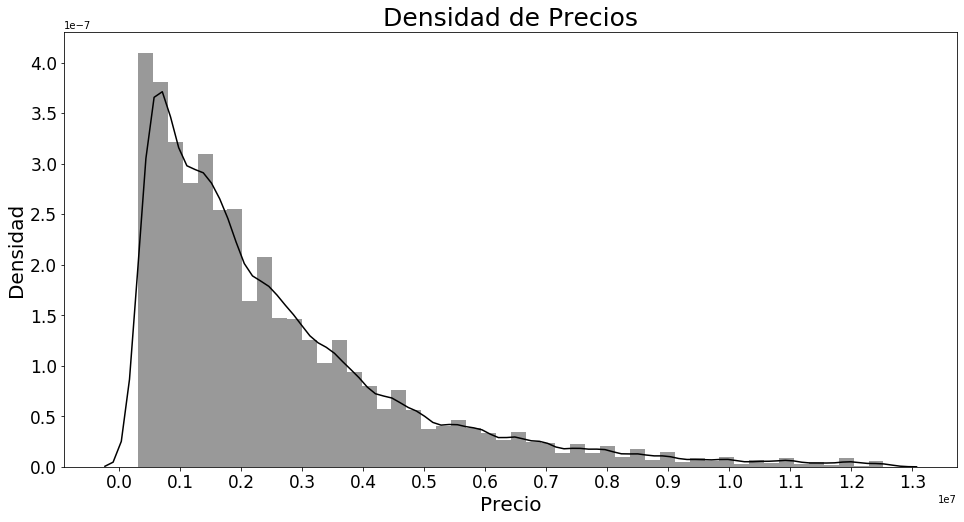

In [51]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(dfok['Precio'], color = 'black')
plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Precios", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

#### Veamos si efectivamente los precios siguen una distribucion Log-normal, esto lo haremos aplicando logaritmo a los precios y viendo si lo resultante sigue una distribucion normal

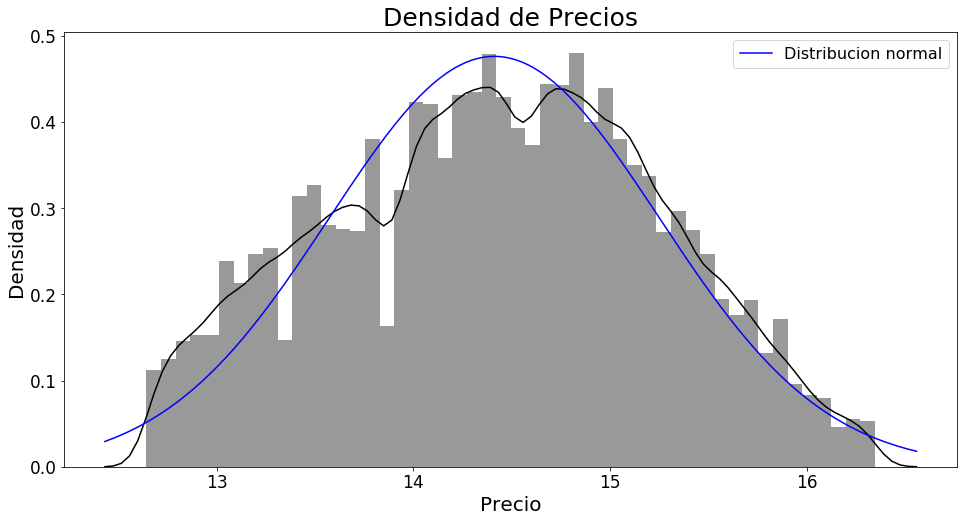

In [52]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(np.log(dfok['Precio']), color = 'black', fit=norm, fit_kws={"color":"blue"})
# plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.legend(["Distribucion normal"], fontsize=16)
plt.title("Densidad de Precios", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

## Ver con cual de los dos graficos nos quedamos

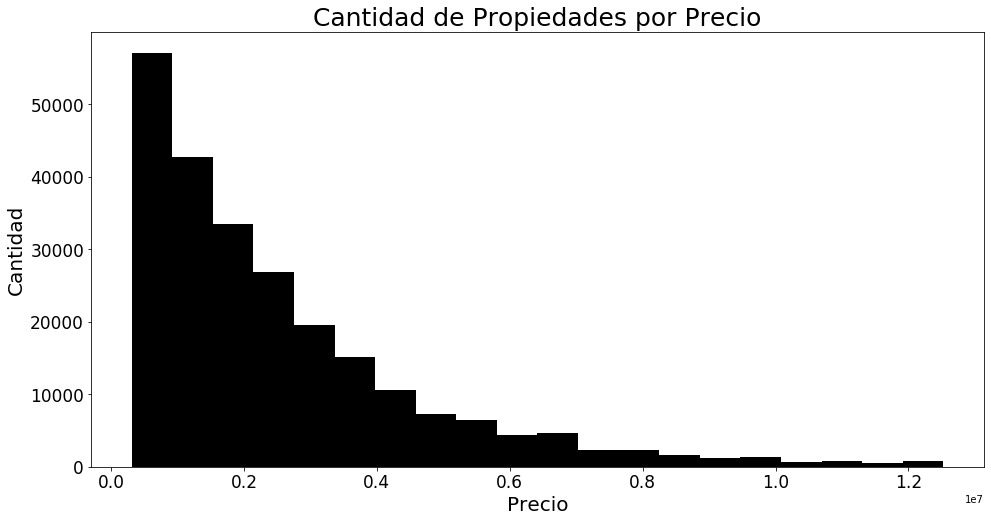

In [53]:
''' ¿Hay más propiedades caras o baratas?'''

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Precio", fontsize = 20);
plt.ylabel("Cantidad", fontsize = 20);

# Título
plt.title("Cantidad de Propiedades por Precio", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
    # plt.xticks(rotation = 90)

# Límites para cada coordenada
    # plt.ylim([13, 34]);
    # plt.xlim([-116, -86]);

# Tipo de gráficok
plt.hist(dfok['Precio'], color = 'black', bins = 20);

''' Los mayores precios se encuentran concentrados para la minoría de las propiedades. ''';

In [54]:
df_pt = dfok.copy()

In [55]:
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')

In [56]:
df_pt.index = df_pt["Fecha"]

In [57]:
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()

In [58]:
df_pt["Fecha"] = df_pt.index

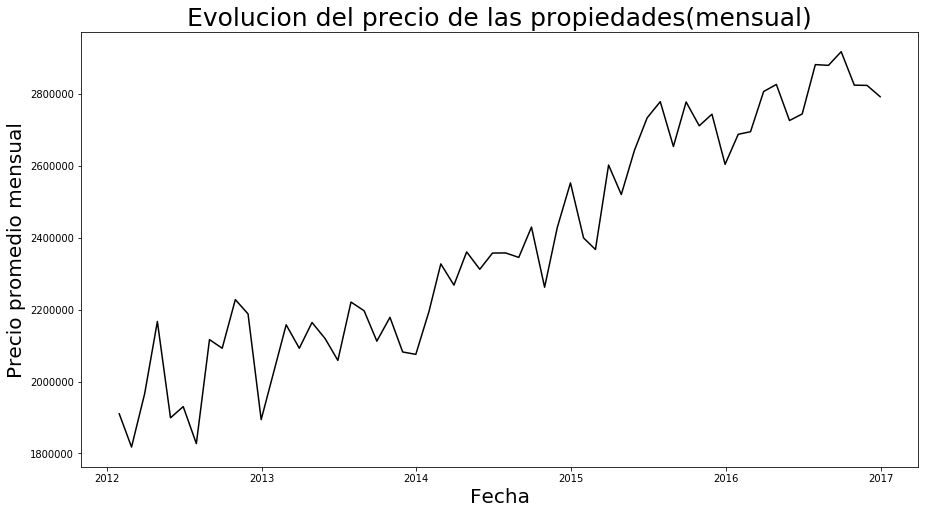

In [59]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del precio de las propiedades(mensual)", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio promedio mensual", fontsize=20);

In [60]:
df_inflacion = pd.read_csv("data/inflacion_mexico_2012-2016.csv", names=["Fecha", "Inflacion"])

##### Ojito con esto

In [61]:
#import locale
#locale.setlocale(locale.LC_TIME, 'es_AR.UTF-8')

In [62]:
#df_inflacion["Fecha"] = pd.to_datetime(df_inflacion["Fecha"], format="%b %Y")

In [63]:
df_inflacion.index = df_inflacion["Fecha"]

In [64]:
#df_inflacion = df_inflacion.resample('M').mean().reset_index()

In [65]:
df_pt = df_pt.reset_index(drop=True)

In [66]:
#df_ptaj = df_pt.merge(df_inflacion)

In [67]:
#df_ptaj.iloc[0,2] = 0 # Para tomar como base Enero de 2012

In [68]:
#df_ptaj["Inflacion"] = df_ptaj["Inflacion"].cumsum()

In [69]:
#df_ptaj["Multiplicador"] = 1 + df_ptaj["Inflacion"]/100

In [70]:
#df_ptaj["Precio_ajustado"] = df_ptaj["Precio"]/df_ptaj["Multiplicador"]

In [71]:
#plt.figure(figsize=(15,8))
#plt.plot("Fecha", "Precio_ajustado", data=df_ptaj, color="black")
#plt.title("Evolucion del precio de las propiedades(mensual) ajustado por inflacion", fontsize=25)
#plt.xlabel("Fecha", fontsize=20)
#plt.ylabel("Precio promedio mensual", fontsize=20);

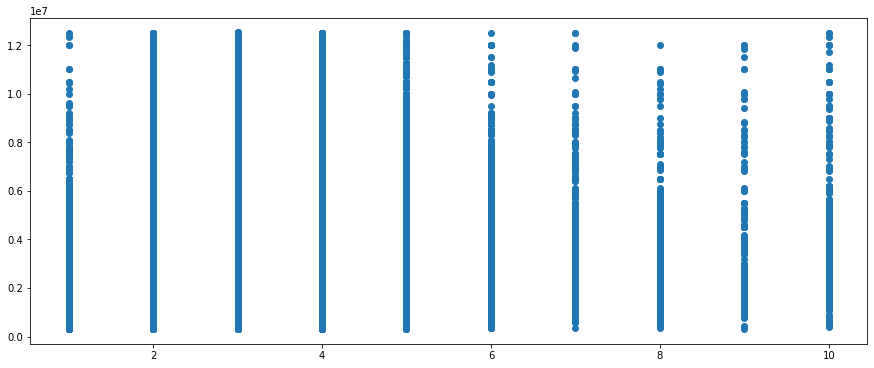

In [72]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (15, 6))

# Variables a graficar
x = dfok['CantHabitaciones']
y = dfok['Precio']

# Tipo de gráfico
plt.scatter(x, y)

''' No se aprecia una tendencia clara. ''';

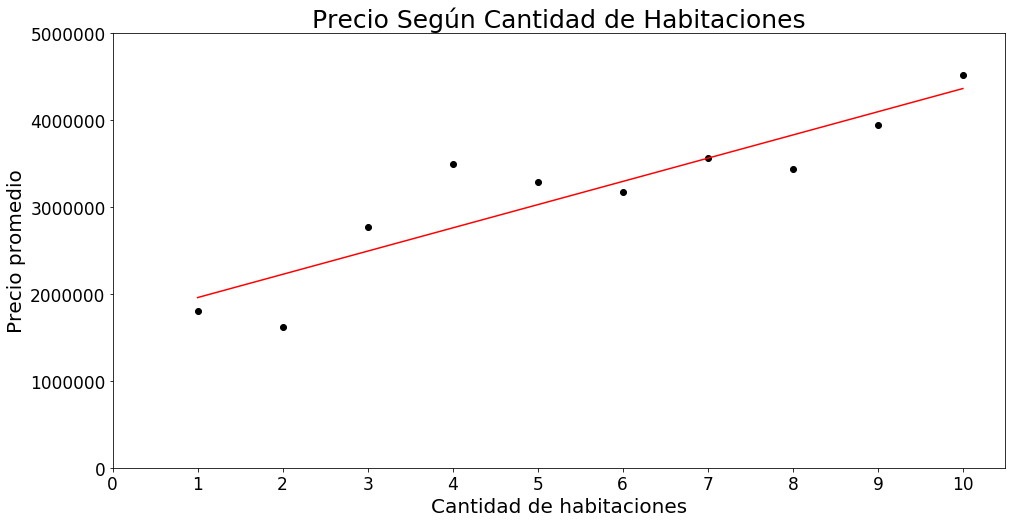

In [73]:
''' ¿El precio promedio es proporcional a la cantidad de habitaciones?
'''
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['Precio']

fig = plt.figure(figsize = (16,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

plt.xlabel("Cantidad de habitaciones", fontsize = 20)
plt.ylabel("Precio promedio", fontsize= 20)
plt.title("Precio Según Cantidad de Habitaciones", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

plt.xticks([i for i in range(11)])

# Tipo de gráfico
plt.scatter(x, y, color = 'black');
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "r");

## El precio parece tender a aumentar a medida que aumenta la cantidad de habitaciones

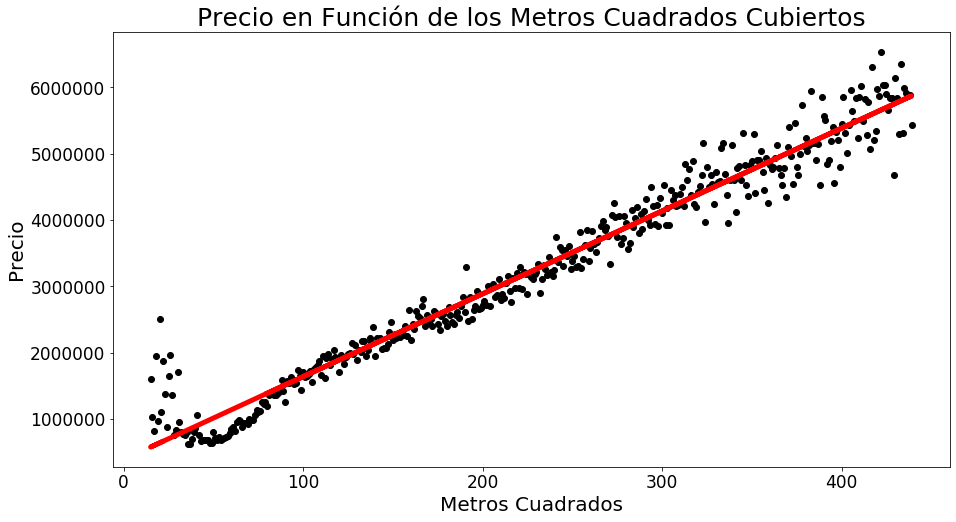

In [74]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosCubiertos'].unique(), 
                                index = dfok['MetrosCuadradosCubiertos'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosCubiertos').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 92%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "red", linewidth = 5);

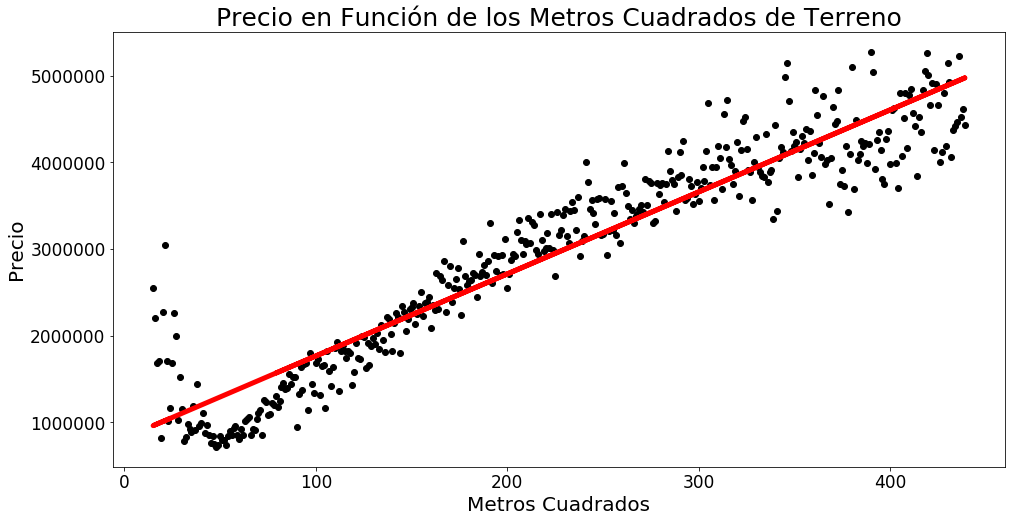

In [75]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosTotales'].unique(), 
                                index = dfok['MetrosCuadradosTotales'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosTotales').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 80%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (16, 8));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados de Terreno", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "red", linewidth = 5);

### México está en el hemisferio norte, por lo que la latitud debe ser positiva, ademas está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa

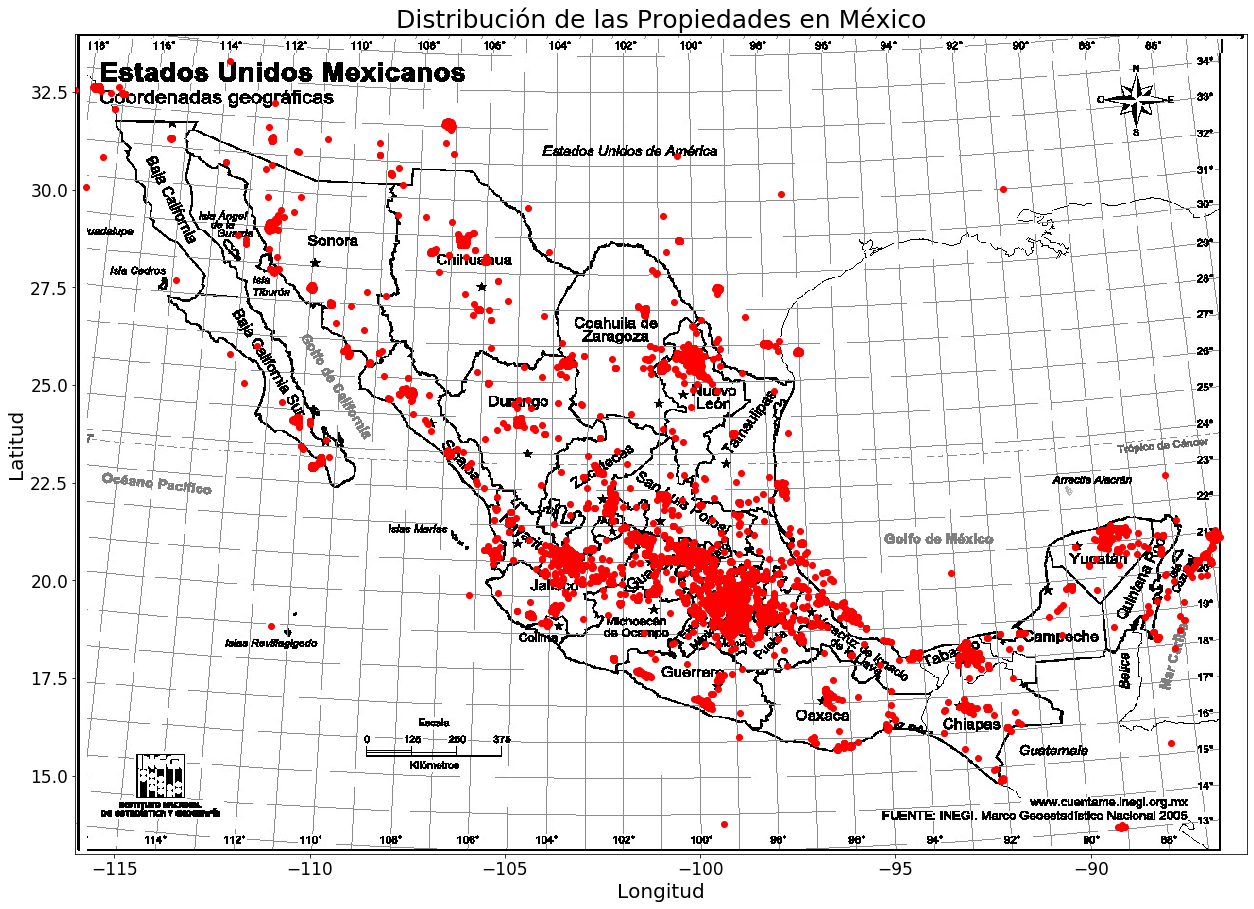

In [76]:
# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

# Tamaño del gráfico
grafico, ax = plt.subplots(figsize = (21, 16));


img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades en México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

# Tipo de gráficok
plt.scatter(x, y, color = "red");


In [77]:
''' Propiedades con coordenadas incorrectas
'''

len(dfok[ (dfok['Latitud'] > 34) | (dfok['Latitud'] < 13) | (dfok['Longitud'] > -86) | (dfok['Longitud'] < -116) ])


2206

<BarContainer object of 24 artists>

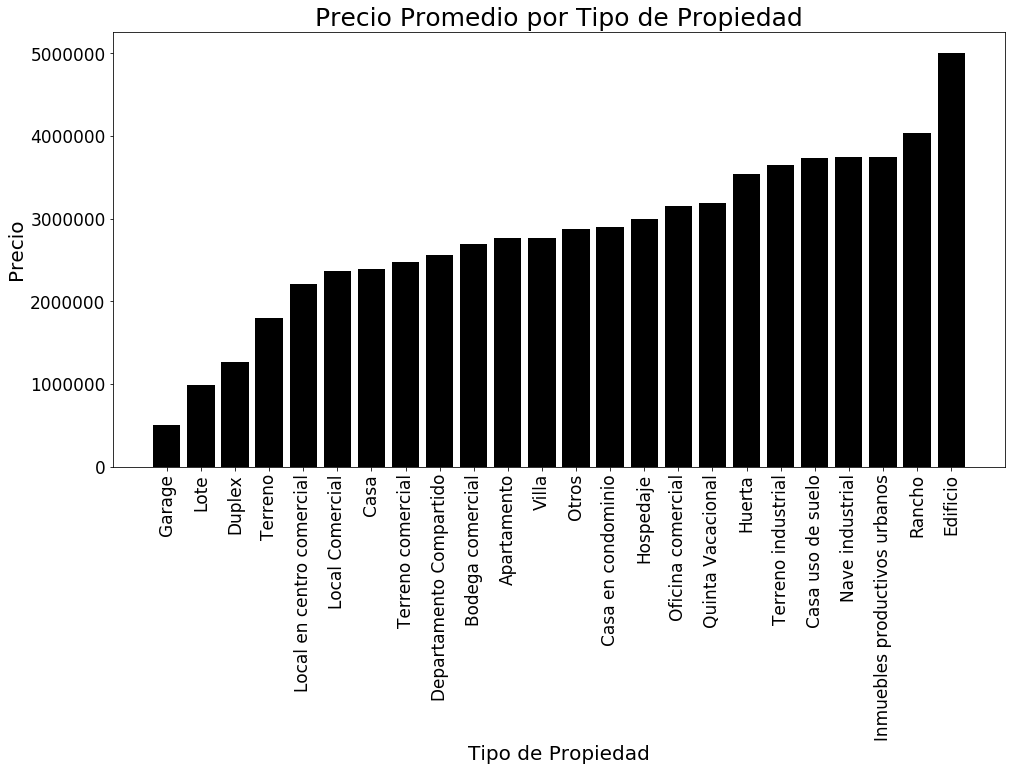

In [78]:
''' ¿Cuáles propiedades son más caras en promedio? '''

dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), index = dfok['TipoPropiedad'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('TipoPropiedad').mean()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['TipoPropiedad'] = dfPorPropiedad['TipoPropiedad'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio Promedio por Tipo de Propiedad", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


In [79]:
dfok.nsmallest(15, 'MetrosCuadradosTotales')

ID  \
1224    53862   
14570  247515   
14600  245700   
21275  173002   
25293  278888   
33462   23683   
35818  134857   
45259  182269   
52062  267962   
53974   94268   
54150   37757   
59462  138761   
68706   33295   
75367  139470   
82994   61181   

                                                                            Titulo  \
1224                                                    vendo loca plaza esmeralda   
14570                                             vendo consultorio excelente zona   
14600                                                            hermosa  en venta   
21275  locales frente plaza comerc. centro sur 10.5% descuento pago en efectivo      
25293                    comercio clave  en venta en montecristo, merida , yucatan   
33462                                  se vende bonita  casa en la purificacion      
35818                      casa clave  en venta en alcala martin, merida , yucatan   
45259                                        casa en venta en gómez palacio centro   
52062                                           locales en preventa en andador sur   
53974                                            nueva azacoalco casita-condominio   
54150                            playa clave  en venta en centro, merida , yucatan   
59462                excelente departamento en la del valle listo para escriturar    
68706                                              casa en venta en las margaritas   
75367                       terreno / lote en venta en rancho o rancheria el bordo   
82994                     terreno clave  en venta en tab. 33886, temozon , yucatan   

            TipoPropiedad   Precio      Fecha  Antiguedad  \
1224      Local Comercial   850000 2013-11-08         5.0   
14570   Oficina comercial   500000 2014-09-14         5.0   
14600                Casa   720000 2015-02-13        10.0   
21275     Local Comercial  1597500 2016-12-31         NaN   
25293     Local Comercial  2800000 2012-10-02         0.0   
33462                Casa  9700000 2014-12-23         5.0   
35818                Casa  3000000 2012-10-02         0.0   
45259                Casa  1500000 2012-08-17        45.0   
52062     Local Comercial  1500000 2016-10-22         NaN   
53974  Casa en condominio   630000 2012-11-23        30.0   
54150                Casa  1800000 2012-10-02         0.0   
59462         Apartamento  3950000 2015-04-24        10.0   
68706                Casa  1200000 2012-08-17        30.0   
75367             Terreno  2000000 2012-08-17         0.0   
82994             Terreno  1080438 2012-10-02         0.0   

       MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
1224                        NaN                    15.0   
14570                      15.0                    15.0   
14600                      63.0                    15.0   
21275                      15.0                    15.0   
25293                     250.0                    15.0   
33462                     250.0                    15.0   
35818                     370.0                    15.0   
45259                       NaN                    15.0   
52062                      15.0                    15.0   
53974                      55.0                    15.0   
54150                     120.0                    15.0   
59462                     153.0                    15.0   
68706                     165.0                    15.0   
75367                       NaN                    15.0   
82994                       NaN                    15.0   

                                                                                               Descripcion  \
1224   <p></p>\r\n<p class=sangra3detindependiente>caracter&iacute;sticas:</p>\r\n<p></p>\r\n<p class=s...   
14570  venta de consultorio \n\nexcelente ubicación!! dentro de heliplaza lomas verdes, con todos los s...   
14600  hermosa  en venta de dos plantas muy bonita en excelentes condiciones cuenta con dos recamaras, ...   

In [80]:
df_aux = dfok.copy()

In [81]:
def rango_del_precio(df):
    if df["Precio"] <= 1000000:
        return "0\$ - 1,000,000\$"
    elif 1000000 < df["Precio"] <= 2000000:
        return "1,000,000\$ - 2,000,000\$"
    elif 2000000 < df["Precio"] <= 3000000:
        return "2,000,000\$ - 3,000,000\$"
    elif 3000000 < df["Precio"] <= 4000000:
        return "3,000,000\$ - 4,000,000\$"
    elif 4000000 < df["Precio"] <= 6000000:
        return "4,000,000\$ - 6,000,000\$"
    elif 6000000 < df["Precio"] <= 8000000:
        return "6,000,000\$ - 8,000,000\$"
    elif 8000000 < df["Precio"] <= 10000000:
        return "8,000,000\$ - 10,000,000\$"
    elif 10000000 < df["Precio"]:
        return "10,000,000\$ - 14,000,000\$"

In [82]:
df_aux["RangoDePrecios"] = df_aux.apply(rango_del_precio, axis=1)

In [83]:
df_aux = df_aux[["RangoDePrecios", "TieneGimnasio", "TieneUsosMultiples", "TienePileta", "TieneEscuelasCerca", "TieneShoppingsCerca"]]

In [84]:
df_rango = df_aux.groupby("RangoDePrecios").mean().reset_index()

In [85]:
"""Reordeno una fila del DF a mano para que se vean en el orden correcto los rangos de precios"""
temp = df_rango.iloc[2].copy()
df_rango.drop(df_rango.index[2], inplace=True)
df_rango = df_rango.append(temp)

In [86]:
df_rango.index = df_rango["RangoDePrecios"]

In [87]:
df_rango = df_rango.drop("RangoDePrecios", axis=1)

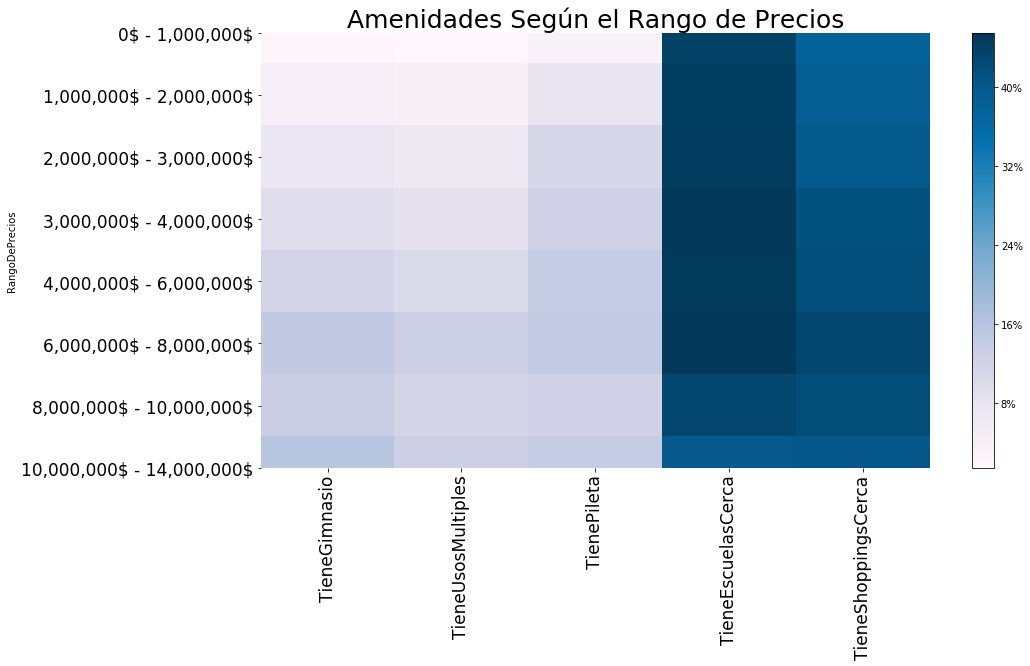

In [88]:
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Ajustar tamaño de los títulos de los ejes


# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


ax = sb.heatmap(df_rango*100,cmap="PuBu", cbar=False);
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([8, 16, 24, 32, 40])
cbar.set_ticklabels(["8%", "16%", "24%", "32%", "40%"])
plt.title("Amenidades Según el Rango de Precios", fontsize=25);



<BarContainer object of 22 artists>

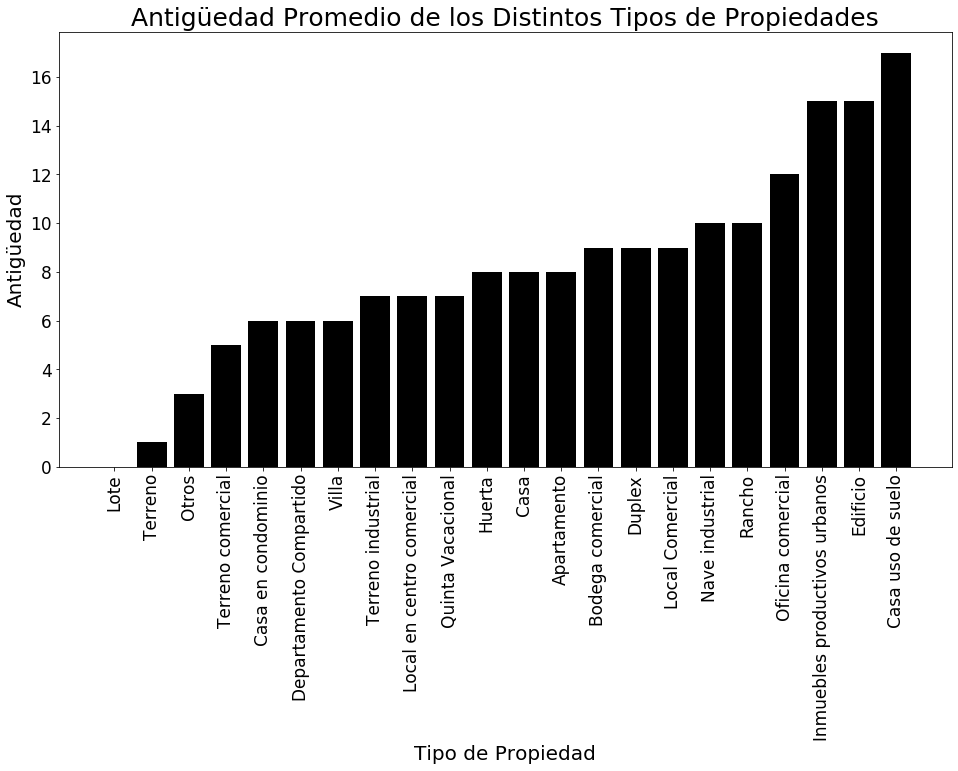

In [89]:
dfPorAntiguedad = pd.DataFrame()
dfPorAntiguedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), 
                                index = dfok['TipoPropiedad'].unique() )

dfPorAntiguedad['Antiguedad'] = dfok.groupby('TipoPropiedad')['Antiguedad'].mean()

dfPorAntiguedad = dfPorAntiguedad.dropna() #80%

dfPorAntiguedad['TipoPropiedad'] = dfPorAntiguedad['TipoPropiedad'].astype('category')
dfPorAntiguedad['Antiguedad'] = dfPorAntiguedad['Antiguedad'].astype(np.uint8)

dfPorAntiguedad = dfPorAntiguedad.sort_values(['Antiguedad'])

# Variables a graficar
y = dfPorAntiguedad['Antiguedad']
x = dfPorAntiguedad['TipoPropiedad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.ylabel("Antigüedad", fontsize = 20);
plt.xlabel("Tipo de Propiedad", fontsize = 20);

# Título
plt.title("Antigüedad Promedio de los Distintos Tipos de Propiedades", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
#ldt = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, ldt(x), "g")


In [90]:
len(dfok.groupby('Ciudad').head(1000).groupby('TipoPropiedad')['Precio'])

23

In [91]:
casas = dfok[ dfok['TipoPropiedad'] == 'Casa']

In [92]:
casas.describe()

ID        Precio     Antiguedad  MetrosCuadradosCubiertos  \
count  141717.000000  1.417170e+05  119026.000000             135185.000000   
mean   149850.929797  2.398158e+06       8.272588                194.026911   
std     86745.061327  1.999307e+06       9.648238                 98.515058   
min         1.000000  3.100000e+05       0.000000                 15.000000   
25%     74709.000000  9.272000e+05       0.000000                113.000000   
50%    149751.000000  1.800000e+06       5.000000                180.000000   
75%    225038.000000  3.200000e+06      10.000000                260.000000   
max    299998.000000  1.252100e+07      80.000000                439.000000   

       MetrosCuadradosTotales  CantHabitaciones    CantGarages      CantBanos  \
count           125061.000000     138379.000000  117756.000000  133108.000000   
mean               183.767889          3.092080       1.705926       2.240429   
std                 91.831447          0.881185       0.791163       0.933291   
min                 15.000000          1.000000       0.000000       1.000000   
25%                112.000000          3.000000       1.000000       2.000000   
50%                160.000000          3.000000       2.000000       2.000000   
75%                245.000000          3.000000       2.000000       3.000000   
max                439.000000         10.000000       3.000000       4.000000   

             IDZona       Latitud      Longitud  
count  1.231560e+05  65628.000000  65628.000000  
mean   1.191557e+06     21.257246    -99.937932  
std    7.364818e+06      3.568182     10.077705  
min    2.200000e+01   -100.886679   -125.859375  
25%    4.773200e+04     19.387642   -103.265256  
50%    5.974000e+04     20.552883    -99.665278  
75%    9.260600e+04     21.857708    -99.122212  
max    5.000400e+07     83.026219    121.036000

In [93]:
dptos = dfok[ dfok['TipoPropiedad'] == 'Apartamento']

In [94]:
dptos.describe()

ID        Precio    Antiguedad  MetrosCuadradosCubiertos  \
count   57341.000000  5.734100e+04  48290.000000              56518.000000   
mean   150391.759160  2.763769e+06      8.362021                117.048657   
std     86404.604388  2.342775e+06      9.524304                 67.299715   
min         9.000000  3.100000e+05      0.000000                 16.000000   
25%     75848.000000  1.050000e+06      1.000000                 69.000000   
50%    150700.000000  1.989328e+06      5.000000                 96.000000   
75%    225185.000000  3.731625e+06     10.000000                143.000000   
max    299995.000000  1.252000e+07     80.000000                438.000000   

       MetrosCuadradosTotales  CantHabitaciones   CantGarages     CantBanos  \
count            29348.000000      56347.000000  53605.000000  56004.000000   
mean               117.907762          2.386533      1.410242      1.816817   
std                 67.700617          0.630951      0.749516      0.768021   
min                 15.000000          1.000000      0.000000      1.000000   
25%                 70.000000          2.000000      1.000000      1.000000   
50%                 97.000000          2.000000      1.000000      2.000000   
75%                145.000000          3.000000      2.000000      2.000000   
max                438.000000         10.000000      3.000000      4.000000   

             IDZona       Latitud      Longitud  
count  5.277900e+04  30035.000000  30035.000000  
mean   5.598419e+06     19.679672    -98.780159  
std    1.567089e+07      1.883412      8.606936  
min    2.200000e+01    -34.612892   -117.120217  
25%    2.381500e+04     19.360492    -99.260620  
50%    4.749800e+04     19.399537    -99.180081  
75%    8.782650e+04     19.480908    -99.144354  
max    5.000400e+07     62.593341    100.402598

In [95]:
1999307 / pow(len(casas), 1/2) #De Moivre

5310.90473707445

In [96]:
2342775 / pow(len(dptos), 1/2) #De Moivre

9783.583359412307

In [97]:
len(casas)

141717

In [98]:
len(dptos)

57341

In [99]:
pd.set_option('display.max_rows', 40) #como mucho ver 50 filas
casasPorProvincia = casas.groupby('Provincia')['Precio'].mean().to_frame()
dptosPorProvincia = dptos.groupby('Provincia')['Precio'].mean().to_frame()

In [100]:
dfInTime = pd.DataFrame()
dfInTime['Fecha'] = dfok['Fecha']
dfInTime['Precio'] = dfok['Precio']
dfInTime.groupby('Fecha')

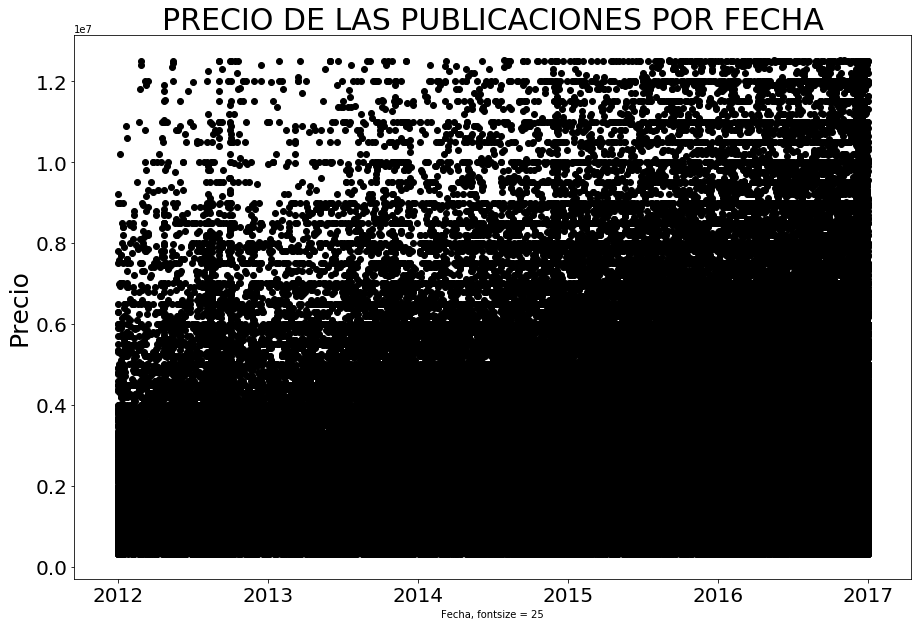

In [101]:
x = dfok['Fecha']
y = dfok['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10))

# Tamaño de los títulos de los ejes
plt.xlabel("Fecha, fontsize = 25")
plt.ylabel("Precio", fontsize = 25)

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("PRECIO DE LAS PUBLICACIONES POR FECHA")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.scatter(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")

Text(0.5, 1.05, 'Comparación de Características Promedio de Casas y Departamentos')

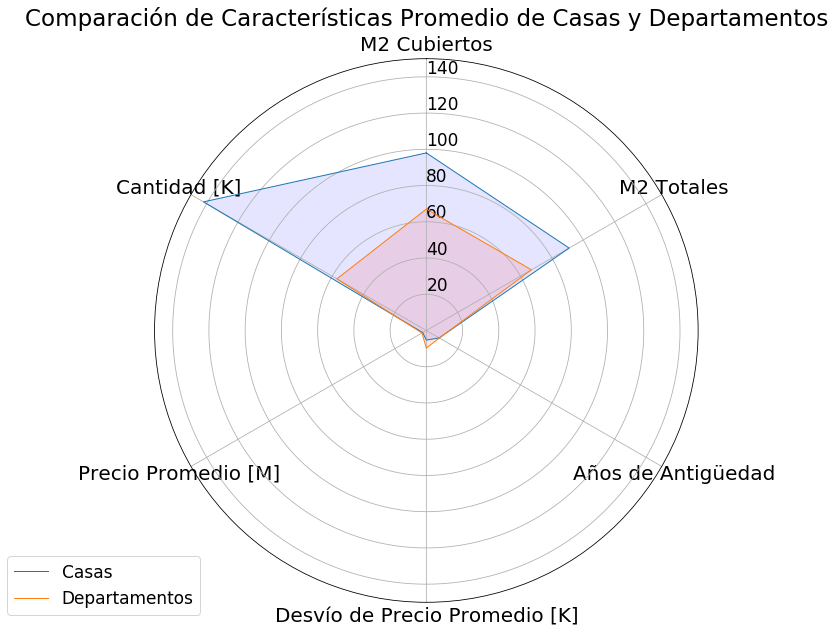

In [102]:
''' 
CÓDIGO DEL RADAR CHART SACADA DE
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
'''

dfradar = pd.DataFrame({
    'Propiedad': ['Casas','Departamentos'],
'M2 Cubiertos': [98, 67],
    'M2 Totales': [91, 67],
'Años de Antigüedad': [8.2, 8.3],
    'Desvío de Precio Promedio [K]': [5.3, 9.7],
'Precio Promedio [M]': [2.3, 2.8],
'Cantidad [K]': [142, 57]
})
    
categories=list(dfradar)[1:]
N = len(categories)

# Ajustar ángulos
angulos = [n / float(N) * 2 * 3.1415 for n in range(N)]
angulos += angulos[:1]
 
# Crear radar
grafico = plt.figure(figsize = (15, 10));
ax = plt.subplot(111, polar = True)
# Variables en orden
ax.set_theta_offset(3.1415 / 2)
ax.set_theta_direction(-1)
 
# Poner nombres de las variables
plt.xticks(angulos[:-1], categories, color='black', size=20)
 
# Límites para las variables
ax.set_rlabel_position(0)
plt.yticks(color="black", size=17)
plt.ylim(0,150)
  
# Casas
values = dfradar.loc[0].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Casas")
ax.fill(angulos, values, 'b', alpha=0.1)
 
# Dptos
values = dfradar.loc[1].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Departamentos")
ax.fill(angulos, values, 'r', alpha=0.1)

#Cartelito
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 17})

plt.title("Comparación de Características Promedio de Casas y Departamentos", fontsize = 23)


0.0


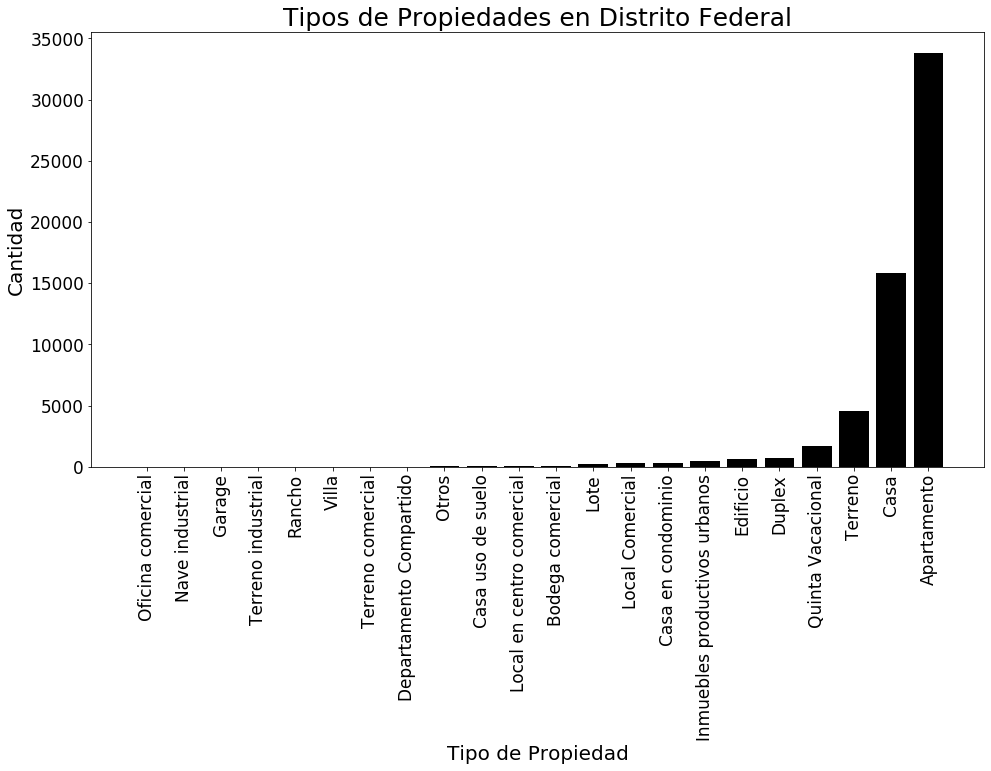

In [103]:
def propiedadesEnProvincia(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 
    #Porcentaje de NaN
    print( dfok[ dfok['Provincia'] == provincia].isnull().sum()['TipoPropiedad'] / 
          len(dfok[ dfok['Provincia'] == provincia]['TipoPropiedad']) 
         )


    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])


    x = dfgp['TipoPropiedad'] 
    y = dfgp['Cantidad'] 

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel("Cantidad", fontsize = 20);

    # Título
    plt.title("Tipos de Propiedades en " + provincia, fontsize = 25)
    #Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
    # mp.rcParams.update( { 'axes.titlesize':'30' } )

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada
    #plt.ylim([13, 34]);
    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.bar(x, y, color = 'black')

    #Línea de regresión
        #ldt = np.poly1d( np.polyfit(x, y, 1) )
        #plt.plot(x, ldt(x), "g")

    # Cajita indicadora de colores 
    #plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

    # Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)


    ### PARA REVISAR ####
    #dfok[ dfok['Provincia'] == 'Distrito Federal' ].groupby('TipoPropiedad').count()['ID'].sort_values(ascending = False)
    
propiedadesEnProvincia('Distrito Federal')

0.0


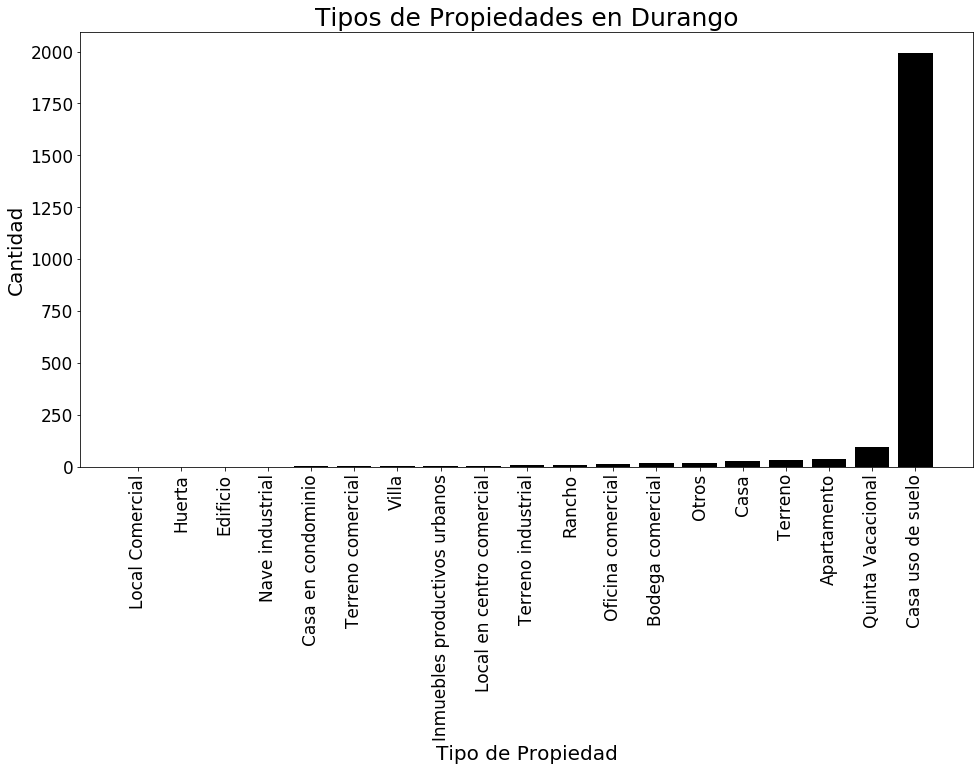

In [104]:
propiedadesEnProvincia('Durango')

In [105]:
dfok['Provincia'].unique()

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

In [106]:
def getTiposEn(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 

    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])
    
    return dfgp

In [107]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)['Cantidad']
    print( df0.max() / df0.sum() )

0.764403879064461
0.8599378881987577
0.8664705882352941
0.7984790874524715
0.8019538188277087
0.8477124183006536
0.9009472259810555
0.7708333333333334
0.5755910869195442
0.8769230769230769
0.6234496683011249
0.8104895104895105
0.5922330097087378
0.8464894882982943
0.6684245220830587
0.8016997167138811
0.6305029303530053
0.7233727810650887
0.7489558861915949
0.7440225035161744
0.6311294501487381
0.6708264657405227
0.49264087468460893
0.6672214956604446
0.8023255813953488
0.9143239625167336
0.7263581488933601
0.7911419887103778
0.8533969010727056
0.7717013888888888
0.8166561514195584
0.851063829787234


In [108]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)
    s = df0[ df0['Cantidad'] == df0['Cantidad'].max() ]['TipoPropiedad']
    print(s.to_string()[0: 25] )

2    Terreno
Categories (
2    Casa en condominio
C
2    Casa
Categories (15,
2    Apartamento
Categori
2    Casa en condominio
C
2    Terreno
Categories (
2    Terreno
Categories (
2    Local Comercial
Cate
0    Apartamento
Categori
2    Casa uso de suelo
Ca
2    Apartamento
Categori
2    Apartamento
Categori
0    Apartamento
Categori
2    Casa en condominio
C
2    Casa en condominio
C
2    Apartamento
Categori
2    Apartamento
Categori
2    Apartamento
Categori
2    Casa
Categories (21,
2    Casa en condominio
C
2    Apartamento
Categori
2    Casa en condominio
C
2    Apartamento
Categori
2    Apartamento
Categori
2    Terreno
Categories (
2    Terreno
Categories (
2    Apartamento
Categori
2    Local Comercial
Cate
2    Casa en condominio
C
2    Terreno
Categories (
2    Casa en condominio
C
1    Terreno comercial
Ca


In [109]:
dfok[dfok['Provincia'].isnull() ].count()['ID']

155

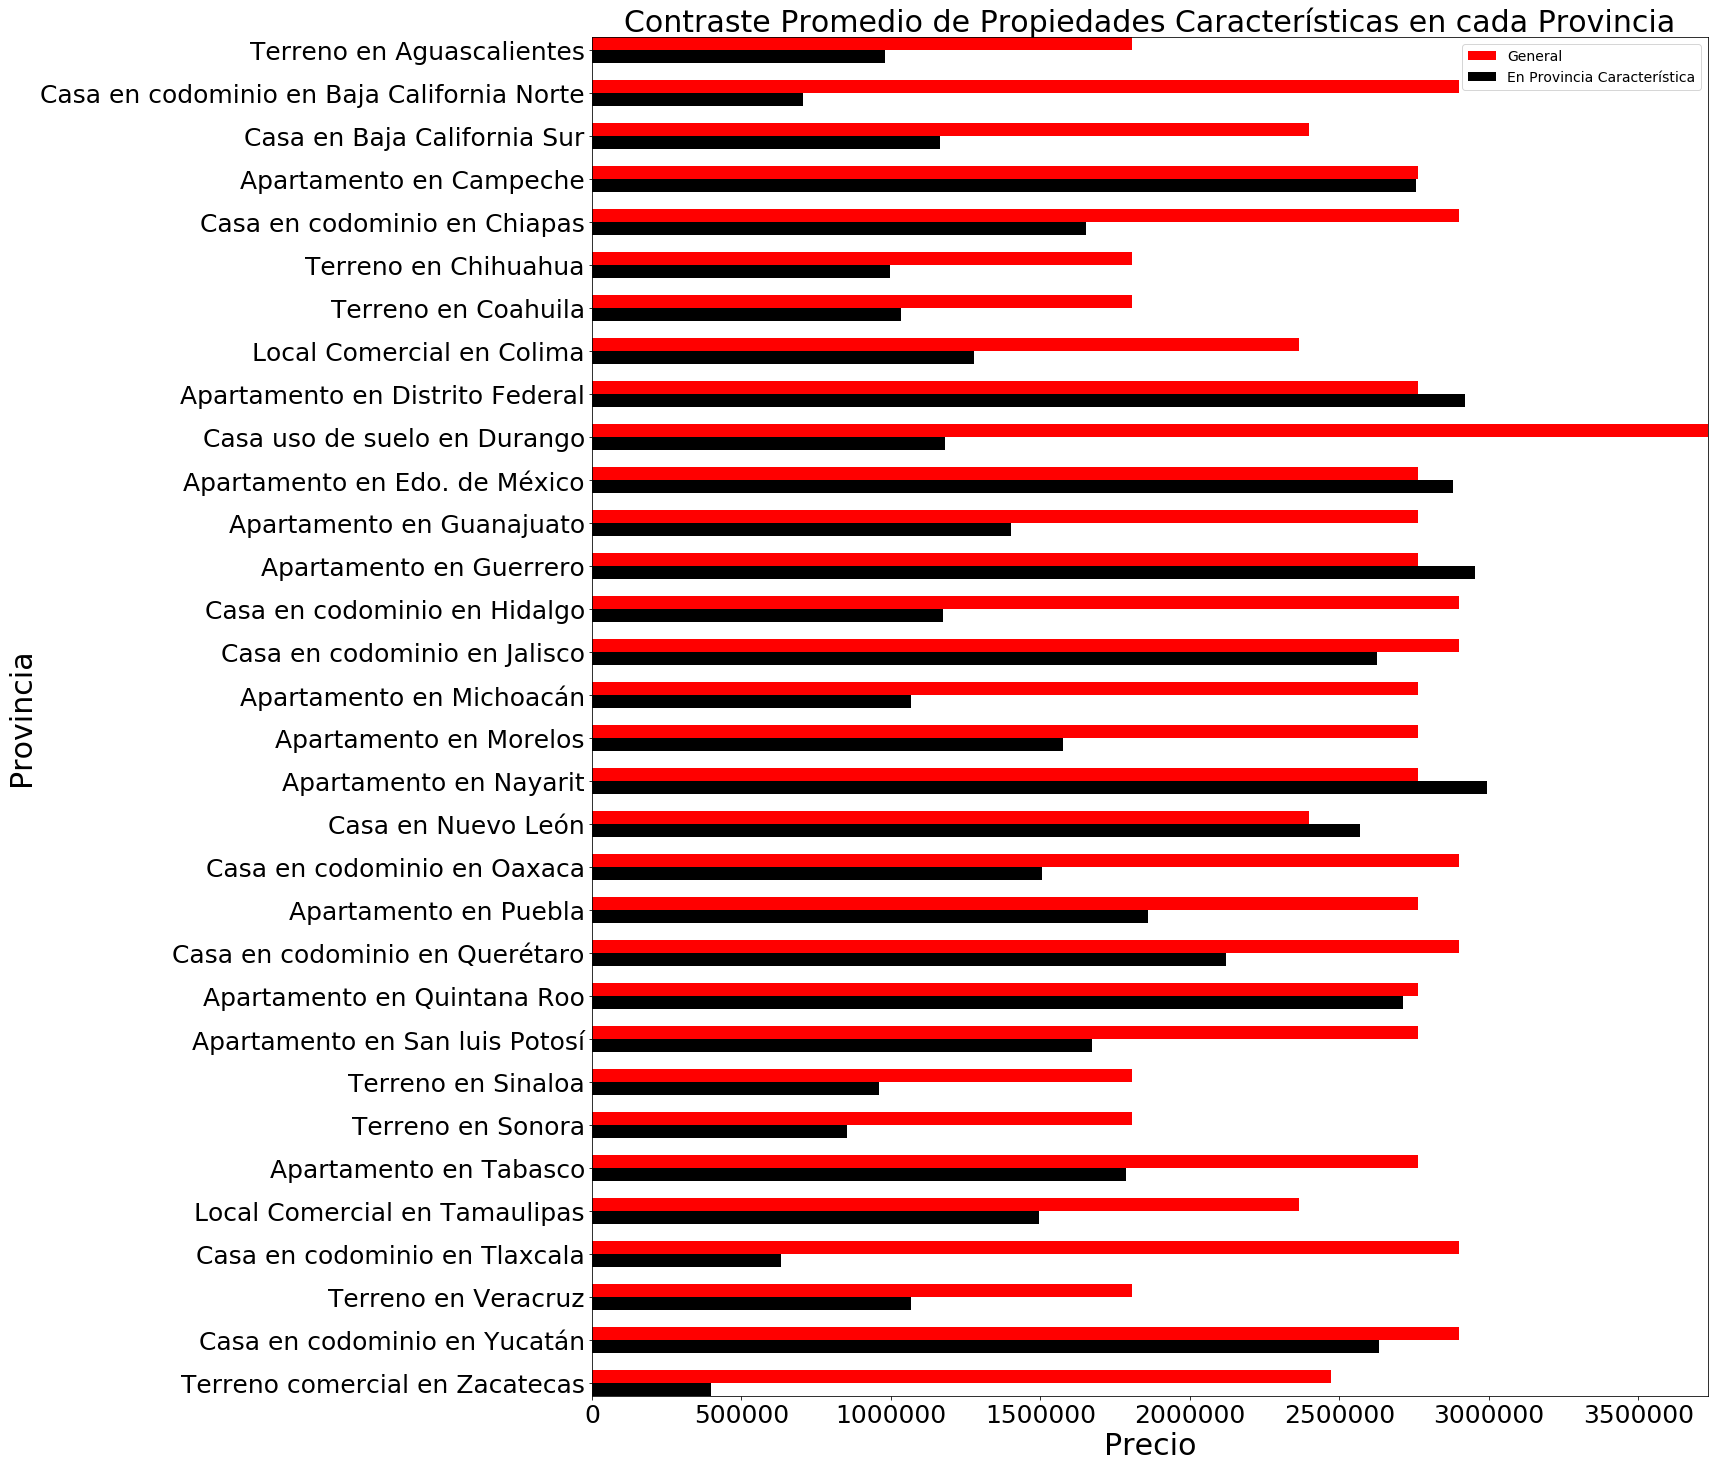

In [110]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

tipo = ['Terreno','Casa en condominio','Casa','Apartamento','Casa en condominio','Terreno','Terreno',
         'Local Comercial','Apartamento','Casa uso de suelo','Apartamento','Apartamento',
         'Apartamento','Casa en condominio','Casa en condominio','Apartamento','Apartamento',
         'Apartamento','Casa','Casa en condominio','Apartamento','Casa en condominio',
         'Apartamento','Apartamento','Terreno','Terreno','Apartamento',
         'Local Comercial','Casa en condominio','Terreno','Casa en condominio','Terreno comercial']

#Promedio de precio en la propiedad especialidad de la
promProv = []

#Promedio de precio por tipo de propiedad
prom = []

for i in range(32):
    promProv.append( dfok[ ( dfok['Provincia'] == prov[i] ) &  ( dfok['TipoPropiedad'] == tipo[i] ) ]['Precio'].mean() )
    prom.append(  dfok[ dfok['TipoPropiedad'] == tipo[i] ]['Precio'].mean() )
    
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), prom, ancho, color = 'red', label = 'General')
plt.barh(x + (ancho/2), promProv, ancho, color = 'black', label = 'En Provincia Característica')


prov2 = ['Terreno en Aguascalientes','Casa en codominio en Baja California Norte',
    'Casa en Baja California Sur','Apartamento en Campeche',
	'Casa en codominio en Chiapas','Terreno en Chihuahua','Terreno en Coahuila',
        'Local Comercial en Colima','Apartamento en Distrito Federal',
		'Casa uso de suelo en Durango',
		'Apartamento en Edo. de México','Apartamento en Guanajuato',
        'Apartamento en Guerrero','Casa en codominio en Hidalgo',
		 'Casa en codominio en Jalisco','Apartamento en Michoacán','Apartamento en Morelos'
		 ,'Apartamento en Nayarit','Casa en Nuevo León',
        'Casa en codominio en Oaxaca',
		'Apartamento en Puebla','Casa en codominio en Querétaro',
		'Apartamento en Quintana Roo','Apartamento en San luis Potosí','Terreno en Sinaloa',
        'Terreno en Sonora','Apartamento en Tabasco',
		'Local Comercial en Tamaulipas',
		'Casa en codominio en Tlaxcala','Terreno en Veracruz','Casa en codominio en Yucatán',
		'Terreno comercial en Zacatecas' ]

# Título
plt.title("Contraste Promedio de Propiedades Características en cada Provincia", fontsize = 30)

plt.yticks( np.arange(len(prov2)), np.arange(len(prov2)) + 1)
ax.set_yticklabels(prov2, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 30);
p2 = plt.ylabel("Provincia", fontsize = 30);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 25)
plt.tick_params(axis='both', which='minor', labelsize = 25)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

In [111]:
np.arange(len(prov))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [112]:
len(dfok.groupby('TipoPropiedad')['Precio'].mean().unique()) == (len(dfok['TipoPropiedad'].unique()) - 1)

True

In [113]:
len(dfok.groupby('TipoPropiedad')['Precio'].mean().unique())

24

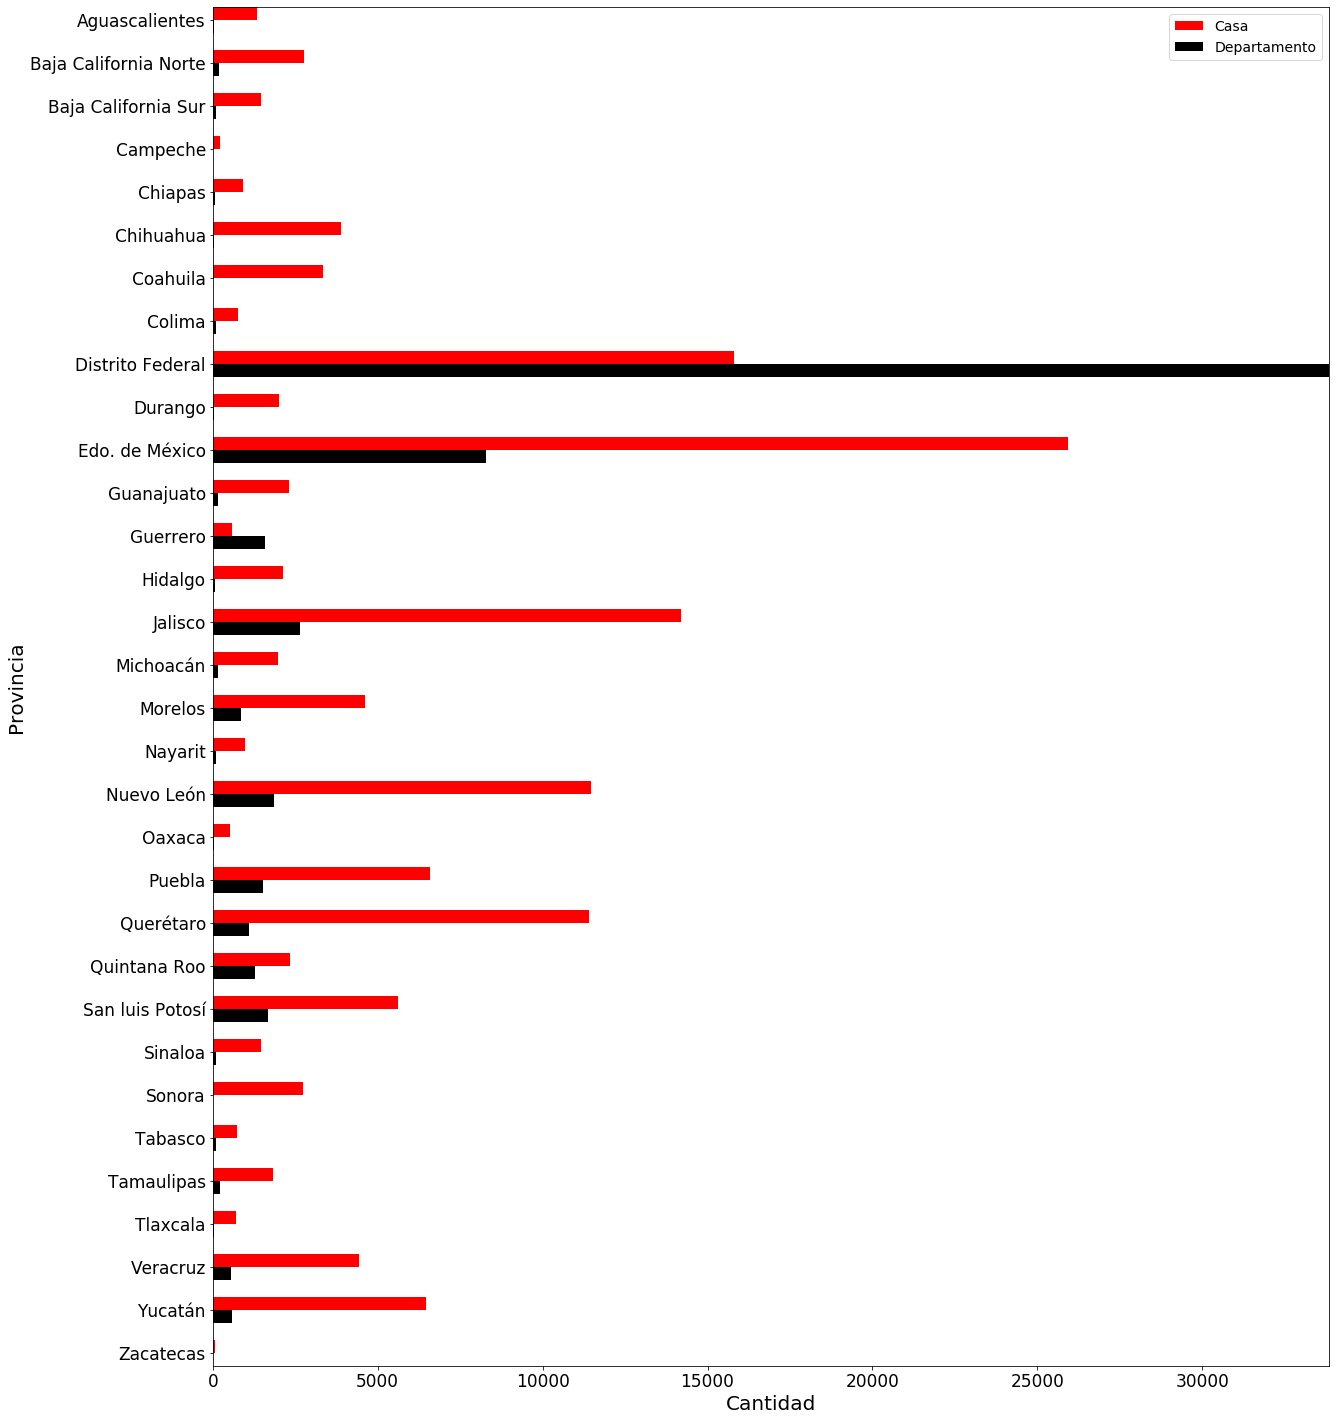

In [114]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].count() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].count() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Cantidad", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

<BarContainer object of 27 artists>

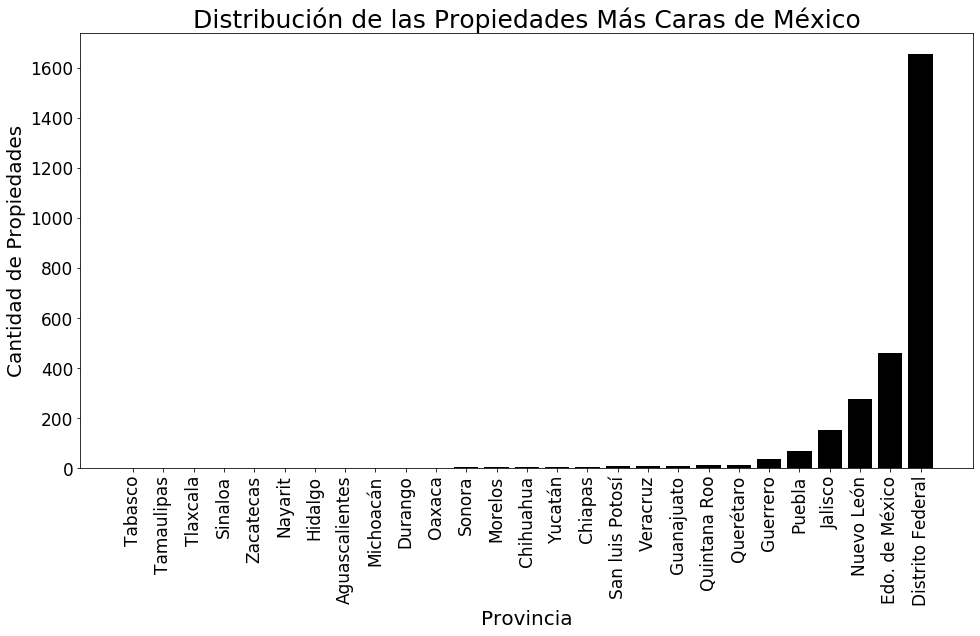

In [115]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] > 10000000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] > 10000000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] > 10000000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] > 10000000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Caras de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 32 artists>

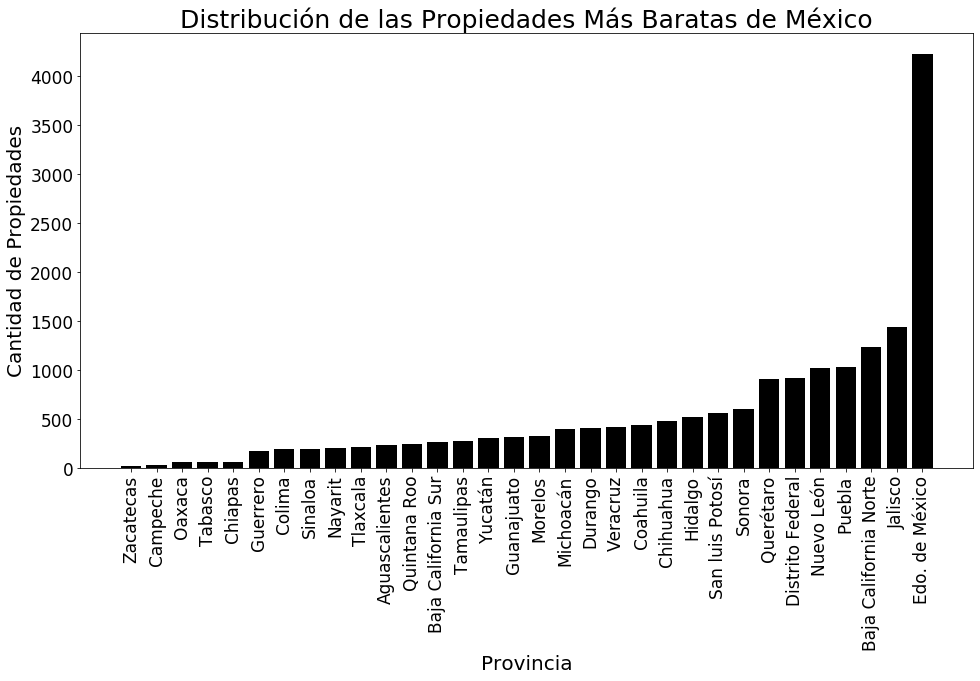

In [116]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] < 500000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] < 500000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] < 500000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] < 500000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Baratas de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 7 artists>

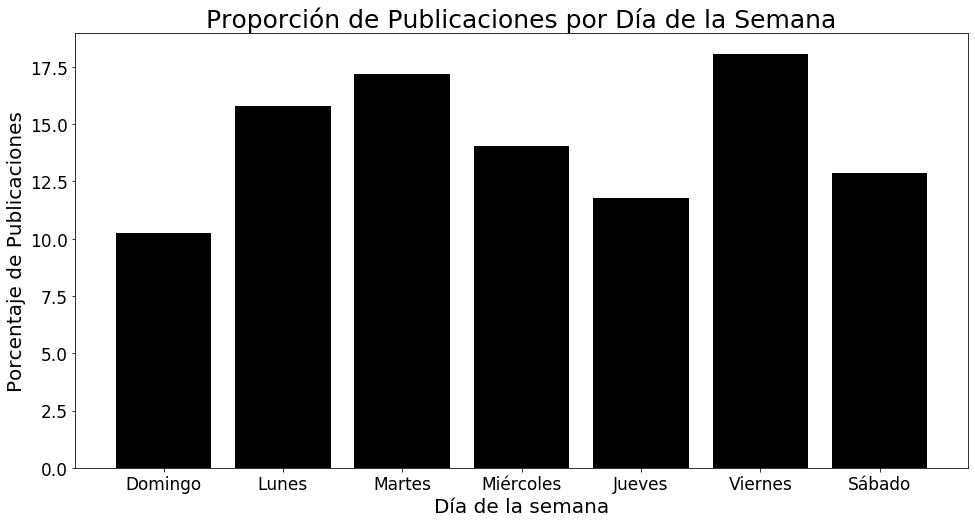

In [117]:
cantPub = [ 
             dfok[ dfok['Fecha'].dt.dayofweek == 6 ]['ID'].count() / 240000 * 100,
            dfok[ dfok['Fecha'].dt.dayofweek == 0 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 1 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 2 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 5 ]['ID'].count()  / 240000 * 100
          ]

dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

dfdias = pd.DataFrame()
dfdias['Días'] = dias
dfdias['Pubs'] = cantPub

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día de la semana", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día de la Semana", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

<BarContainer object of 12 artists>

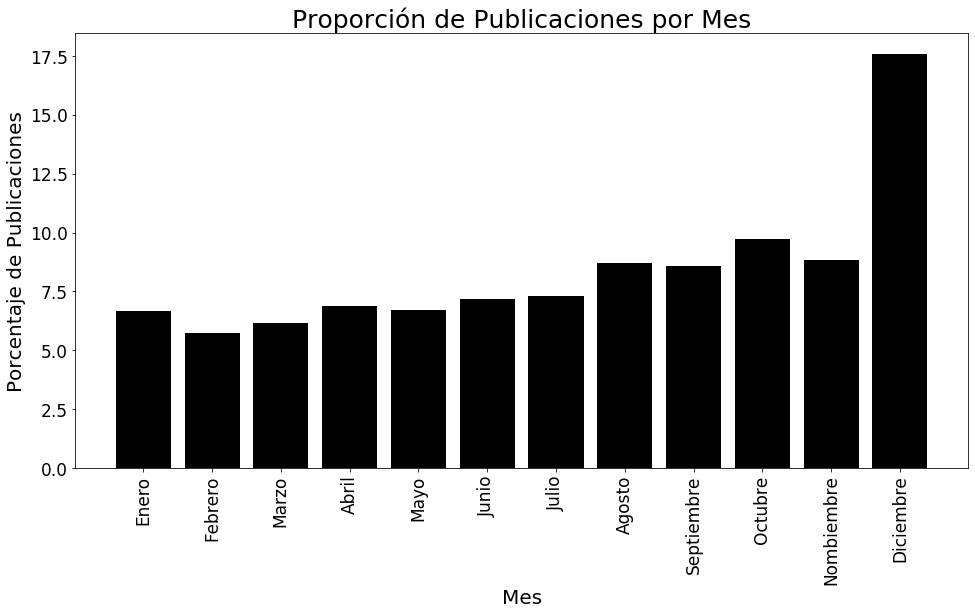

In [118]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.month == 1 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 2 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 5 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 6 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 7 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 8 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 9 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 10 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 11 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 12 ]['ID'].count()  / 240000 * 100
          ]

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Nombiembre', 'Diciembre']

# Variables a graficar
x = meses
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

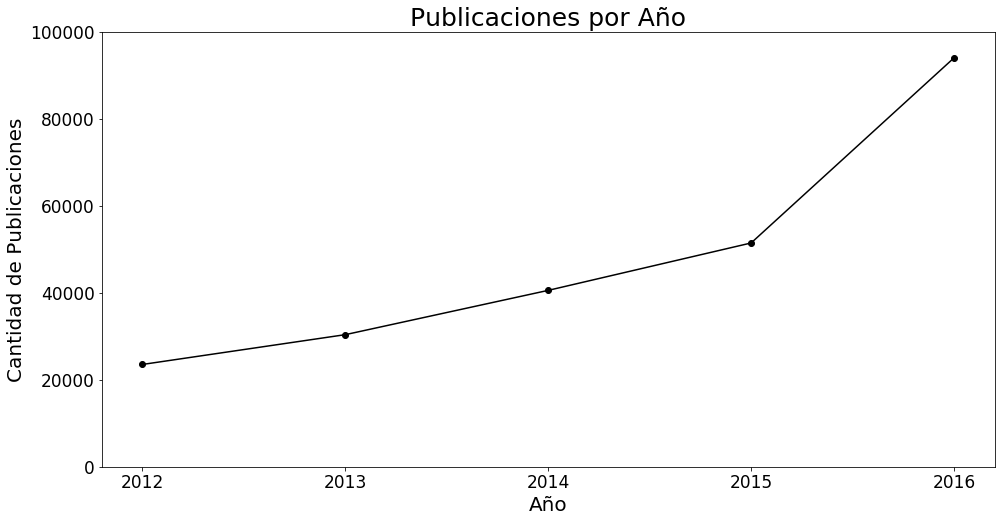

In [119]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.year == 2012 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2013 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2014 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2015 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2016 ]['ID'].count(),
          ]

años = ['2012', '2013', '2014', '2015', '2016']

# Variables a graficar
x = años
y = cantPub

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Cantidad de Publicaciones", fontsize = 20);
plt.xlabel("Año", fontsize = 20);

# Título
plt.title("Publicaciones por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 100000]);
#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, y, color = 'black', linestyle = '-', marker = 'o')

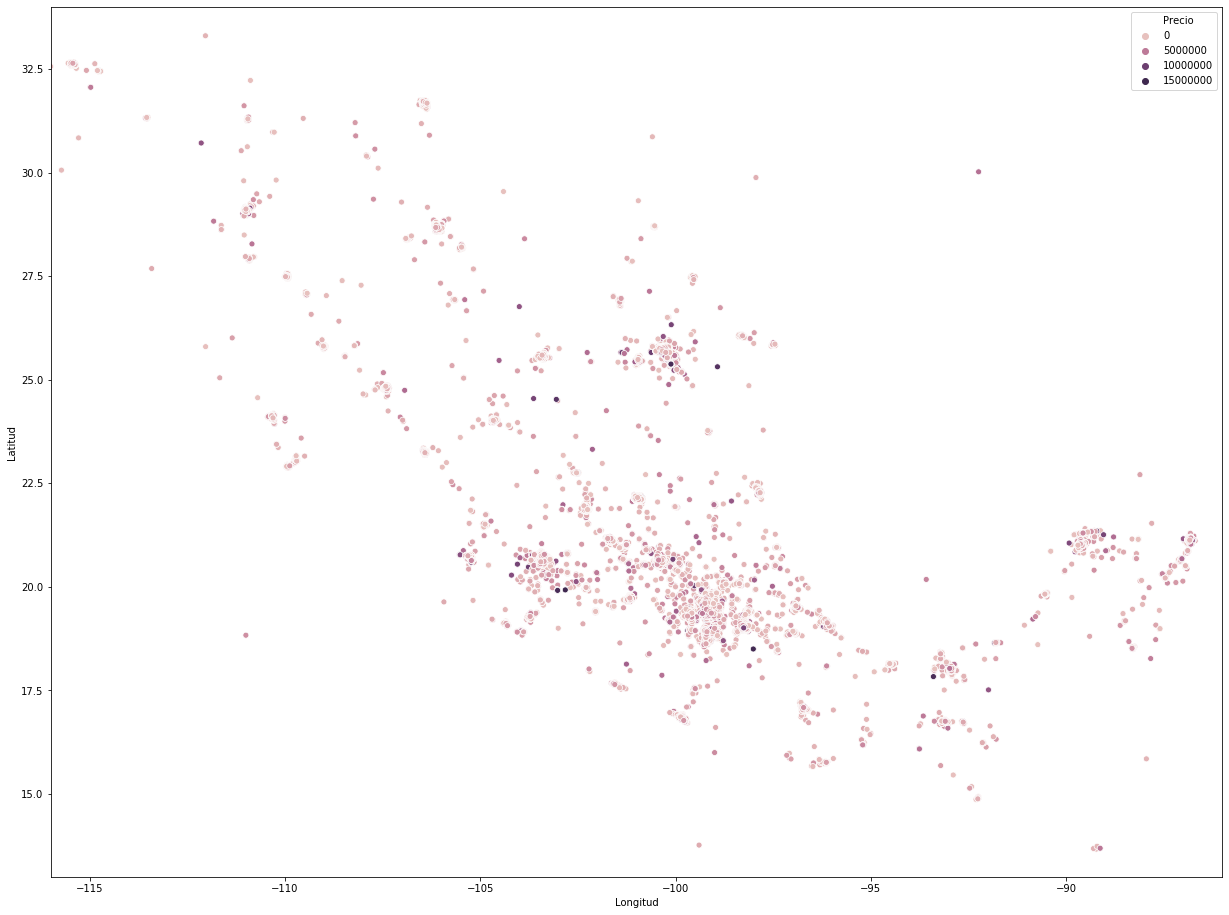

In [120]:
a = dfok['Longitud']
b = dfok['Latitud']
c = dfok['Precio']

dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] = a
dfnuevo['Latitud'] = b
dfnuevo['Precio'] = c

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

cmap = sb.cubehelix_palette(dark = .2, light = .8, as_cmap = True)
#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo)




No handles with labels found to put in legend.


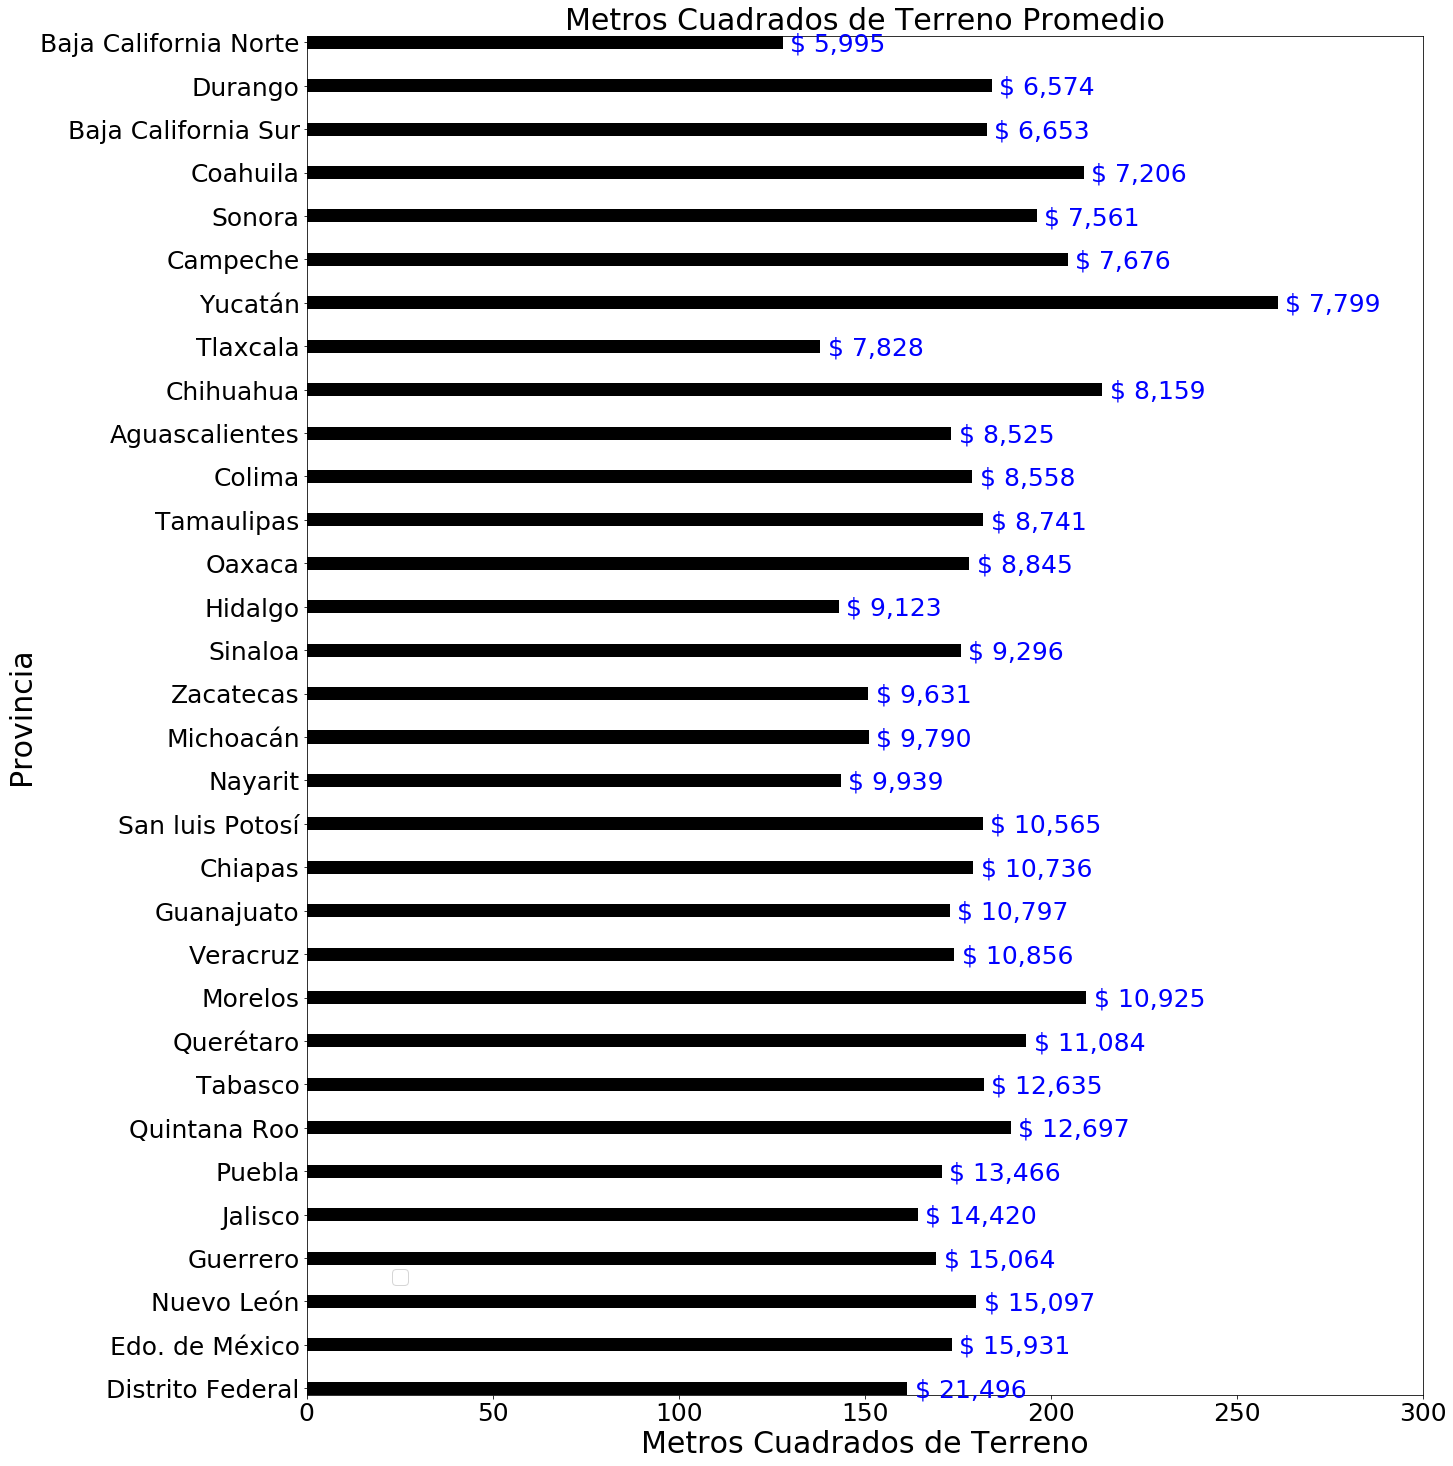

In [121]:
def analizarporm2(tipom, titulo, xaxis):
    dfms = pd.DataFrame()
    dfms['Provincia'] = dfok['Provincia'].dropna().sort_values().unique()
    dfms['MetrosTerreno'] = dfok.groupby('Provincia').mean()[tipom].to_list()
    dfms['PPPM2'] = ( dfok.sort_values('Provincia').groupby('Provincia')['Precio'].mean() /     \
           dfok.sort_values('Provincia').groupby('Provincia')[tipom].mean()
           ).to_list()

    dfms = dfms.sort_values('PPPM2')

    x = np.arange(len(dfms['Provincia']))

    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    plt.barh(x, dfms['MetrosTerreno'], ancho, color = 'black')

    ##########################

    plt.title(titulo, fontsize = 30)

    y = np.arange(len(dfms['Provincia']))

    plt.yticks(y , y + 1)
    ax.set_yticklabels(dfms['Provincia'], fontsize=17)

    plt.xlabel(xaxis, fontsize = 30);
    plt.ylabel("Provincia", fontsize = 30);
    plt.autoscale(tight = True)

    plt.tick_params(axis='both', which='major', labelsize = 25)
    plt.tick_params(axis='both', which='minor', labelsize = 25)
    
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})
    ax.invert_yaxis()

    plt.xlim([0, 300]);

    l = dfms['MetrosTerreno'].to_list()

    ppm2 = dfms['PPPM2'].to_list()

    # Agregar texto en una posición específica
    for i in range( len(dfms['Provincia']) ):
        plt.text(x = l[i] + 2, y = i + 0.2, s = '$ {:,.0f}'.format(ppm2[i]), size = 25, color = 'blue')


analizarporm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno Promedio", "Metros Cuadrados de Terreno")

No handles with labels found to put in legend.


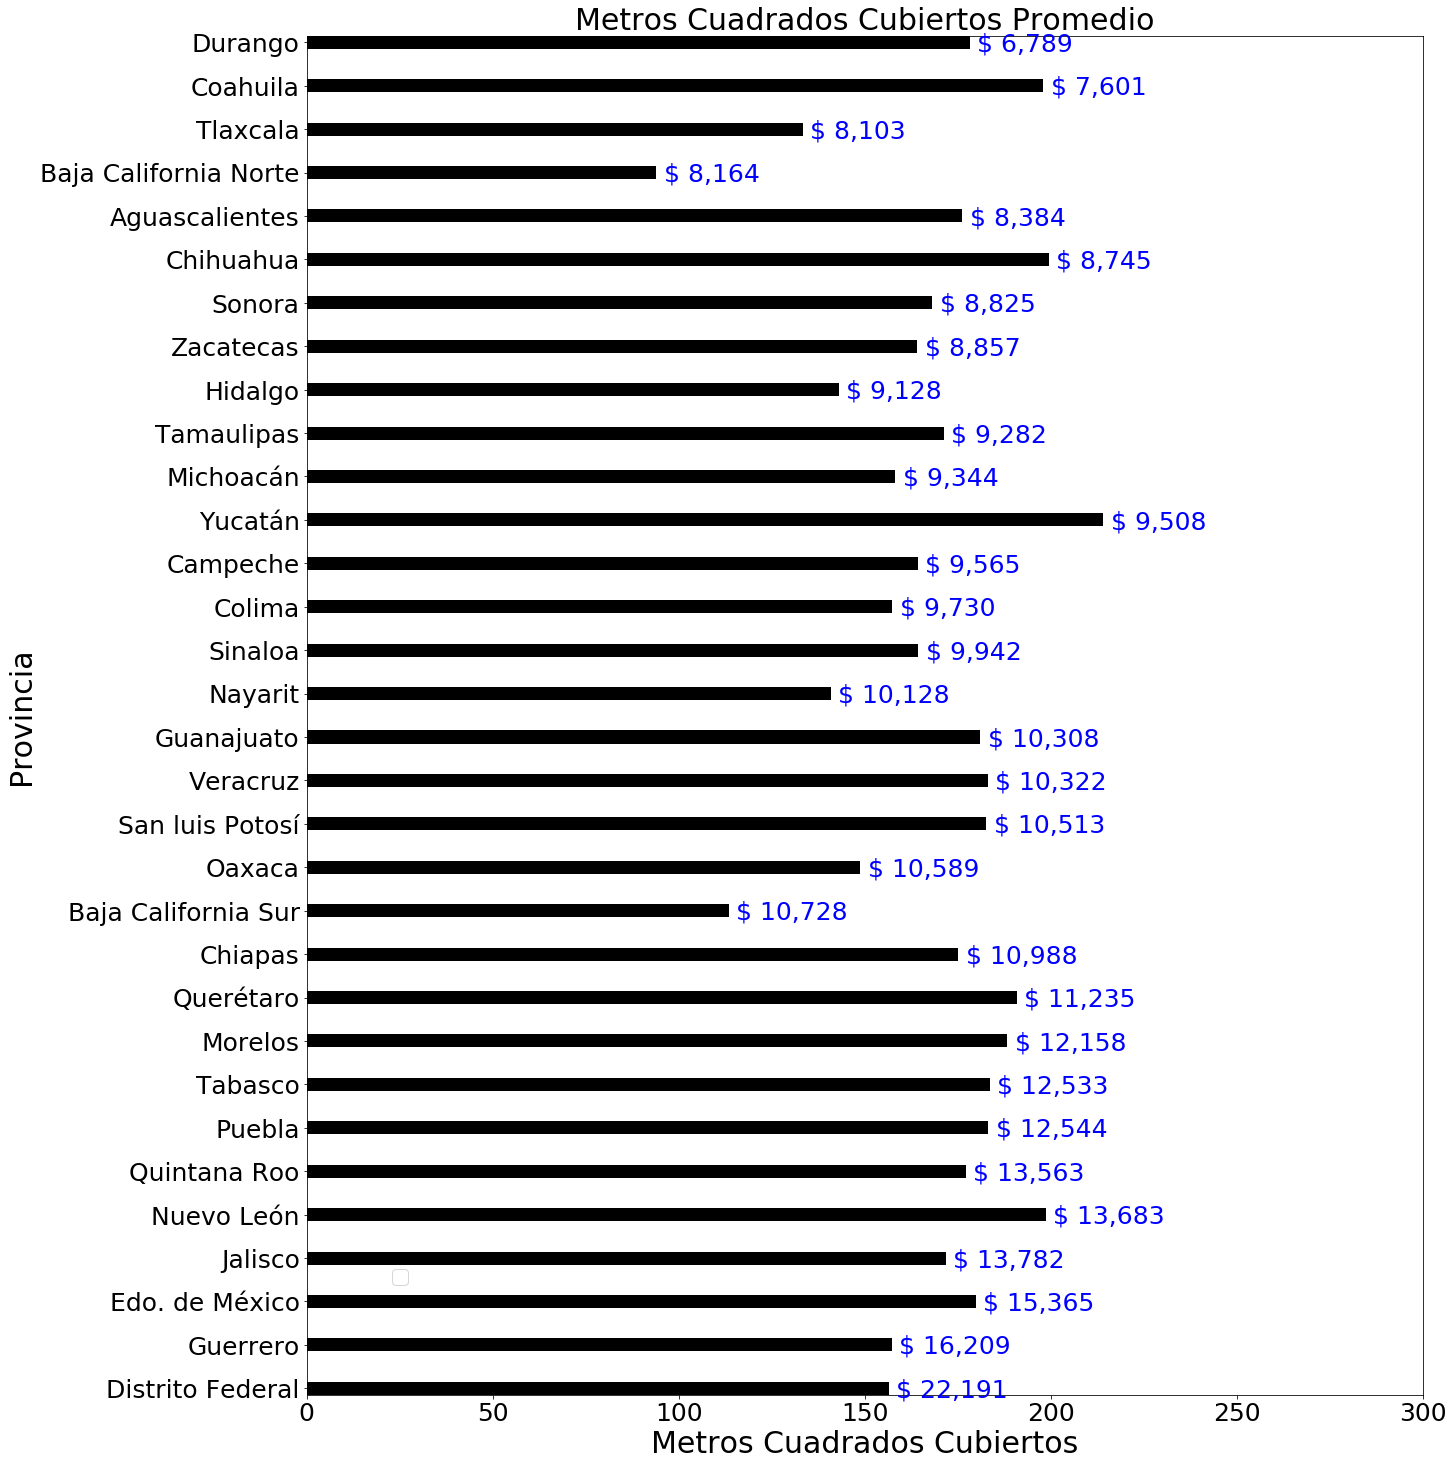

In [122]:
analizarporm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos Promedio", "Metros Cuadrados Cubiertos")

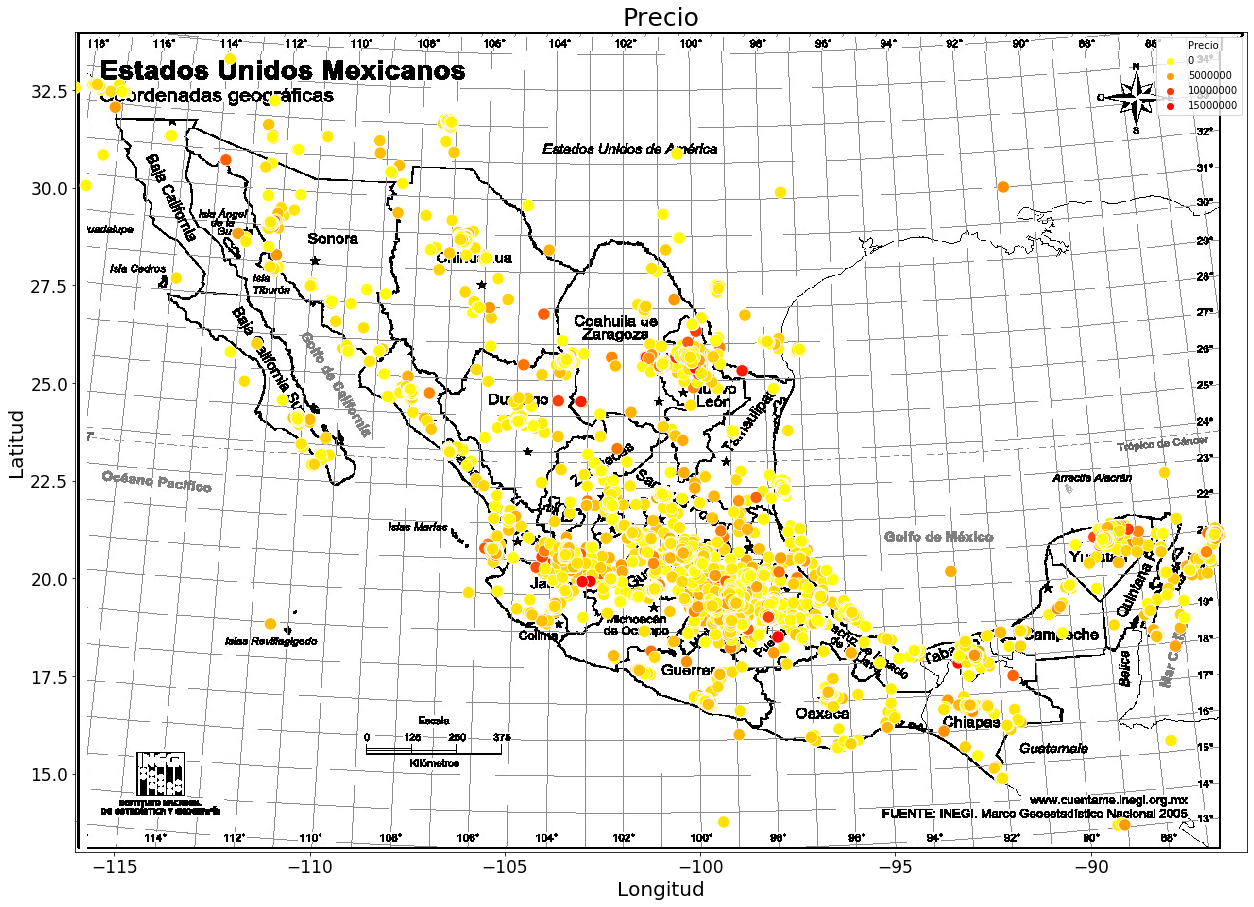

In [123]:
dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] =  dfok['Longitud']
dfnuevo['Latitud'] = dfok['Latitud']
dfnuevo['Precio'] = dfok['Precio']

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Precio", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

#cmap = sb.cubehelix_palette(dark = .3, light = .7, as_cmap = True)
#cmap = sb.color_palette(as_cmap = True)
#cmap = sb.color_palette("Paired", n_colors = dfnuevo['Precio'].nunique()) ##ESTE

#Cajita
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
cmap = plt.get_cmap("autumn_r")
ax = sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo, s = 150)



#### Veamos como es la densidad de metros cuadrados cubiertos y totales para las propiedades dadas:

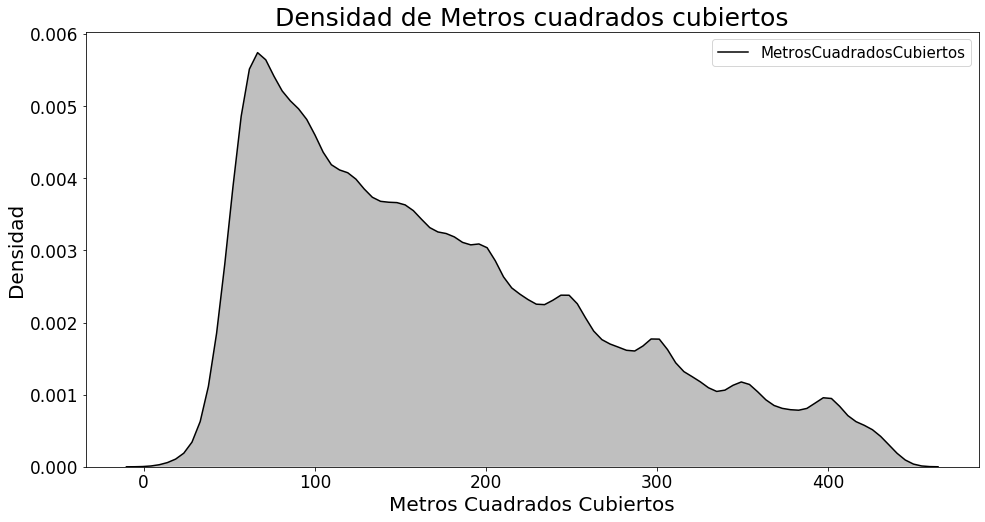

In [124]:
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosCubiertos"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosCubiertos'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Metros Cuadrados Cubiertos", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados cubiertos", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
ax.legend(fontsize=15);

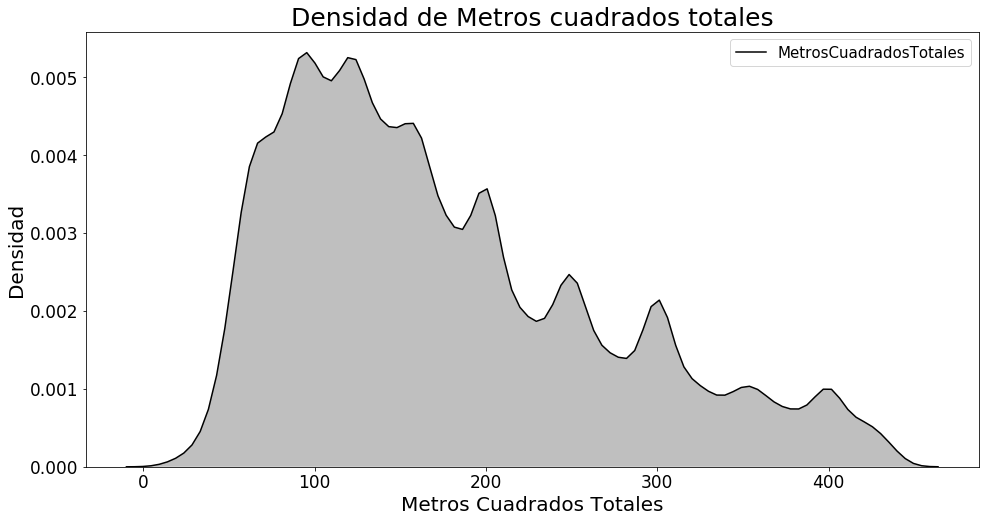

In [125]:
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosTotales"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosTotales'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Metros Cuadrados Totales", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados totales", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
ax.legend(fontsize=15);

#### Se puede apreciar que la mayoria de las propiedades en ambos graficos caen en el rango de 0 - 150 metros, curiosamente la distribucion de metros cuadrados cubiertos parece alcanzar su pico y luego decrecer de manera casi lineal a medida que aumentan los metros.
#### Tambien en ambos graficos se puede ver que hay unos pequeños picos en valores multiplos de 50 como los son 150, 200, 250, 300 metros, etc. Nuevamente se puede apreciar que hay una preferencia por los numeros "redondos" a la hora de completar estos valores.

In [126]:
df_pp = dfok.copy()

df_pp["Fecha"] = df_pp["Fecha"].astype('datetime64')

df_pp.index = df_pp["Fecha"]

df_pp = df_pp[["TipoPropiedad"]]

for e in df_pp["TipoPropiedad"].unique():
    df_pp[e] = (df_pp["TipoPropiedad"] == e).apply(int)

df_pp = df_pp.drop("TipoPropiedad", axis=1)

df_pp["Otros"] = sum([df_pp[c] for c in df_pp.columns if c not in ["Apartamento", "Casa en condominio", "Casa", "Terreno"]])

df_pp = df_pp[["Apartamento", "Casa en condominio", "Casa", "Terreno", "Otros"]]

df_pp = df_pp.resample('M').sum()

df_perc = df_pp.divide(df_pp.sum(axis=1), axis=0)

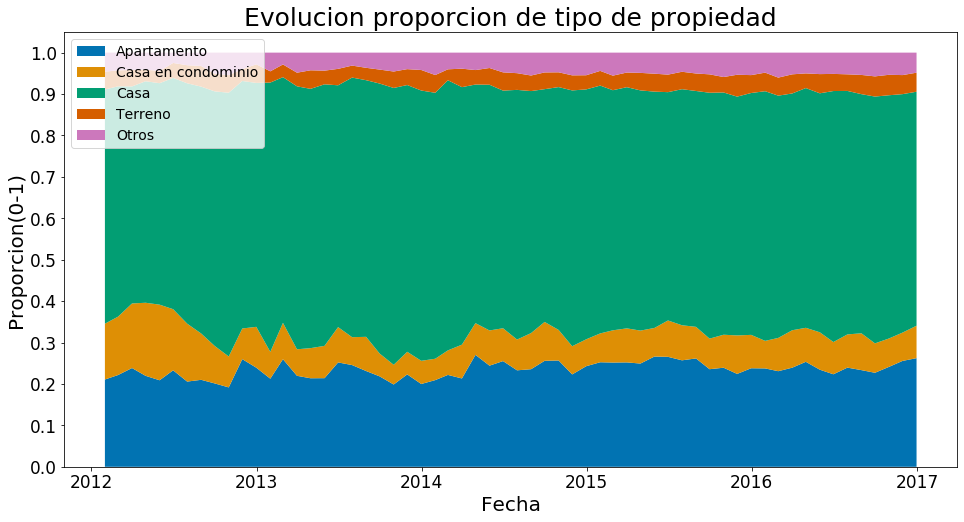

In [127]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
paleta = sb.color_palette("colorblind")
plt.stackplot(df_pp.index,
              [df_perc[colu] for colu in df_perc.columns],
              labels=[colu for colu in df_perc.columns], colors=paleta)
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Proporcion(0-1)", fontsize=20)
plt.yticks([i for i in np.arange(0,1.1,0.1)])
plt.title("Evolucion proporcion de tipo de propiedad", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

plt.legend(loc='upper left', fontsize=14);

In [128]:
dfok.sample(5)

ID                                                    Titulo  \
161039  193132                    oportunidad vendo casa en quintana roo   
168612  260826                            terrenos en venta la loma golf   
216046   15251  casa en buenas condiciones en fracc. valle del campestre   
145255  183018                             lomas universidad depto venta   
161497  237486                      casa en venta en col. miguel hidalgo   

            TipoPropiedad   Precio      Fecha  Antiguedad  \
161039               Casa  1950000 2014-12-16         5.0   
168612  Terreno comercial  1139715 2015-06-19         NaN   
216046               Casa   550000 2015-08-20        20.0   
145255        Apartamento   650000 2015-08-10        20.0   
161497               Casa  1750000 2014-11-25        20.0   

        MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
161039                     120.0                     NaN   
168612                       NaN                   265.0   
216046                      67.0                    90.0   
145255                      47.0                    47.0   
161497                     298.0                   298.0   

                                                                                                Descripcion  \
161039  hermosa casa en puerto morelos, quintana roo, en un terreno de 2500 mts, a solo 3 kms de las bel...   
168612                                                                  mas accion  poca pendiente negativa   
216046  <p>casa de 1 nivel con :cochera 1 auto con reja, sala, comedor, cocina integral, 3 recmaras con ...   
145255  lomas universidad: buena ubicación cerca de plaza galerías, a 2 cuadras de av. novelistas, rodea...   
161497  construcción: 298 mt \nestado del inmueble: bueno \nterreno en el cual hay construidos 3 departa...   

        CantHabitaciones  CantGarages  CantBanos      IDZona  \
161039               2.0          NaN        1.0  50003429.0   
168612               NaN          NaN        NaN         NaN   
216046               3.0          1.0        1.0     87584.0   
145255               2.0          1.0        1.0     47719.0   
161497               2.0          0.0        1.0     23449.0   

                                            Direccion           Ciudad  \
161039                              DIONISIO PECH # 4           Cancún   
168612                                            NaN  San Luis Potosí   
216046                                            NaN  San Luis Potosí   
145255                    Juan Díaz Covarrubias 6014           Zapopan   
161497  COL. MIGUEL HIDALGO CALLE: privada de juarez      Azcapotzalco   

               Provincia    Latitud    Longitud  TieneGimnasio  \
161039      Quintana Roo        NaN         NaN          False   
168612   San luis Potosí  22.126434 -101.033535          False   
216046   San luis Potosí        NaN         NaN          False   
145255           Jalisco        NaN         NaN          False   
161497  Distrito Federal        NaN         NaN          False   

        TieneUsosMultiples  TienePileta  TieneEscuelasCerca  \
161039               False        False                True   
168612               False        False               False   
216046               False        False               False   
145255               False        False                True   
161497               False        False                True   

        TieneShoppingsCerca  
161039                False  
168612                False  
216046                False  
145255                 True  
161497                 True

### Análisis de propiedades por sus comodidades

Se va a analizar la relación entre la provincia y la cantidad de tipos de comodidad de las propiedades.

In [129]:
columnas = ['Ciudad',
            'Provincia',
            'TieneGimnasio',
            'TieneUsosMultiples',
            'TienePileta',
            'TieneEscuelasCerca',
            'TieneShoppingsCerca',
            'Precio'] 
df_abool = dfok[columnas].copy()

En el análisis exploratorio de Navent se indica que los nombres de ciudades y provincias son String, el precio se representa con tipo entero y las demás columnas de comodidades son Booleanas. 

Se crea un nuevo DataFrame df_abool que copia columnas de interés del DataFrame original.

### Análisis de calidad de datos

In [130]:
print(df_abool.isnull().sum())
memoria_usada = df_abool.memory_usage()
print('\nTotal memoria usada sin cambios de tipos {:.2f}'.format(memoria_usada.sum()/1024/1024), 'MB')

Ciudad                 372
Provincia              155
TieneGimnasio            0
TieneUsosMultiples       0
TienePileta              0
TieneEscuelasCerca       0
TieneShoppingsCerca      0
Precio                   0
dtype: int64

Total memoria usada sin cambios de tipos 5.72 MB


Aparecen valores nulos en las columnas Ciudad y Provincia. Se verifica si hay alguna relación entre los valores nulos de provincias y ciudades. Para esto se ubican los casos en que ambos son nulos.

Aparecen valores nulos en las columnas Ciudad y Provincia. Se verifica si hay alguna relación entre los valores nulos de provincias y ciudades. Para esto se ubican los casos en que ambos son nulos.

In [131]:
df_abool[(df_abool['Ciudad'].isnull() == True) & (df_abool['Provincia'].isnull() == True)].isnull().sum()

Ciudad                 155
Provincia              155
TieneGimnasio            0
TieneUsosMultiples       0
TienePileta              0
TieneEscuelasCerca       0
TieneShoppingsCerca      0
Precio                   0
dtype: int64

Antes se tenía 155 casos de Provincia nulos, pero aquí se ve que ésos valores también tienen ciudades nulas. Como se van utilizar estos valores conviene descartarlos.

In [132]:
df_abool.dropna(subset=['Provincia'], inplace=True)
df_abool.isnull().sum()

Ciudad                 217
Provincia                0
TieneGimnasio            0
TieneUsosMultiples       0
TienePileta              0
TieneEscuelasCerca       0
TieneShoppingsCerca      0
Precio                   0
dtype: int64

A continuación se verifica qué proporción de valores nulos de ciudades por provincia queda, para ver si es correcto eliminarlas.

In [133]:
# Se crea un DataFrame donde solo se almacenan los casos con valores nulos de ciudades
cant_nulos_provincia = df_abool.loc[df_abool['Ciudad'].isnull() == True].copy() # Devuelve un DataFrame
# Se elije solo la columna Provincia y se realiza un conteo. Devuelve una Serie
cant_nulos_provincia = cant_nulos_provincia['Provincia'].value_counts() # Devuelve una Serie
# Se transforma la Serie a DataFrame
cant_nulos_provincia = cant_nulos_provincia.to_frame()
# Se resetea el índice para tener una columna con el nombre de las provincias
cant_nulos_provincia.reset_index(inplace = True)
# Se cambia el nombre a la columna de las provincias
cant_nulos_provincia.rename(columns = {'index' : 'Provincia', 'Provincia' : 'cant_nulos'}, inplace = True)
# Se ordena alfabéticamente por nombre de provincia
cant_nulos_provincia.sort_values(by='Provincia', ascending = True, inplace = True)
cant_nulos_provincia.reset_index(drop = True, inplace=True)

Con esto se tiene un DataFrame con una columna con los nombres de las provincias y otra con la cantidad correspondiente de ciudades nulas.

Luego se crea un DataFrame con la cantidad total de casos por provincia, que luego que compara con los casos nulos.

In [134]:
cant_total_provincia = df_abool['Provincia'] # Devuelve una Serie
# Se convierto a DataFrame
cant_total_provincia = cant_total_provincia.value_counts().to_frame()
# Se resetea el índice para tener una columna con el nombre de las provincias
cant_total_provincia.reset_index(inplace = True)
# Se cambia el nombre a la columna de las provincias
cant_total_provincia.rename(columns = {'index' : 'Provincia', 'Provincia' : 'cant_total'}, inplace = True)
# Se ordena alfabéticamente por nombre de provincia
cant_total_provincia.sort_values(by = 'Provincia', ascending = True, inplace = True)
cant_total_provincia.reset_index(drop = True, inplace = True)

El DataFrame `cant_total_provincia` tiene una columna con los nombres de las provincias y otra con la cantidad total de provincias.

### Merge de `cant_nulos_provincia` con `cant_total_provincia`

1. DataFrame izquierdo `cant_nulos_provincia`
- DataFrame derecho `cant_total_provincia`
 
La unión se realiza sobre la columna Provincia.

In [135]:
df_joined = pd.merge(cant_nulos_provincia, cant_total_provincia, on='Provincia', how = 'inner')

Como en `cant_nulos_provincia` había ceros (casos de provincias sin valores nulos), se seleccionan solo los casos distintos de cero. Recordar que se quiere eliminar los nulos.

In [136]:
df_joined = df_joined.loc[df_joined['cant_nulos'] != 0].copy()
df_joined.reset_index(drop = True, inplace = True)
# Ya se tiene un DataFrame para calcular la proporción de los valores nulos en los totales (por provincia)

Ahora se agrega una columna de proporciones.

In [137]:
df_joined['propor_nulos [%]'] = df_joined['cant_nulos'] / df_joined['cant_total'] * 100
# Se redondea a dos decimales
df_joined['propor_nulos [%]'] = df_joined['propor_nulos [%]'].round(2)
df_joined

Provincia  cant_nulos  cant_total  propor_nulos [%]
0          Chihuahua          46        4590              1.00
1   Distrito Federal          20       58790              0.03
2            Durango           1        2275              0.04
3     Edo. de México          18       41607              0.04
4         Guanajuato           3        2860              0.10
5           Guerrero           3        2678              0.11
6            Jalisco          21       21238              0.10
7            Morelos           2        7337              0.03
8         Nuevo León           9       15324              0.06
9             Oaxaca           3         711              0.42
10            Puebla           5       10421              0.05
11         Querétaro           8       16988              0.05
12      Quintana Roo          17        4756              0.36
13   San luis Potosí          47        8447              0.56
14           Tabasco           1         994              0.10
15        Tamaulipas           7        2303              0.30
16          Veracruz           6        5762              0.10

Se ve que no representan más del 1% de los casos totales. Enonces se pueden eliminar.

In [138]:
df_abool.dropna(inplace = True)

Ahora se tiene `df_abool` sin casos nulos.

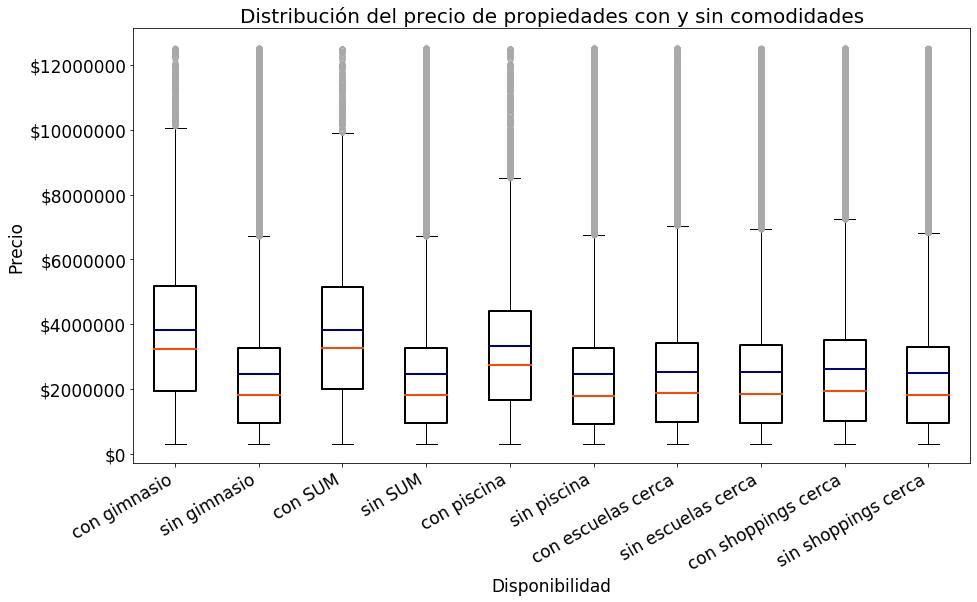

In [139]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize = 17, rotation = 30, ha = 'right')
plt.yticks(fontsize = 17)
plt.title("Distribución del precio de propiedades con y sin comodidades", fontsize = 20)
plot = plt.boxplot([df_abool.loc[df_abool['TieneGimnasio'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneGimnasio'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneUsosMultiples'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneUsosMultiples'] == False]['Precio'], \
                    df_abool.loc[df_abool['TienePileta'] == True]['Precio'], \
                    df_abool.loc[df_abool['TienePileta'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneEscuelasCerca'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneEscuelasCerca'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneShoppingsCerca'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneShoppingsCerca'] == False]['Precio']], 
                   labels = ['con gimnasio', 'sin gimnasio', \
                             'con SUM', 'sin SUM', \
                             'con piscina', 'sin piscina', \
                             'con escuelas cerca', 'sin escuelas cerca', \
                             'con shoppings cerca', 'sin shoppings cerca'],
                   widths = 0.5, \
                   meanline = True, showmeans=True, \
                   boxprops = dict(linewidth=2), \
                   meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'), \
                   # linestyle = '-' muestra la media con línea sólida
                   flierprops = dict(marker='o', markerfacecolor='none', markersize=5, \
                                     linestyle='none', markeredgecolor = 'darkgrey'), \
                   medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.xlabel('Disponibilidad', fontsize = 17)
plt.ylabel('Precio', fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

Observando las comodidades propias de las propiedades (gimnasio, Salón de usos múltiples y piscina), se nota que los precios aumentan, lo que es esperable.

La cercanía a comodidades compartidas (escuelas y centros comerciales) no modifica de manera apreciable el valor medio del precio de las propiedades.

In [140]:
# Se cuentan las propiedades con comodidades exclusivas.
solo_gimnasio = len(df_abool.loc[(df_abool['TieneGimnasio'] == True) & \
                                 (df_abool['TieneUsosMultiples'] == False) & \
                                 (df_abool['TienePileta'] == False)])

solo_sum = len(df_abool.loc[(df_abool['TieneGimnasio'] == False) & \
                            (df_abool['TieneUsosMultiples'] == True) & \
                            (df_abool['TienePileta'] == False)])

solo_piscina = len(df_abool.loc[(df_abool['TieneGimnasio'] == False) & \
                                (df_abool['TieneUsosMultiples'] == False) & \
                                (df_abool['TienePileta'] == True)])

print('Solo con gimnasio:', solo_gimnasio, \
      '\nSolo con salón de usos múltiples:', solo_sum, \
      '\nSolo con piscina:', solo_piscina)
proporcion = (solo_gimnasio + solo_sum + solo_piscina)*100/len(dfok)
print('Proporción de estos casos respecto del total:', round(proporcion,2), '%')

Solo con gimnasio: 5614 
Solo con salón de usos múltiples: 4987 
Solo con piscina: 11690
Proporción de estos casos respecto del total: 9.29 %


Como son muy pocos casos se va a tratar la distribuciones de comodidades de manera inclusiva, sin preocupación de si tienen o no otro tipo de amenidad.

In [141]:
# Se referencian los datos para los distintos gráficos.
con_gimnasio = df_abool.loc[df_abool['TieneGimnasio'] == 1]
con_sum = df_abool.loc[df_abool['TieneUsosMultiples'] == 1]
con_piscina = df_abool.loc[df_abool['TienePileta'] == 1]

A continuación se generan DataFrames para tener una lista ordenada con los nombres de las provincias:
1. Se arma un DataFrame agrupando por `Provincia` y realizando una agregación por media de `Precio`;
- Se le cambia el nombre a la columna `{'Precio':'Media Precio'}`;
- Se ordena de mayor a menor por `Media Precio`;
- Se resetea el índice para tener una columna `Provincia` con los nombres de las provincias.


In [142]:
con_gimnasio_orden_media = con_gimnasio.groupby('Provincia').agg({'Precio':'mean'})
con_gimnasio_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_gimnasio_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_gimnasio_orden_media.reset_index(inplace = True)

con_sum_orden_media = con_sum.groupby('Provincia').agg({'Precio':'mean'})
con_sum_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_sum_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_sum_orden_media.reset_index(inplace = True)

con_piscina_orden_media = con_piscina.groupby('Provincia').agg({'Precio':'mean'})
con_piscina_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_piscina_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_piscina_orden_media.reset_index(inplace = True)

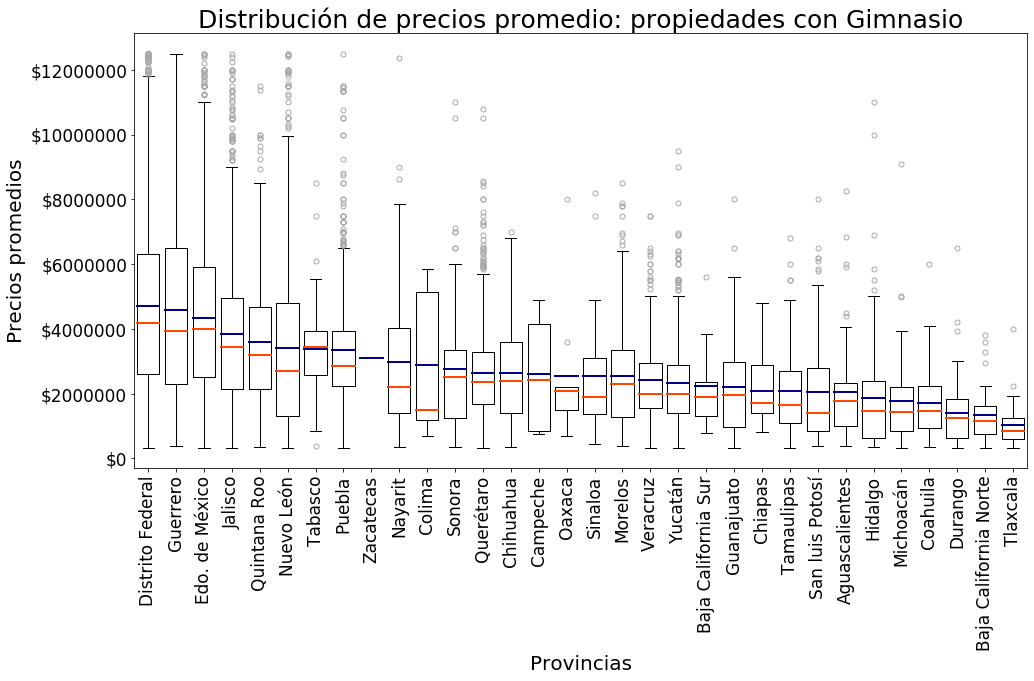

In [143]:
# Gráfico de distribución de precios de propiedades con gimnasio.
plt.figure(figsize = (16,8))
plt.boxplot([
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][0]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][1]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][2]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][3]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][4]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][5]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][6]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][7]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][8]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][9]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][10]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][11]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][12]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][13]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][14]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][15]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][16]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][17]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][18]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][19]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][20]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][21]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][22]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][23]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][24]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][25]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][26]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][27]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][28]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][29]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][30]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][31]]['Precio']], \
    labels = con_gimnasio_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de precios promedio: propiedades con Gimnasio', fontsize = 25)
plt.ylabel('Precios promedios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

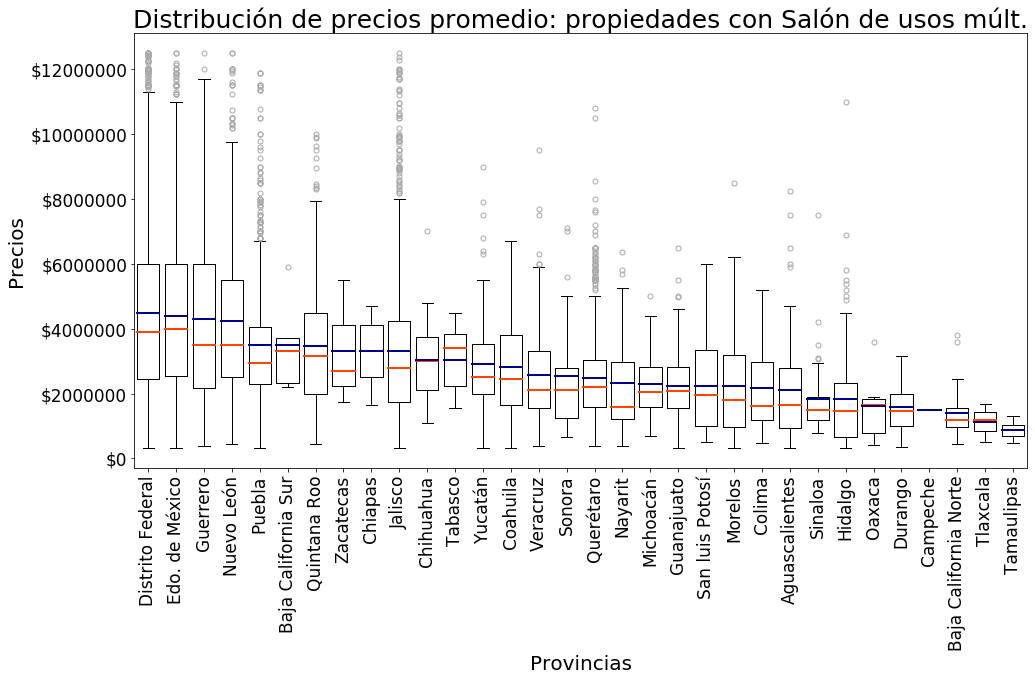

In [144]:
# Gráfico de distribución de precios de propiedades con salón de usos múltiples.
plt.figure(figsize = (16,8))
plt.boxplot([
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][0]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][1]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][2]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][3]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][4]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][5]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][6]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][7]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][8]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][9]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][10]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][11]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][12]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][13]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][14]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][15]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][16]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][17]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][18]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][19]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][20]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][21]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][22]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][23]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][24]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][25]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][26]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][27]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][28]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][29]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][30]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][31]]['Precio']], \
    labels = con_sum_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de precios promedio: propiedades con Salón de usos múlt.', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

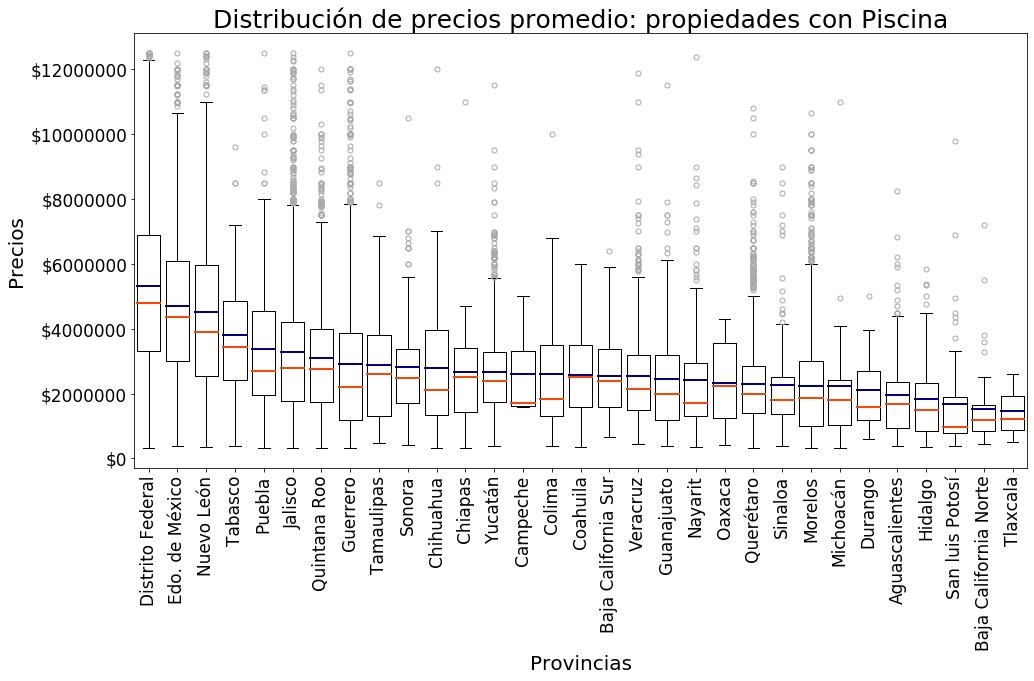

In [145]:
# Gráfico de distribución de precios de propiedades con salón de usos múltiples.
plt.figure(figsize = (16,8))
plt.boxplot([
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][0]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][1]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][2]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][3]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][4]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][5]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][6]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][7]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][8]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][9]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][10]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][11]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][12]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][13]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][14]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][15]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][16]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][17]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][18]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][19]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][20]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][21]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][22]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][23]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][24]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][25]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][26]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][27]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][28]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][29]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][30]]['Precio']], \
    labels = con_piscina_orden_media['Provincia'],
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'),\
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de precios promedio: propiedades con Piscina', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

Ahora se estudia la distribución de precios por provincia.

In [146]:
# Se crea la lista de provincias ordenadas por media de precios de propiedades.
df_abool_orden_media = df_abool.groupby('Provincia').agg({'Precio':'mean'})
df_abool_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
df_abool_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
df_abool_orden_media.reset_index(inplace = True)

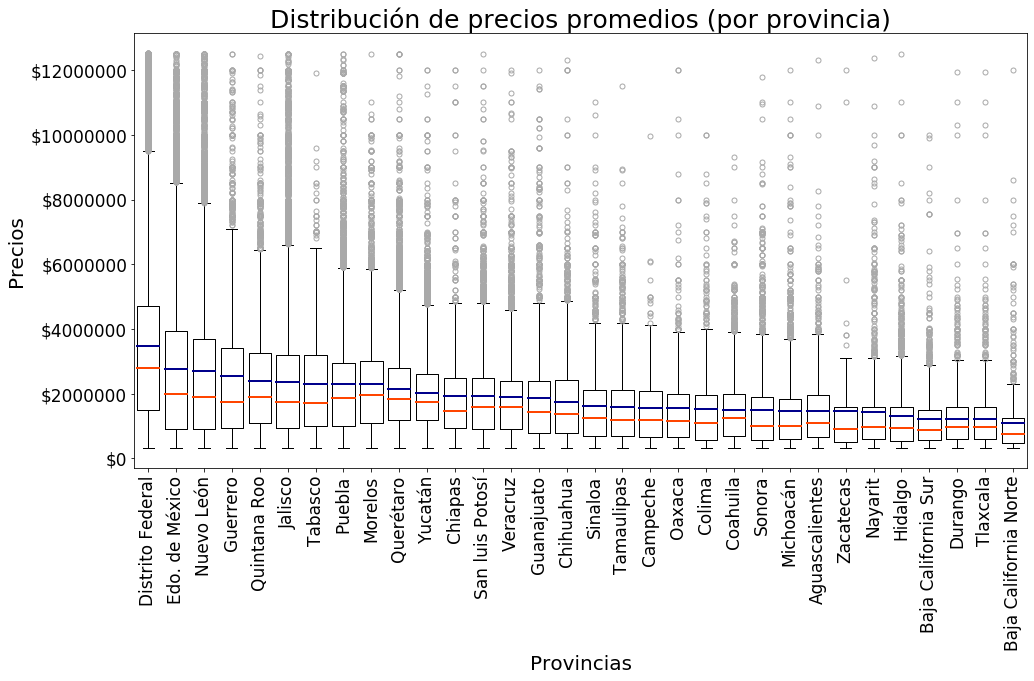

In [147]:
# Gráfico de distribución de precios de propiedades por provincia.
plt.figure(figsize = (16,8))
plt.boxplot([
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][0]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][1]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][2]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][3]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][4]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][5]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][6]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][7]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][8]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][9]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][10]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][11]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][12]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][13]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][14]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][15]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][16]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][17]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][18]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][19]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][20]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][21]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][22]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][23]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][24]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][25]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][26]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][27]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][28]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][29]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][29]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][30]]['Precio']], \
    labels = df_abool_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de precios promedios (por provincia)', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

Todas las medianas están por debajo de las medias.

Luego se busca la provincia que más registro de comodidades tiene, para ver si se comporta de la misma manera.

In [148]:
# Se agrupa por provincias y se suman las comodidades por tipo.
cant_registros_provincia = \
    df_abool\
        .groupby('Provincia')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})
# Se agrega una columna que suma el total de las comodidades por provincia.
cant_registros_provincia['Total'] = cant_registros_provincia.sum(axis = 1)
# Se ordena de forma descendente por total de comodidades por provincia.
cant_registros_provincia.sort_values(by = 'Total', ascending = False, inplace = True)
# Se ubica la provincia con más comodidades registradas.
cant_registros_provincia.iloc[0].to_frame().T

TieneGimnasio  TieneUsosMultiples  TienePileta  \
Distrito Federal         4410.0              4044.0       2627.0   

                  TieneEscuelasCerca  TieneShoppingsCerca    Total  
Distrito Federal             28118.0              26185.0  65384.0

In [149]:
# Otra forma de encontrar la provincia con más comodidades (sin ordenar).
cant_registros_provincia\
    .loc[cant_registros_provincia['Total'] == cant_registros_provincia['Total'].max()]

TieneGimnasio  TieneUsosMultiples  TienePileta  \
Provincia                                                          
Distrito Federal         4410.0              4044.0       2627.0   

                  TieneEscuelasCerca  TieneShoppingsCerca    Total  
Provincia                                                           
Distrito Federal             28118.0              26185.0  65384.0

La provincia con más comodidades anotadas es Distrito Federal.

In [150]:
# Se crea un DataFrame para tener un orden por promedio de precios en ciudades de Distrito Federal.
distrito_federal = df_abool.loc[df_abool['Provincia'] == 'Distrito Federal'].copy()
# Se agrupa por ciudades, se se calcula la media y se ordena de manera descendente.
distrito_federal_ciudades_orden_media = \
    distrito_federal\
        .groupby('Ciudad')\
        .agg({'Precio':'mean'})\
        .sort_values(by = 'Precio', ascending = False)
# Se renombra la columna
distrito_federal_ciudades_orden_media.columns = ['Media Precio']
# Se resetea el índice para tener la columna Ciudad.
distrito_federal_ciudades_orden_media.reset_index(inplace = True)

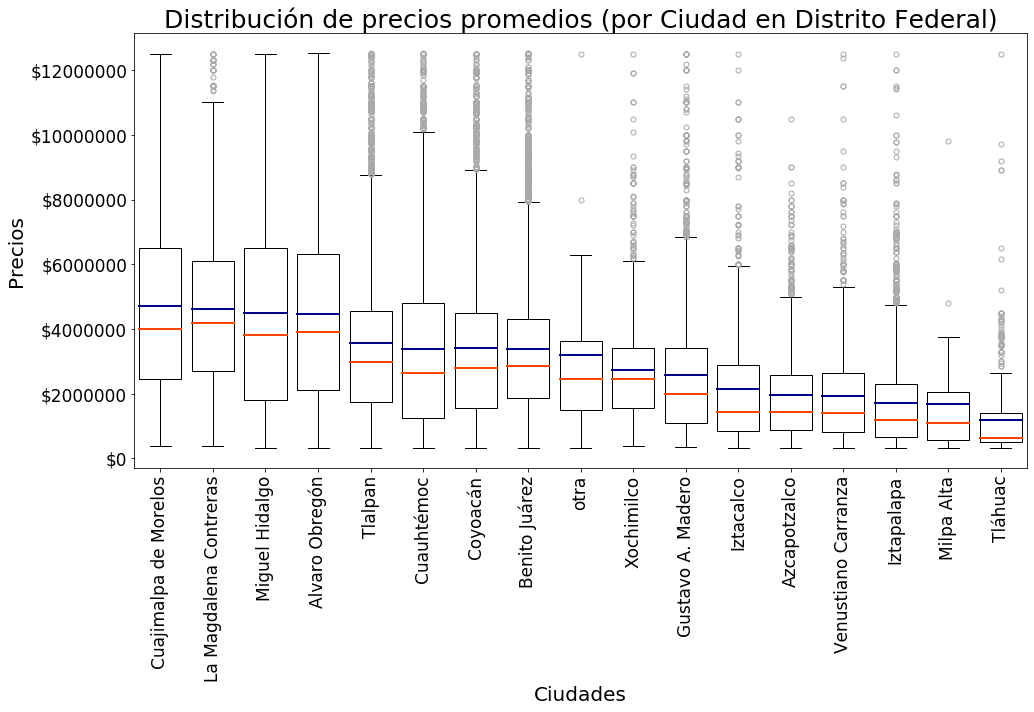

In [151]:
# Gráfico de distribución de precios de propiedades en Distrito Federal, por ciudad.
plt.figure(figsize = (16,8))
plt.boxplot([
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][0]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][1]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][2]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][3]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][4]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][5]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][6]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][7]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][8]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][9]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][10]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][11]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][12]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][13]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][14]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][15]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][16]]['Precio']], \
    labels = distrito_federal_ciudades_orden_media['Ciudad'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de precios promedios (por Ciudad en Distrito Federal)', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Ciudades', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.show()

También tiene las medianas por debajo de las medias.

Por otra parte, se puede ver cuáles son las coincidencias para las 10 provincias más caras y las 10 más baratas. Se usa una unión para hallar las mismas.

In [152]:
inicio = 0
fin = 10
coincidencias_caras = pd.merge(df_abool_orden_media[inicio:fin], con_sum_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_caras = pd.merge(coincidencias_caras, con_piscina_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_caras = pd.merge(coincidencias_caras, con_gimnasio_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_caras['Provincia'].to_frame().T

0               1           2         3  \
Provincia  Distrito Federal  Edo. de México  Nuevo León  Guerrero   

                      4        5       6  
Provincia  Quintana Roo  Jalisco  Puebla

In [153]:
inicio = 20
fin = 32
coincidencias_baratas = pd.merge(df_abool_orden_media[inicio:fin], con_sum_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_baratas = pd.merge(coincidencias_baratas, con_piscina_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_baratas = pd.merge(coincidencias_baratas, con_gimnasio_orden_media[inicio:fin], on = ['Provincia'], how = 'inner')
coincidencias_baratas['Provincia'].to_frame().T

0        1        2         3                      4
Provincia  Aguascalientes  Hidalgo  Durango  Tlaxcala  Baja California Norte

# Análisis de tipo de comodidad a medida que pasan los años

In [154]:
# Se usa df_ok para las columnas porque tiene números en las columnas, sirve para contar.
df_comodidad = dfok[['Antiguedad', \
                     'TieneGimnasio', \
                     'TieneUsosMultiples', \
                     'TienePileta', \
                     'TieneEscuelasCerca', \
                     'TieneShoppingsCerca']].copy() # Para modificar df_comodidad sin warnings.

Se analiza si hay casos nulos.

In [155]:
print('Casos nulos por columna:')
print(df_comodidad.isnull().sum())
print('\nTipo de dato de las columnas:')
print(df_comodidad.dtypes)
memoria_usada = df_comodidad.memory_usage().sum()/(1024*1024)
print('\nMemoria usada', memoria_usada.round(2), "MB")

Casos nulos por columna:
Antiguedad             43555
TieneGimnasio              0
TieneUsosMultiples         0
TienePileta                0
TieneEscuelasCerca         0
TieneShoppingsCerca        0
dtype: int64

Tipo de dato de las columnas:
Antiguedad             float64
TieneGimnasio             bool
TieneUsosMultiples        bool
TienePileta               bool
TieneEscuelasCerca        bool
TieneShoppingsCerca       bool
dtype: object

Memoria usada 2.98 MB


Hay 43555 casos nulos y es necesario rmoverlos para covertir los tipos. Hasta aquí los tipos del DataFrame `df_comodidad` son `float64`.

In [156]:
# Se eliminan las filas nulas, para así poder realizar las conversión de tipos.
# Además, para este análisis es necesario un valor en la columna 'Antiguedad'.
df_comodidad.dropna(inplace = True)

In [157]:
df_comodidad.head()

Antiguedad  TieneGimnasio  TieneUsosMultiples  TienePileta  \
1        10.0          False               False        False   
2         5.0          False               False        False   
3         1.0          False               False        False   
4        10.0          False               False        False   
5         5.0          False               False        False   

   TieneEscuelasCerca  TieneShoppingsCerca  
1                True                 True  
2               False                False  
3                True                 True  
4               False                False  
5               False                 True

In [158]:
# Se cambian los tipos del DataFrame.
df_comodidad['Antiguedad'] = df_comodidad['Antiguedad'].astype(np.uint8)
df_comodidad['TieneGimnasio'] = df_comodidad['TieneGimnasio'].astype(np.uint8)
df_comodidad['TieneUsosMultiples'] = df_comodidad['TieneUsosMultiples'].astype(np.uint8)
df_comodidad['TienePileta'] = df_comodidad['TienePileta'].astype(np.uint8)
df_comodidad['TieneEscuelasCerca'] = df_comodidad['TieneEscuelasCerca'].astype(np.uint8)
df_comodidad['TieneShoppingsCerca'] = df_comodidad['TieneShoppingsCerca'].astype(np.uint8)
memoria_usada = df_comodidad.memory_usage().sum()/(1024*1024)
print('Memoria usada', memoria_usada.round(2), "MB")

Memoria usada 2.62 MB


Como se tienen 80 años para antigüedad, agregro una columna con rango de años tomados de a 5 años(lustros).

Para esto se define una función de calcula el rango de años dónde cae la antigüedad de la propiedad. Primero se elige un orden y luego se cambia el nombre de las filas. De esta manera se evita tener que insertar una fila en medio del DataFrame: 
 - el rango `6 - 10` quedaría entre `56 - 60` y `61 - 65`.

In [159]:
# Se define una función de calcula el rango de años dónde cae la antigüedad de la propiedad.
# Primero se elige un orden y luego se cambia el nombre de las filas.
# Esto es para evitar tener que insertar una fila en medio del DataFrame.
def rango_de_años(df):
    if df['Antiguedad'] <= 5: return '00'# '0 - 5'
    elif 6  <= df['Antiguedad'] <= 10: return '01'# '6 - 10'
    elif 11 <= df['Antiguedad'] <= 15: return '02'# '11 - 15'
    elif 16 <= df['Antiguedad'] <= 20: return '03'# '16 - 20'
    elif 21 <= df['Antiguedad'] <= 25: return '04'# '21 - 25'
    elif 26 <= df['Antiguedad'] <= 30: return '05'# '26 - 30'
    elif 31 <= df['Antiguedad'] <= 35: return '06'# '31 - 35'
    elif 36 <= df['Antiguedad'] <= 40: return '07'# '26 - 40'
    elif 41 <= df['Antiguedad'] <= 45: return '08'# '41 - 45'
    elif 46 <= df['Antiguedad'] <= 50: return '09'# '46 - 50'
    elif 51 <= df['Antiguedad'] <= 55: return '10'# '51 - 55'
    elif 56 <= df['Antiguedad'] <= 60: return '11'# '56 - 60'
    elif 61 <= df['Antiguedad'] <= 65: return '12'# '61 - 65'
    elif 66 <= df['Antiguedad'] <= 70: return '13'# '66 - 70'
    elif 71 <= df['Antiguedad'] <= 75: return '14'# '71 - 75'
    elif 76 <= df['Antiguedad'] <= 80: return '15'# '76 - 80'

In [160]:
# Auxiliar para asignar lustros.
aux = df_comodidad.apply(rango_de_años, axis = 1) # Devuelve una Serie

In [161]:
# Se hace una copia para los agrupados y se agrega la columna LustroAntiguedad.
df_comodidad_lustros = df_comodidad.copy()
df_comodidad_lustros['LustrosAntiguedad'] = aux

In [162]:
# Se agrupa por LustroAntiguedad y se suman los unos.
# Se termina descartando la columna Antiguedad en df_comodidad_lustro.
df_comodidad_lustros = \
    df_comodidad_lustros.\
        groupby('LustrosAntiguedad')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})
# Cambio del tipo de datos.
df_comodidad_lustros['TieneGimnasio'] = df_comodidad_lustros['TieneGimnasio'].astype(np.uint16)
df_comodidad_lustros['TieneUsosMultiples'] = df_comodidad_lustros['TieneUsosMultiples'].astype(np.uint16)
df_comodidad_lustros['TienePileta'] = df_comodidad_lustros['TienePileta'].astype(np.uint16)
df_comodidad_lustros['TieneEscuelasCerca'] = df_comodidad_lustros['TieneEscuelasCerca'].astype(np.uint16)
df_comodidad_lustros['TieneShoppingsCerca'] = df_comodidad_lustros['TieneShoppingsCerca'].astype(np.uint16)
# Se reseta el índice
df_comodidad_lustros.reset_index(inplace = True)
# Se renombra la columna LustrosAntiguedad.
df_comodidad_lustros['LustrosAntiguedad'] = \
['0 - 5', '6 - 10', '11 - 15', '16 - 20', \
 '21 - 25', '26 - 30', '31 - 35', '36 - 40', \
 '41 - 45', '46 - 50', '51 - 55', '56 - 60', \
 '61 - 65', '66 - 70', '71 - 75', '76 - 80']
# Se elige como índice la columna LustrosAntiguedad con los nuevos nombres.
df_comodidad_lustros.set_index('LustrosAntiguedad', inplace = True)

In [163]:
df_comodidad_lustros

TieneGimnasio  TieneUsosMultiples  TienePileta  \
LustrosAntiguedad                                                   
0 - 5                      10782                9652        15573   
6 - 10                      1659                1498         2236   
11 - 15                      314                 218          457   
16 - 20                      544                 671          697   
21 - 25                      162                  78          138   
26 - 30                       62                  85          105   
31 - 35                       15                  37           31   
36 - 40                       14                  19           28   
41 - 45                        1                   5            4   
46 - 50                        7                  24           15   
51 - 55                        6                   0            3   
56 - 60                        4                   3            1   
61 - 65                        0                   0            1   
66 - 70                        0                   0            0   
71 - 75                        0                   0            0   
76 - 80                        1                   1            1   

                   TieneEscuelasCerca  TieneShoppingsCerca  
LustrosAntiguedad                                           
0 - 5                           58159                52386  
6 - 10                          20149                18271  
11 - 15                          3610                 2841  
16 - 20                         12406                11514  
21 - 25                          1758                 1343  
26 - 30                          1834                 1494  
31 - 35                           652                  493  
36 - 40                           680                  527  
41 - 45                           187                  140  
46 - 50                           625                  550  
51 - 55                            40                   29  
56 - 60                            59                   47  
61 - 65                             9                    6  
66 - 70                            15                   13  
71 - 75                             4                    4  
76 - 80                            11                    8

In [164]:
# Se calcula la totalidad de comodidades registradas.
total_comodidad_lustros = df_comodidad_lustros.sum(axis = 1)
# Se calculan las porporciones por lustro.
df_comodidad_propor_lustros = df_comodidad_lustros.apply(lambda x : round(x/total_comodidad_lustros,3))
# Se renombran las columnas apropiadamente.
columnas_proporciones = ['Proporcion Gimnasio', \
                         'Proporcion UsosMultiples', \
                         'Proporcion Pileta', \
                         'Proporcion EscuelasCerca', \
                         'Proporcion ShoppingsCerca']
df_comodidad_propor_lustros.columns = columnas_proporciones

In [165]:
# Se agregan las columnas de amenidades propias (gimnasio, SUM y piscina) y compartidas (escuelas y shoppings cercanos).
df_comodidad_propor_lustros['Proporcion Propias'] = \
        df_comodidad_propor_lustros['Proporcion Gimnasio'] + \
        df_comodidad_propor_lustros['Proporcion UsosMultiples'] + \
        df_comodidad_propor_lustros['Proporcion Pileta']
df_comodidad_propor_lustros['Proporcion Compartidas'] = \
        df_comodidad_propor_lustros['Proporcion EscuelasCerca'] + \
        df_comodidad_propor_lustros['Proporcion ShoppingsCerca']

In [166]:
df_comodidad_propor_lustros

Proporcion Gimnasio  Proporcion UsosMultiples  \
LustrosAntiguedad                                                  
0 - 5                            0.074                     0.066   
6 - 10                           0.038                     0.034   
11 - 15                          0.042                     0.029   
16 - 20                          0.021                     0.026   
21 - 25                          0.047                     0.022   
26 - 30                          0.017                     0.024   
31 - 35                          0.012                     0.030   
36 - 40                          0.011                     0.015   
41 - 45                          0.003                     0.015   
46 - 50                          0.006                     0.020   
51 - 55                          0.077                     0.000   
56 - 60                          0.035                     0.026   
61 - 65                          0.000                     0.000   
66 - 70                          0.000                     0.000   
71 - 75                          0.000                     0.000   
76 - 80                          0.045                     0.045   

                   Proporcion Pileta  Proporcion EscuelasCerca  \
LustrosAntiguedad                                                
0 - 5                          0.106                     0.397   
6 - 10                         0.051                     0.460   
11 - 15                        0.061                     0.485   
16 - 20                        0.027                     0.480   
21 - 25                        0.040                     0.505   
26 - 30                        0.029                     0.512   
31 - 35                        0.025                     0.531   
36 - 40                        0.022                     0.536   
41 - 45                        0.012                     0.555   
46 - 50                        0.012                     0.512   
51 - 55                        0.038                     0.513   
56 - 60                        0.009                     0.518   
61 - 65                        0.062                     0.562   
66 - 70                        0.000                     0.536   
71 - 75                        0.000                     0.500   
76 - 80                        0.045                     0.500   

                   Proporcion ShoppingsCerca  Proporcion Propias  \
LustrosAntiguedad                                                  
0 - 5                                  0.357               0.246   
6 - 10                                 0.417               0.123   
11 - 15                                0.382               0.132   
16 - 20                                0.446               0.074   
21 - 25                                0.386               0.109   
26 - 30                                0.417               0.070   
31 - 35                                0.401               0.067   
36 - 40                                0.416               0.048   
41 - 45                                0.415               0.030   
46 - 50                                0.450               0.038   
51 - 55                                0.372               0.115   
56 - 60                                0.412               0.070   
61 - 65                                0.375               0.062   
66 - 70                                0.464               0.000   
71 - 75                                0.500               0.000   
76 - 80                                0.364               0.135   

                   Proporcion Compartidas  
LustrosAntiguedad                          
0 - 5                               0.754  
6 - 10                              0.877  
11 - 15                             0.867  
16 - 20                             0.926  
21 - 25                             0.891  
26 - 30                             0.929  
31 - 35                     

In [167]:
print(df_comodidad_propor_lustros.mean().round(2))

Proporcion Gimnasio          0.03
Proporcion UsosMultiples     0.02
Proporcion Pileta            0.03
Proporcion EscuelasCerca     0.51
Proporcion ShoppingsCerca    0.41
Proporcion Propias           0.08
Proporcion Compartidas       0.92
dtype: float64


La media de la proporción de amenidades compartidas supera por más del 90% del total a las propias. Por esto se realizan una análisis separado.
 
También se puede calcular la proporción de registros que le corresponde a cada lustro. Para eso se puede usar la Serie `total_comodidades`, que contiene la cantidad total de amenidades registradas en cada lustro. Si se suma lo acumulado por cada lustro en los 80 años se obtiene la cantidad total de amenidades.

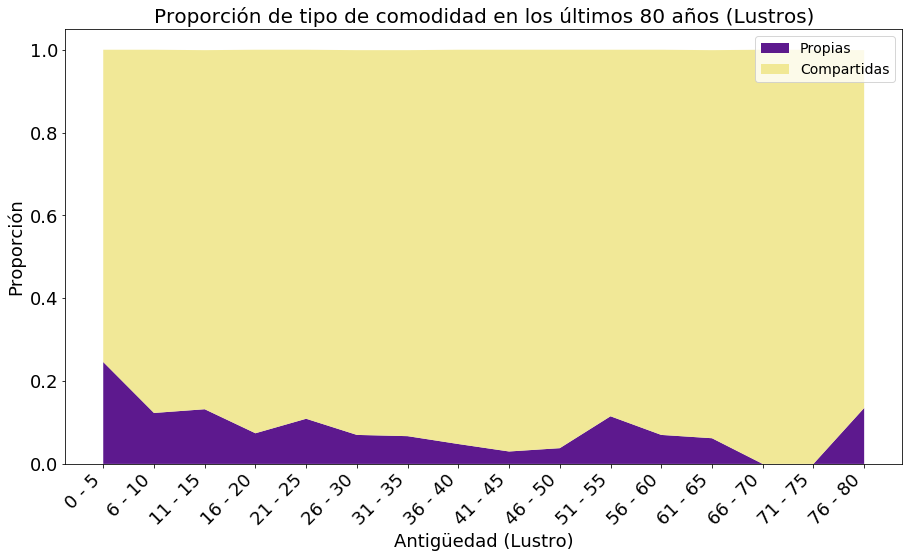

In [168]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_lustros.index
y = [df_comodidad_propor_lustros['Proporcion Propias'], \
     df_comodidad_propor_lustros['Proporcion Compartidas']
    ]
plt.stackplot(x,y, \
              labels = ['Propias', 'Compartidas'], \
              colors = ['indigo', 'khaki'], \
              alpha = 0.9)
plt.title('Proporción de tipo de comodidad en los últimos 80 años (Lustros)', fontsize = 20)
plt.xticks(fontsize = 18, rotation = 45, ha = 'right')
plt.yticks(fontsize = 18)
plt.xlabel('Antigüedad (Lustro)', fontsize = 18)
plt.ylabel('Proporción', fontsize = 18)
plt.legend(loc='upper right', fontsize = 14)
plt.show()

Aquí se visualiza la proporción de comodidades a los largo de los años por lustros. Se nota una clara dominancia de las amenidades compartidas por sobre las propia.

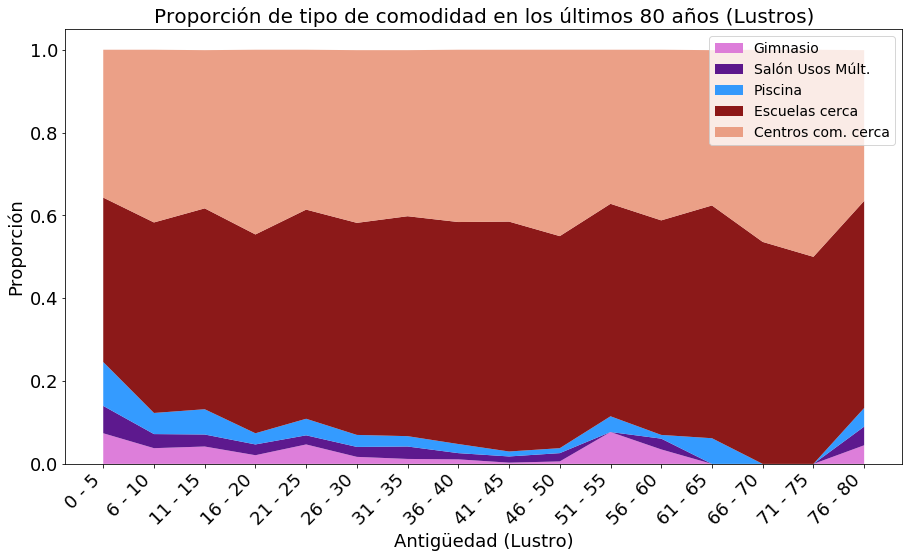

In [169]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_lustros.index
y = [df_comodidad_propor_lustros['Proporcion Gimnasio'], \
     df_comodidad_propor_lustros['Proporcion UsosMultiples'], \
     df_comodidad_propor_lustros['Proporcion Pileta'], \
     df_comodidad_propor_lustros['Proporcion EscuelasCerca'], \
     df_comodidad_propor_lustros['Proporcion ShoppingsCerca']
    ]
plt.stackplot(x,y, \
              labels = ['Gimnasio', \
                        'Salón Usos Múlt.', \
                        'Piscina', \
                        'Escuelas cerca', \
                        'Centros com. cerca'], \
              colors = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
              alpha = 0.9)
plt.title('Proporción de tipo de comodidad en los últimos 80 años (Lustros)', fontsize = 20)
plt.xticks(fontsize = 18, rotation = 45, ha = 'right')
plt.yticks(fontsize = 18)
plt.xlabel('Antigüedad (Lustro)', fontsize = 18)
plt.ylabel('Proporción', fontsize = 18)
plt.legend(loc='upper right', fontsize = 14)
plt.show()

Lo anterior muestra la proporción a cada tipo particular de comodidades.
 
A continuación se analiza la evolución de los registros de amenidades en años.

In [170]:
# Se agrupa por Antiguedad y se suman los unos.
df_comodidad_anios = \
    df_comodidad\
        .groupby('Antiguedad')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})

In [171]:
# Se calcula la totalidad de comodidades registradas por año.
total_comodidad_anios = df_comodidad_anios.sum(axis=1)
# Se calculan las porporciones por año.
df_comodidad_propor_anios = df_comodidad_anios.apply(lambda x : round(x/total_comodidad_anios, 3))
# Se renombran las columnas apropiadamente, con los mismos nombres de antes: columnas_proporciones.
df_comodidad_propor_anios.columns = columnas_proporciones

In [172]:
df_comodidad_propor_anios.loc[df_comodidad_propor_anios['Proporcion EscuelasCerca'].isnull() == True]

Proporcion Gimnasio  Proporcion UsosMultiples  Proporcion Pileta  \
Antiguedad                                                                     
64                          NaN                       NaN                NaN   
71                          NaN                       NaN                NaN   
74                          NaN                       NaN                NaN   
76                          NaN                       NaN                NaN   
79                          NaN                       NaN                NaN   

            Proporcion EscuelasCerca  Proporcion ShoppingsCerca  
Antiguedad                                                       
64                               NaN                        NaN  
71                               NaN                        NaN  
74                               NaN                        NaN  
76                               NaN                        NaN  
79                               NaN                        NaN

Hay años en los que hay datos nulos. Esto puede ser porque no hubo registros de esos años.

In [173]:
# Se reemplaza los datos nulos con ceros.
df_comodidad_propor_anios.fillna(0, inplace = True)
df_comodidad_propor_anios.loc[df_comodidad_propor_anios.sum(axis = 1) == 0]

Proporcion Gimnasio  Proporcion UsosMultiples  Proporcion Pileta  \
Antiguedad                                                                     
64                          0.0                       0.0                0.0   
71                          0.0                       0.0                0.0   
74                          0.0                       0.0                0.0   
76                          0.0                       0.0                0.0   
79                          0.0                       0.0                0.0   

            Proporcion EscuelasCerca  Proporcion ShoppingsCerca  
Antiguedad                                                       
64                               0.0                        0.0  
71                               0.0                        0.0  
74                               0.0                        0.0  
76                               0.0                        0.0  
79                               0.0                        0.0

Los años de antigüedad 64, 71, 74, 76 y 79 no registran tipos de comodidades.

In [174]:
# Se verifica si hay años faltantes para el atributo antigüedad.
antiguedades = dfok['Antiguedad'].value_counts() # Es una Serie.
print('Cantidad de años que informan registro de antigüedad:', len(antiguedades))
# Se busca obtener la columna Antiguedad.
antiguedades = antiguedades.to_frame()
antiguedades.reset_index(inplace = True)
antiguedades.columns = ['Antiguedad', 'Cantidad']
# Se ordenan de menor a mayor los años de antigüedad.
antiguedades.sort_values(by = 'Antiguedad', ascending = True, inplace = True)
antiguedades.set_index('Antiguedad', inplace = True)
# Se muestran los últimos casos.
print(antiguedades[71:80].index)

Cantidad de años que informan registro de antigüedad: 78
Float64Index([71.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0], dtype='float64', name='Antiguedad')


Faltan los años de antigüedad 72, 73 y 78.
 
Entonces se tienen los siguientes años sin registro de comodidades:
        64 - 71 - 72 - 73 - 74 - 76 - 78 - 79

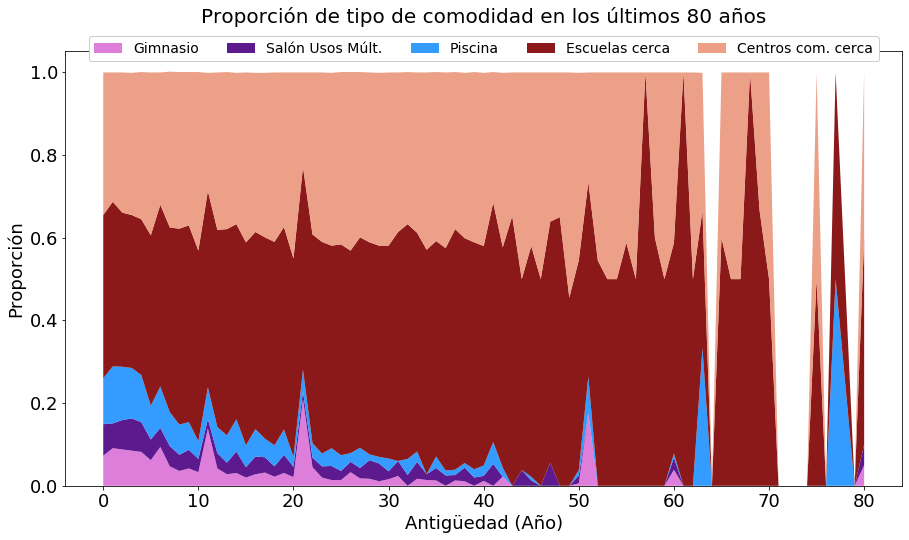

In [175]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_anios.index
y = [df_comodidad_propor_anios['Proporcion Gimnasio'], \
     df_comodidad_propor_anios['Proporcion UsosMultiples'], \
     df_comodidad_propor_anios['Proporcion Pileta'], \
     df_comodidad_propor_anios['Proporcion EscuelasCerca'], \
     df_comodidad_propor_anios['Proporcion ShoppingsCerca']
    ]
plt.stackplot(x,y, \
              labels = ['Gimnasio', 'Salón Usos Múlt.', 'Piscina', 'Escuelas cerca', 'Centros com. cerca'], \
              colors = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
              alpha = 0.9)
plt.title('Proporción de tipo de comodidad en los últimos 80 años', fontsize = 20, y = 1.05)
plt.xticks(fontsize = 18, rotation = 0, ha = 'center')
plt.yticks(fontsize = 18)
plt.xlabel('Antigüedad (Año)', fontsize = 18)
plt.ylabel('Proporción', fontsize = 18)
plt.legend(loc = 'upper center', fontsize = 14, bbox_to_anchor = (0.5, 1.05), ncol = 5, framealpha = 1)
plt.show()

Se puede puede ver cómo queda la proporción para los años que sí anotaron comodididades.

In [176]:
# Se remueven los años en los que no se registró ninguna comodidad.
df_comodidad_propor_anios_limpio = \
    df_comodidad_anios\
        .loc[df_comodidad_anios.sum(axis = 1) != 0.0]\
        .copy()
# Se guarda una Serie con los valores totales por año.
total_comodidad_anios_limpios = df_comodidad_propor_anios_limpio.sum(axis = 1)
# Se renombran las columnas de manera apropiada.
df_comodidad_propor_anios_limpio.columns = columnas_proporciones
# Se calculan las proporciones de los tipos de comodidad por año.
df_comodidad_propor_anios_limpio = \
    df_comodidad_propor_anios_limpio\
        .apply(lambda x : round(x/total_comodidad_anios_limpios, 3))

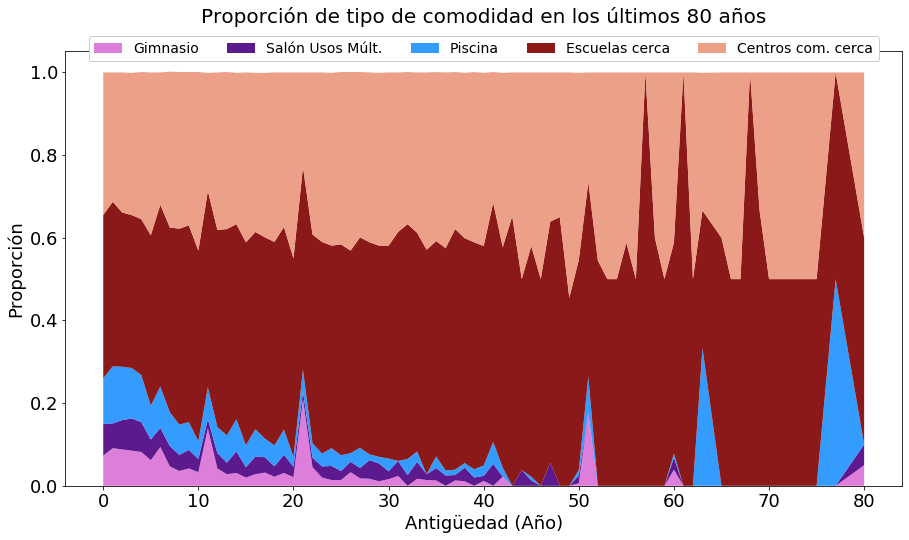

In [177]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_anios_limpio.index
y = [df_comodidad_propor_anios_limpio['Proporcion Gimnasio'], \
     df_comodidad_propor_anios_limpio['Proporcion UsosMultiples'], \
     df_comodidad_propor_anios_limpio['Proporcion Pileta'], \
     df_comodidad_propor_anios_limpio['Proporcion EscuelasCerca'], \
     df_comodidad_propor_anios_limpio['Proporcion ShoppingsCerca']
    ]
plt.stackplot(x,y, \
              labels = ['Gimnasio', 'Salón Usos Múlt.', 'Piscina', 'Escuelas cerca', 'Centros com. cerca'], \
              colors = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
              alpha = 0.9)
plt.title('Proporción de tipo de comodidad en los últimos 80 años', fontsize = 20, y = 1.05)
plt.xticks(fontsize = 18, rotation = 0, ha = 'center')
plt.yticks(fontsize = 18)
plt.xlabel('Antigüedad (Año)', fontsize = 18)
plt.ylabel('Proporción', fontsize = 18)
plt.legend(loc = 'upper center', fontsize = 14, bbox_to_anchor = (0.5, 1.05), ncol = 5, framealpha = 1)
plt.show()

Se puede analizar en qué período se acumula la cantidad de registros de amenidades.

In [178]:
# Se crea columna con la suma de amenidades por año.
df_comodidad_anios['Total'] = total_comodidad_anios
# Se resetea el índice para tener una columna Antiguedad.
df_comodidad_anios.reset_index(inplace = True)

In [179]:
# Se calcula la proporción de comodidades registradas según rango de antigüedad.
print('Proporción de comodidades con antigüedad de hasta 5 años:', \
      round(total_comodidad_anios[0:6].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 10 años:', \
      round(total_comodidad_anios[0:11].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 20 años:', \
      round(total_comodidad_anios[0:21].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 30 años:', \
      round(total_comodidad_anios[0:31].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 38 años:', \
      round(total_comodidad_anios[0:39].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 40 años:', \
      round(total_comodidad_anios[0:41].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Cantidad de años que registran comodidades:', len(df_comodidad_anios))

Proporción de comodidades con antigüedad de hasta 5 años: 62.36 %
Proporción de comodidades con antigüedad de hasta 10 años: 81.0 %
Proporción de comodidades con antigüedad de hasta 20 años: 95.16 %
Proporción de comodidades con antigüedad de hasta 30 años: 98.16 %
Proporción de comodidades con antigüedad de hasta 38 años: 98.79 %
Proporción de comodidades con antigüedad de hasta 40 años: 99.22 %
Cantidad de años que registran comodidades: 78


Más del 98% de las comodidades se registraron en propiedades de hasta 38 años de antigüedad. 78/2 = 39 entonces, de 0 a 38 años se tiene la mitad de los años que informan anotaciones y en ese rango se condensa la mayoría de registros de amenidades. 

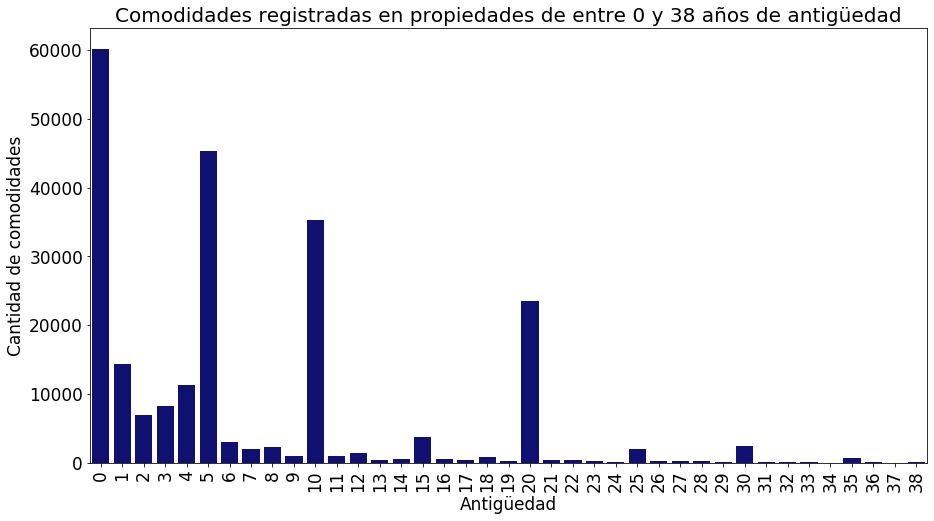

In [180]:
plt.figure(figsize = (15,8))
sb.barplot(x = 'Antiguedad', y = 'Total', data = df_comodidad_anios[0:39], color = 'navy')
plt.title('Comodidades registradas en propiedades de entre 0 y 38 años de antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 90, ha = 'center')
plt.yticks(fontsize = 17)
plt.xlabel('Antigüedad', fontsize = 17)
plt.ylabel('Cantidad de comodidades', fontsize = 17)
plt.show()

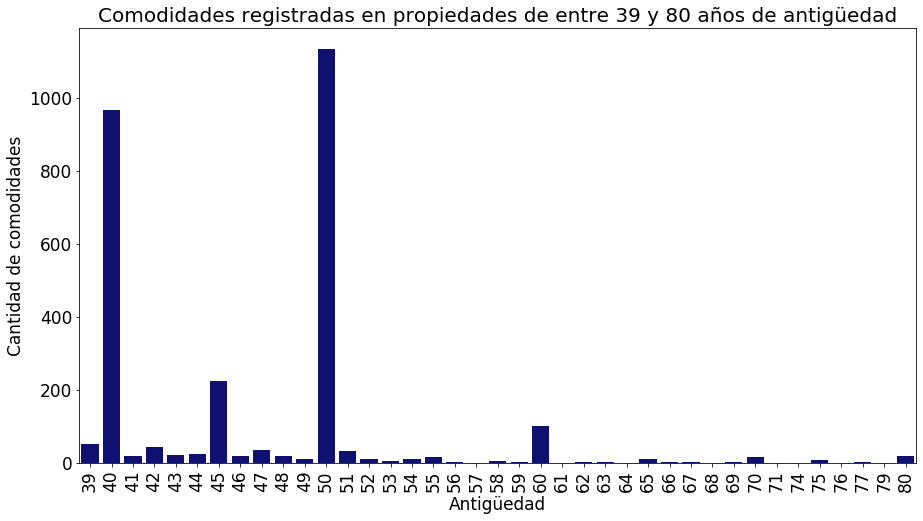

In [181]:
plt.figure(figsize = (15,8))
sb.barplot(x = 'Antiguedad', y = 'Total', data = df_comodidad_anios[39:81], color = 'navy')
plt.title('Comodidades registradas en propiedades de entre 39 y 80 años de antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 90, ha = 'center')
plt.yticks(fontsize = 17)
plt.xlabel('Antigüedad', fontsize = 17)
plt.ylabel('Cantidad de comodidades', fontsize = 17)
plt.show()

En los años que son múltiplos de 5 se tiene picos de cantidad de anotaciones

In [182]:
# Se crean DataFrames para diferenciar amenidades propias y compartidas.
df_comodidad_anios_propias = df_comodidad_anios[['Antiguedad', 'TieneGimnasio', 'TieneUsosMultiples', 'TienePileta']].copy()
df_comodidad_anios_propias.set_index('Antiguedad', inplace = True)
df_comodidad_anios_propias.columns = [['Gimnasio', 'SUM', 'Piscina']]
df_comodidad_anios_compartidas = df_comodidad_anios[['Antiguedad', 'TieneEscuelasCerca', 'TieneShoppingsCerca']].copy()
df_comodidad_anios_compartidas.set_index('Antiguedad', inplace = True)
df_comodidad_anios_compartidas.columns = [['Escuelas cerca', 'Shoppings cerca']]

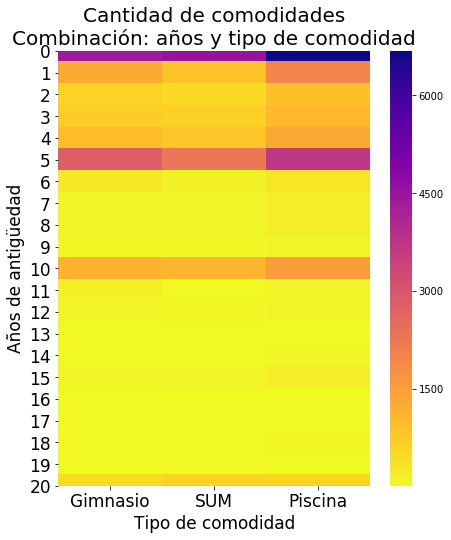

In [183]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_propias[0:21], cmap = 'plasma_r', cbar = True)
# Un _r al final del colormap invierte el sentido.
plot.set_title('Cantidad de comodidades\nCombinación: años y tipo de comodidad',fontsize = 20)
plot.set_xlabel('Tipo de comodidad', fontsize = 17)
plot.set_ylabel('Años de antigüedad', fontsize = 17)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

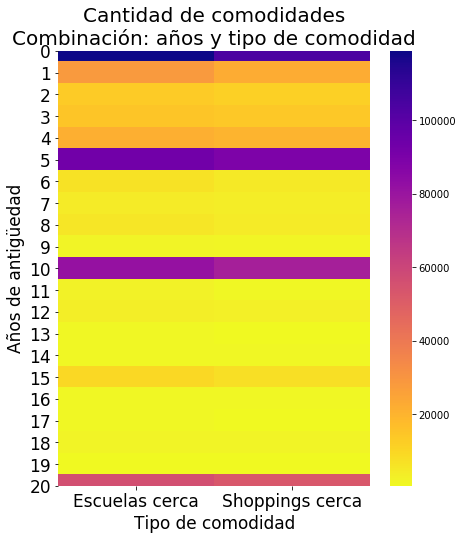

In [184]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_compartidas[0:21]*5, cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de comodidades\nCombinación: años y tipo de comodidad',fontsize = 20)
plot.set_xlabel('Tipo de comodidad', fontsize = 17)
plot.set_ylabel('Años de antigüedad', fontsize = 17)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

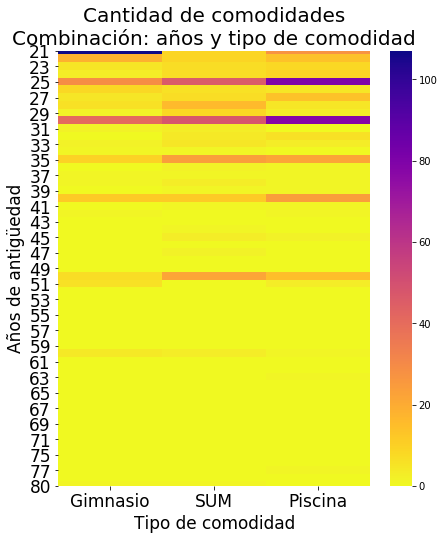

In [185]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_propias[21:81], cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de comodidades\nCombinación: años y tipo de comodidad',fontsize = 20)
plot.set_xlabel('Tipo de comodidad', fontsize = 17)
plot.set_ylabel('Años de antigüedad', fontsize = 17)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

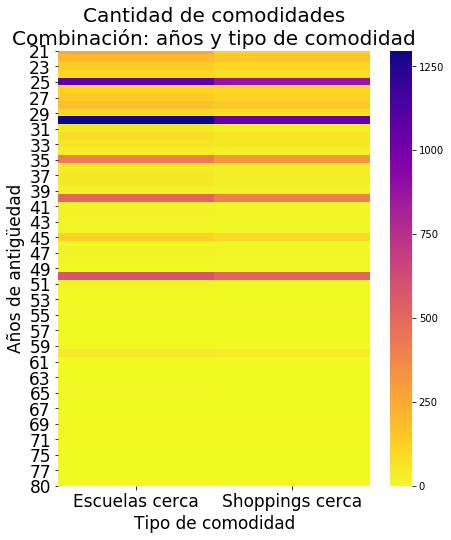

In [186]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_compartidas[21:81], cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de comodidades\nCombinación: años y tipo de comodidad',fontsize = 20)
plot.set_xlabel('Tipo de comodidad', fontsize = 17)
plot.set_ylabel('Años de antigüedad', fontsize = 17)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

In [187]:
df_comodidad = dfok[['Provincia', \
                     'TieneGimnasio', \
                     'TieneUsosMultiples', \
                     'TienePileta', \
                     'TieneEscuelasCerca', \
                     'TieneShoppingsCerca']].copy() # El copy es para diferenciarlo de dfok
# Se cambian tipos, salvo el de Provincia para detectar los casos nulos.
df_comodidad['TieneGimnasio'] = df_comodidad['TieneGimnasio'].astype(np.uint8)
df_comodidad['TieneUsosMultiples'] = df_comodidad['TieneUsosMultiples'].astype(np.uint8)
df_comodidad['TienePileta'] = df_comodidad['TienePileta'].astype(np.uint8)
df_comodidad['TieneEscuelasCerca'] = df_comodidad['TieneEscuelasCerca'].astype(np.uint8)
df_comodidad['TieneShoppingsCerca'] = df_comodidad['TieneShoppingsCerca'].astype(np.uint8)

In [188]:
# Se buscan los casos nulos y se calcula su proporción en los totales.
print('Casos nulos:')
print(df_comodidad.isnull().sum())
print('\nPropoción de casos nulos:', round(df_comodidad.isnull().sum().sum()/len(df_comodidad), 5))

Casos nulos:
Provincia              155
TieneGimnasio            0
TieneUsosMultiples       0
TienePileta              0
TieneEscuelasCerca       0
TieneShoppingsCerca      0
dtype: int64

Propoción de casos nulos: 0.00065


In [189]:
# Se remueven los casos nulos.
df_comodidad.dropna(inplace = True)

In [190]:
# Se crea un nuevo DataFrame para el countplot. Solo se guardan los casos que poseen alguna comodidad.
# Se usan los noombres de las provincias y el tipo de comodidad. Luego se toman solo los casos que sí
# poseen la comodidad. Al final los tipos de comodidad se condensan en una sola columna: Comodidad.

# Gimnasio
como_gim = df_comodidad[['Provincia', 'TieneGimnasio']]
como_gim = como_gim.loc[como_gim['TieneGimnasio'] == 1].copy()
como_gim['TieneGimnasio'].replace({1:'Gimnasio'}, inplace = True)
como_gim.rename(columns = {'TieneGimnasio': 'Comodidad'}, inplace = True)

# Salón de Usos Múltiples
como_sum = df_comodidad[['Provincia', 'TieneUsosMultiples']]
como_sum = como_sum.loc[como_sum['TieneUsosMultiples'] == 1].copy()
como_sum['TieneUsosMultiples'].replace({1:'Salón Usos Múlt.'}, inplace = True)
como_sum.rename(columns = {'TieneUsosMultiples': 'Comodidad'}, inplace = True)

# Piscina
como_pil = df_comodidad[['Provincia', 'TienePileta']]
como_pil = como_pil.loc[como_pil['TienePileta'] == 1].copy()
como_pil['TienePileta'].replace({1:'Piscina'}, inplace = True)
como_pil.rename(columns = {'TienePileta': 'Comodidad'}, inplace = True)

# Escuelas cercanas
como_esc = df_comodidad[['Provincia', 'TieneEscuelasCerca']]
como_esc = como_esc.loc[como_esc['TieneEscuelasCerca'] == 1].copy()
como_esc['TieneEscuelasCerca'].replace({1:'Escuelas cerca'}, inplace = True)
como_esc.rename(columns = {'TieneEscuelasCerca': 'Comodidad'}, inplace = True)

# Centros Comerciales cercanos
como_ccc = df_comodidad[['Provincia', 'TieneShoppingsCerca']]
como_ccc = como_ccc.loc[como_ccc['TieneShoppingsCerca'] == 1].copy()
como_ccc['TieneShoppingsCerca'].replace({1:'Centros com. cerca'}, inplace = True)
como_ccc.rename(columns = {'TieneShoppingsCerca': 'Comodidad'}, inplace = True)

# Se unen los DataFrames por la columna Comodidad.
concatenado = pd.concat([como_gim, como_sum], sort = False)
concatenado = pd.concat([concatenado, como_pil], sort = False).copy()
concatenado = pd.concat([concatenado, como_esc], sort = False).copy()
concatenado = pd.concat([concatenado, como_ccc], sort = False).copy()

In [191]:
concatenado_propias = \
    concatenado\
        .loc[(concatenado['Comodidad'] != 'Escuelas cerca') & \
             (concatenado['Comodidad'] != 'Centros com. cerca')]\
        .copy()

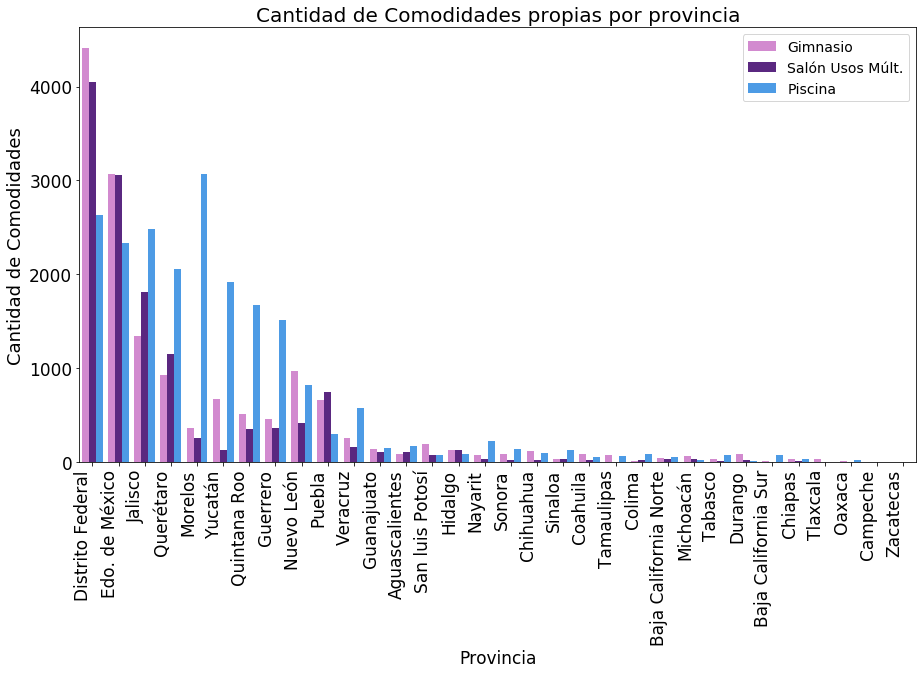

In [192]:
plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado_propias, \
                 order = concatenado_propias['Provincia'].value_counts().index, \
                 palette = ['orchid', 'indigo', 'dodgerblue'], \
                 linewidth = 0, edgecolor = 'dimgrey', \
                 alpha = 0.9) # 'hls' 'husl'
g.set_title('Cantidad de Comodidades propias por provincia', fontsize=20)
g.set_xlabel('Provincia', fontsize=17, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize=18)
plt.xticks(fontsize=17, rotation = 90, ha = 'right')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.show()

In [193]:
concatenado_compartidas = \
    concatenado\
        .loc[(concatenado['Comodidad'] == 'Escuelas cerca') | \
             (concatenado['Comodidad'] == 'Centros com. cerca')]\
        .copy()

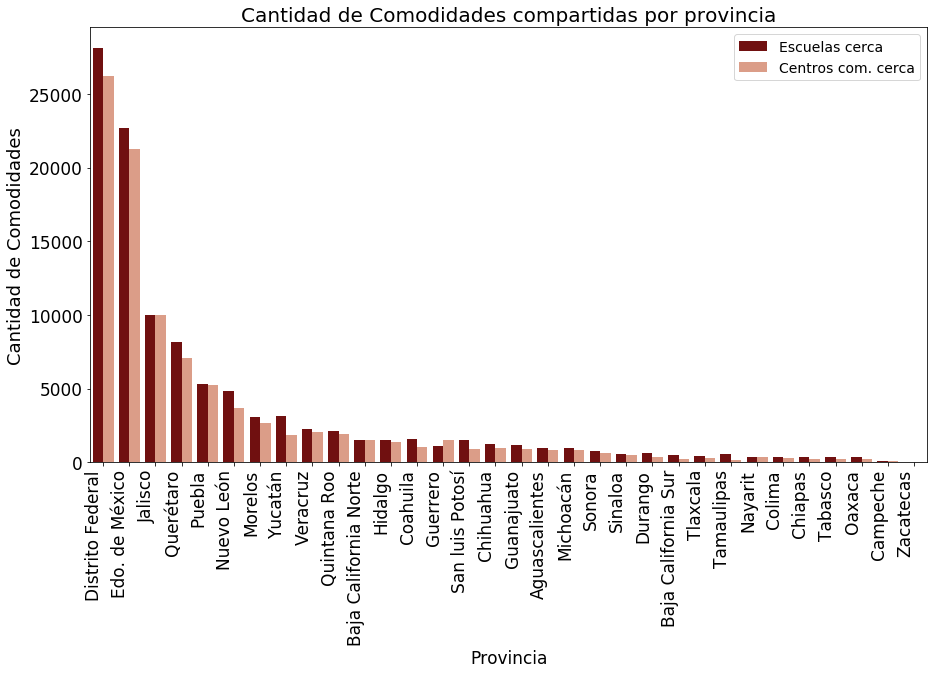

In [194]:
plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado_compartidas, \
                 order = concatenado_compartidas['Provincia'].value_counts().index, \
                 linewidth = 0, edgecolor = 'dimgray', \
                 palette = ['maroon', 'darksalmon']) #['darkgoldenrod', 'gold'] 'hls' 'husl'
g.set_title('Cantidad de Comodidades compartidas por provincia', fontsize=20)
g.set_xlabel('Provincia', fontsize=17, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize=18)
plt.xticks(fontsize=17, rotation = 90, ha = 'right')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.show()

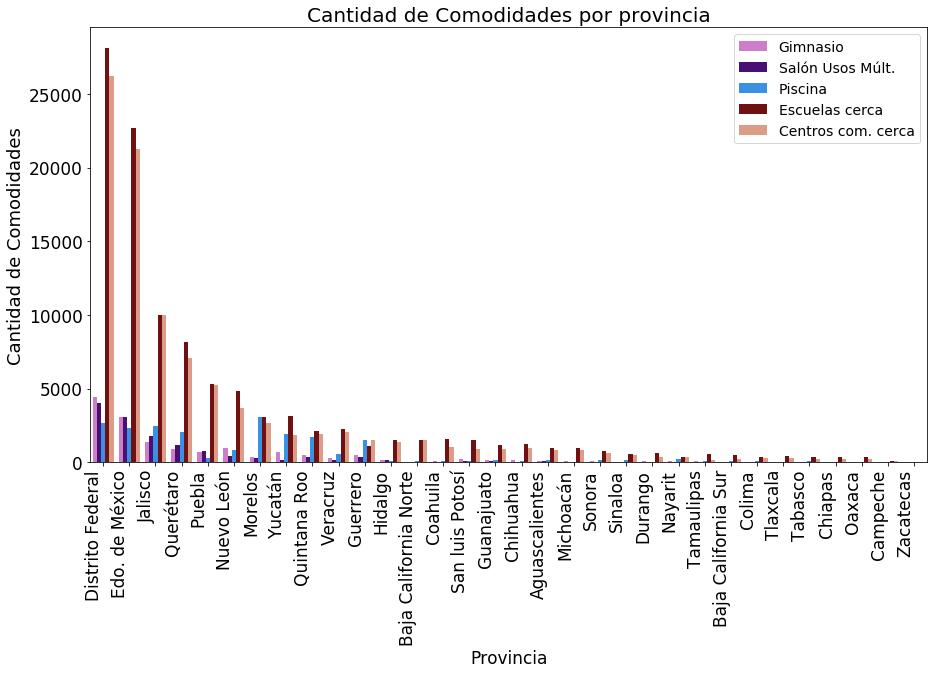

In [195]:
plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado, \
                 order = concatenado['Provincia'].value_counts().index, \
                 palette = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
                 linewidth = 0, edgecolor = 'dimgray') # 'hls' 'husl'
g.set_title('Cantidad de Comodidades por provincia', fontsize=20)
g.set_xlabel('Provincia', fontsize=17, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize=18)
plt.xticks(fontsize=17, rotation = 90, ha = 'right')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.show()

In [196]:
dfok2 = pd.DataFrame(dfok)
dfok2['NoTieneLujos']=((dfok['TienePileta']==0) & 
                    (dfok['TieneGimnasio']==0) & 
                    (dfok['TieneUsosMultiples']==0) &
                       (dfok['CantGarages']<=1))

In [197]:
propiedadesSinLujos=dfok2[ (dfok2['NoTieneLujos']) ]

In [198]:
Simples=propiedadesSinLujos #simples son,entonces,viviendas propiedades sin lujos
Simples['Precio'].mean() 

1535417.658168542

In [199]:
ConGimnasio=dfok[ (dfok['TieneGimnasio'] >= 1) ]
ConGimnasio['Precio'].median()

3233000.0

In [200]:
ConPileta=dfok[ (dfok['TienePileta'] >= 1) ]
ConPileta['Precio'].median()

2750000.0

In [201]:
ConSalonMultiple=dfok[ (dfok['TieneUsosMultiples'] == 1)  ]
ConSalonMultiple['Precio'].mean()

3827091.0210255636

In [202]:
ConMasDeUnGarage=dfok[ (dfok['CantGarages'] > 1) ]
ConMasDeUnGarage['Precio'].median()
#Esto se considera como un lujo porque la gran mayoria de las familias puede vivir con un unico auto

2400000.0

'Si bien a partir de estos datos es facil asumir que la prescencia de un gimnasio,una pileta o un salon \nmultiple aumentan en gran medida el valor de una casas,puede no necesariamente ser asi,como se vera a continuacion'

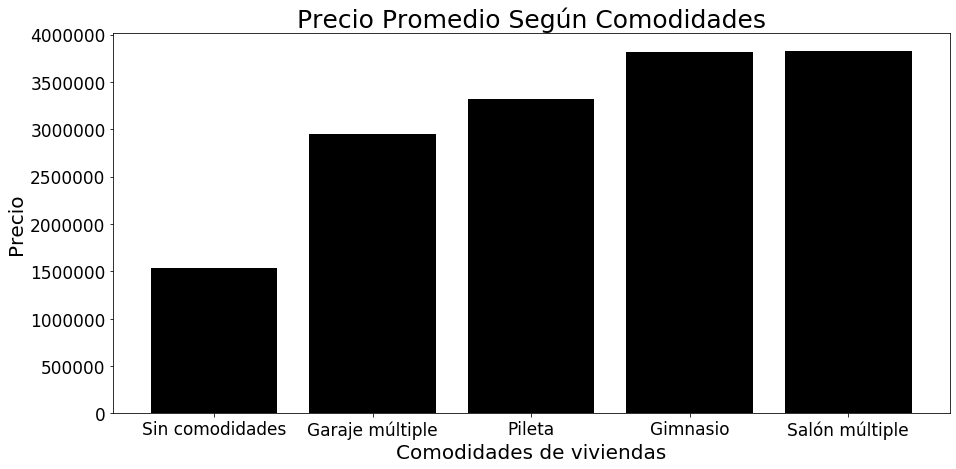

In [203]:
AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comodidades', 'Garaje múltiple' , 'Pileta','Gimnasio','Salón múltiple'], \
                       'Precio':[Simples['Precio'].mean() , ConMasDeUnGarage['Precio'].mean() , \
                        ConPileta['Precio'].mean() , ConGimnasio['Precio'].mean(), \
                              ConSalonMultiple['Precio'].mean()]})      

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidades de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

    
'''Si bien a partir de estos datos es facil asumir que la prescencia de un gimnasio,una pileta o un salon 
multiple aumentan en gran medida el valor de una casas,puede no necesariamente ser asi,como se vera a continuacion'''

In [204]:
SoloConGimnasio=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]

In [205]:
SoloConPileta=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]

In [206]:
SoloConMasDeUnGarage=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] > 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]

In [207]:
SoloConSalonMultiple=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

'De aqui se puede ver mejor cómo la presencia de un unico atributo de estos no parece aumentar el precio\nde una vivienda en mucho mas del %30, a exepcion de la cantidad de garages. \nPor lo que el aumento que incialmente parecia ser mayor se debe a que si en una casa se encuentra uno de estos\natributos,hay una gran probabilidad de tenga otros que aumenten su valor aun mas'

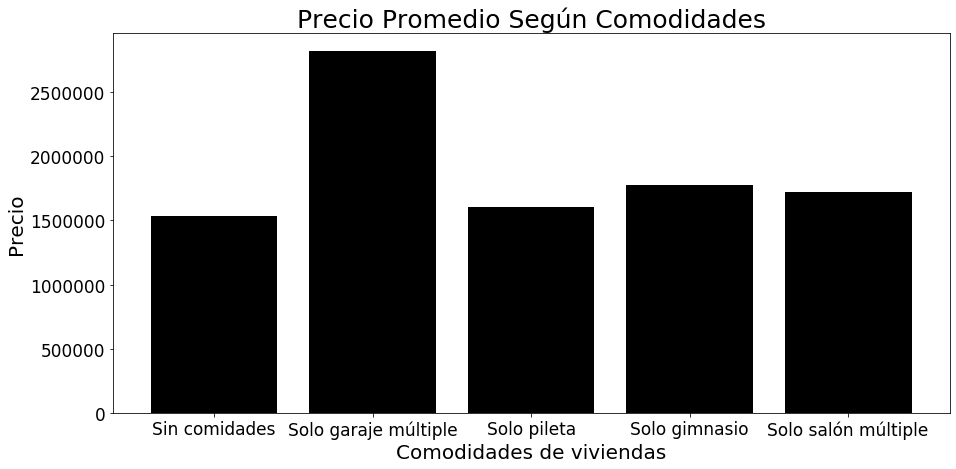

In [208]:
AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comidades', 'Solo garaje múltiple' , 'Solo pileta','Solo gimnasio','Solo salón múltiple'], \
                       'Precio':[Simples['Precio'].mean() , SoloConMasDeUnGarage['Precio'].mean() , \
                        SoloConPileta['Precio'].mean() , SoloConGimnasio['Precio'].mean(), \
                              SoloConSalonMultiple['Precio'].mean()]})
AtributosPrescindibles.head()       

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidades de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

'''De aqui se puede ver mejor cómo la presencia de un unico atributo de estos no parece aumentar el precio
de una vivienda en mucho mas del %30, a exepcion de la cantidad de garages. 
Por lo que el aumento que incialmente parecia ser mayor se debe a que si en una casa se encuentra uno de estos
atributos,hay una gran probabilidad de tenga otros que aumenten su valor aun mas'''

In [209]:
cantidadSimples=len(Simples)
cantidadSimples

80253

In [210]:
cantidadConGimnasio=len(ConGimnasio)
cantidadSoloConGimnasio=len(SoloConGimnasio)

In [211]:
cantidadConPileta=(len(ConPileta))
cantidadSoloConPileta=(len(SoloConPileta))

In [212]:
cantidadConSalonMultiple=(len(ConSalonMultiple))
cantidadSoloConSalonMultiple=(len(SoloConSalonMultiple))

In [213]:
cantidadConMasDeUnGarage=(len(ConMasDeUnGarage))
cantidadSoloConMasDeUnGarage=(len(SoloConMasDeUnGarage))

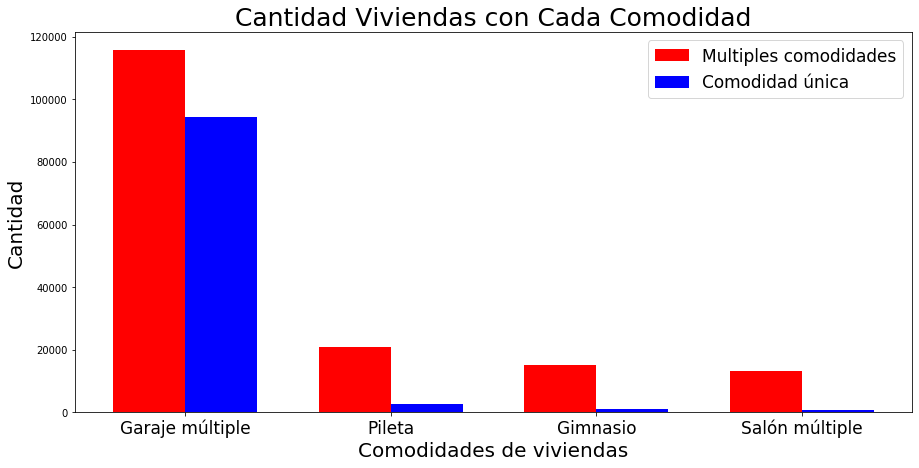

'Aca se puede verificar, puesto que 9 de 10 casas que tengan un gimnasio o una pileta, que tambien tendran otro\natributo similar que eleve aun mas el precio'

In [214]:
labels = ['Garaje múltiple', 'Pileta','Gimnasio', 'Salón múltiple']
MultiplesAtributos = [cantidadConMasDeUnGarage, cantidadConPileta ,cantidadConGimnasio,cantidadConSalonMultiple]
UnicoAtributo = [cantidadSoloConMasDeUnGarage, cantidadSoloConPileta ,cantidadSoloConGimnasio,cantidadSoloConSalonMultiple]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, MultiplesAtributos, width, color='red', label='Multiples comodidades')
rects2 = ax.bar(x + width/2, UnicoAtributo, width, color='blue', label='Comodidad única')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Cantidad Viviendas con Cada Comodidad', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


#autolabel(rects1)
#autolabel(rects2)

plt.show()

'''Aca se puede verificar, puesto que 9 de 10 casas que tengan un gimnasio o una pileta, que tambien tendran otro
atributo similar que eleve aun mas el precio'''

In [215]:
PiletaSinGarages=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['CantGarages'] <= 1)  ]

PiletaConGarages=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['CantGarages'] > 1)  ]

In [216]:
GimnasioSinGarages=dfok[ (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] <= 1) ]

GimnasioConGarages=dfok[ (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] > 1) ]

In [217]:
SalónMultipleSinGarages=dfok[ (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

SalónMultipleConGarages=dfok[ (dfok['CantGarages'] > 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

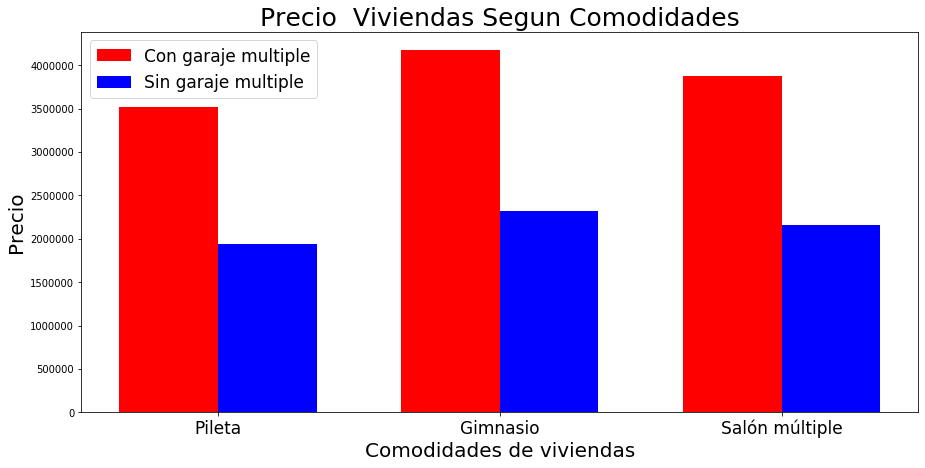

In [218]:
labels = ['Pileta','Gimnasio','Salón múltiple']
ComodidadConGarages = [PiletaConGarages['Precio'].mean(),GimnasioConGarages['Precio'].mean(),SalónMultipleConGarages['Precio'].mean()]
ComodidadSinGarages = [PiletaSinGarages['Precio'].mean(),GimnasioSinGarages['Precio'].mean(),SalónMultipleSinGarages['Precio'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, ComodidadConGarages, width, color='red', label='Con garaje multiple')
rects2 = ax.bar(x + width/2, ComodidadSinGarages, width, color='blue', label='Sin garaje multiple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Precio  Viviendas Segun Comodidades', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


plt.show()

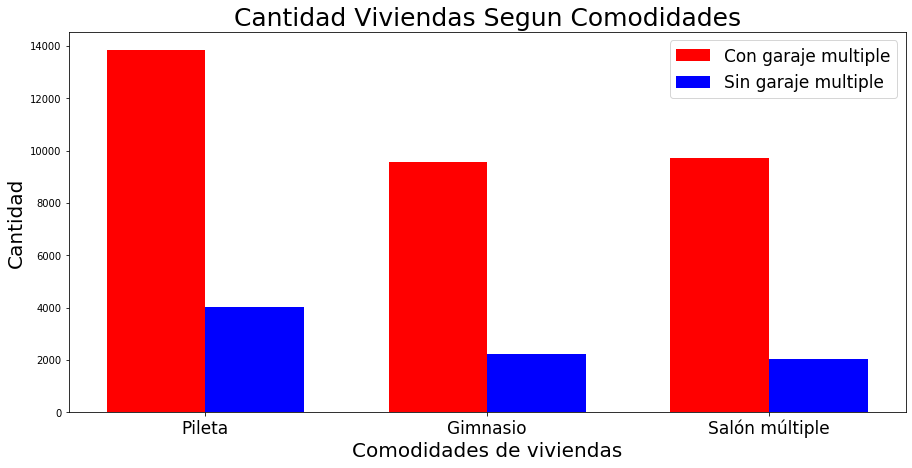

In [219]:
labels = ['Pileta','Gimnasio','Salón múltiple']
ComodidadConGarages = [len(PiletaConGarages),len(GimnasioConGarages),len(SalónMultipleConGarages)]
ComodidadSinGarages = [len(PiletaSinGarages),len(GimnasioSinGarages),len(SalónMultipleSinGarages)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, ComodidadConGarages, width,color='red' ,label='Con garaje multiple')
rects2 = ax.bar(x + width/2, ComodidadSinGarages, width,color='blue', label='Sin garaje multiple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Cantidad Viviendas Segun Comodidades', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


plt.show()

In [220]:
dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['Precio'].median()

1870000.0

In [221]:
dfok[ (dfok['TieneEscuelasCerca'] == 0) ]['Precio'].median()

1850000.0

In [222]:
dfok[ (dfok['TieneShoppingsCerca'] == 1) ]['Precio'].median()

1940500.0

In [223]:
dfok[ (dfok['TieneShoppingsCerca'] == 0) ]['Precio'].median()

1800000.0

In [224]:
dfok['Precio'].median()

1850000.0

'Se puede ver como,el hecho de que esté o no cerca de una escuela no afecta mucho el precio'

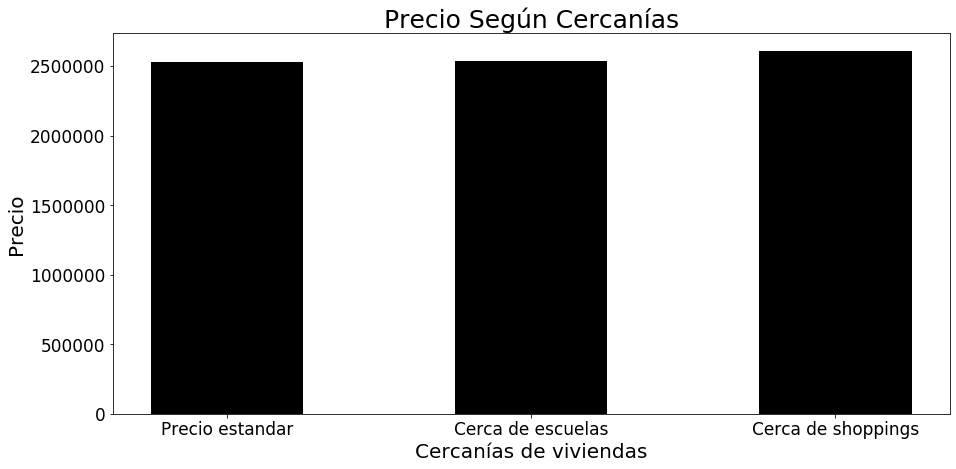

In [225]:
CercaniadeCasas = pd.DataFrame({'Cercania de casas':['Precio estandar', 'Cerca de escuelas' , 'Cerca de shoppings'], \
                       'Precio':[dfok['Precio'].mean(), dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['Precio'].mean() , \
                        dfok[ (dfok['TieneShoppingsCerca'] == 1) ]['Precio'].mean()]})      

x = CercaniadeCasas['Cercania de casas']
y = CercaniadeCasas['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Cercanías de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Según Cercanías")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black',width=0.5)

'''Se puede ver como,el hecho de que esté o no cerca de una escuela no afecta mucho el precio'''

In [226]:
dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['CantHabitaciones'].mean()

2.920578440312413

In [227]:
dfok[ (dfok['TieneEscuelasCerca'] == 0) ]['CantHabitaciones'].mean()

2.8865368622306815

In [228]:
dfok['CantHabitaciones'].mean()

2.902325666922571

In [229]:
'''cantidad de casas cerca de escuelas'''

len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ])

106594

In [230]:
'''cantidad de casas cerca de shoppings'''

len(dfok[ (dfok['TieneShoppingsCerca'] == 1) ])

95168

In [231]:
'''cantidad de casas cerca de ambos'''

len(dfok[ (dfok['TieneEscuelasCerca'] == 1) &  (dfok['TieneShoppingsCerca'] == 1)])

87915

<BarContainer object of 3 artists>

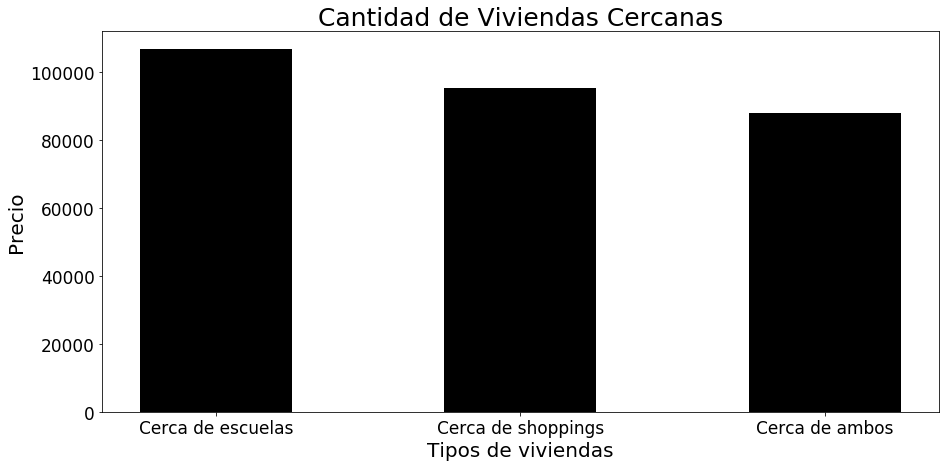

In [232]:
CercaniadeCasas = pd.DataFrame({'Cercania de viviendas':['Cerca de escuelas' , 'Cerca de shoppings', 'Cerca de ambos'], \
                       'Precio':[len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ]),len(dfok[ (dfok['TieneShoppingsCerca'] == 1) ]) , \
                       len(dfok[ (dfok['TieneEscuelasCerca'] == 1) &  (dfok['TieneShoppingsCerca'] == 1)])]})      

x = CercaniadeCasas['Cercania de viviendas']
y = CercaniadeCasas['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Tipos de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Cantidad de Viviendas Cercanas")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black',width=0.5)

In [233]:
''''Efectivamente,casi 9 de casa 10 casas que esten cerca de una escuela,tambien lo estan de un shopping.
Aunque esto tambien se pueda deber a que los lugares donde construir los shoppings se elijan en base a que estén cerca de escuelas para tener una clientela asegurada,por lo que,ovbiamente si una vivienda esta cerca de una escuela,muy probablemente lo este tambien de un shopping'''

"'Efectivamente,casi 9 de casa 10 casas que esten cerca de una escuela,tambien lo estan de un shopping.\nAunque esto tambien se pueda deber a que los lugares donde construir los shoppings se elijan en base a que estén cerca de escuelas para tener una clientela asegurada,por lo que,ovbiamente si una vivienda esta cerca de una escuela,muy probablemente lo este tambien de un shopping"

In [234]:
'''Porcentaje de casas que NO estan cerca de una escuelas y tienen pileta,gimnasio o salon multiple,
vs porcentaje de casas que SI'''

'Porcentaje de casas que NO estan cerca de una escuelas y tienen pileta,gimnasio o salon multiple,\nvs porcentaje de casas que SI'

In [235]:
casasConEscuela=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ])
print(casasConEscuela)

conEscuelaSinGimnasio=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneGimnasio'] == 0) ])
print(conEscuelaSinGimnasio)

ConEscuelaConGimnasio=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneGimnasio'] == 1) ])
print(ConEscuelaConGimnasio)
'''No hay evidencia suficiente para respaldar una correlacion'''

106594
94029
12565


'No hay evidencia suficiente para respaldar una correlacion'

In [236]:
print(casasConEscuela)

conEscuelaSinPileta=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TienePileta'] == 0) ])
print(conEscuelaSinPileta)

conEscuelaConPileta=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TienePileta'] == 1) ])
print(conEscuelaConPileta)
'''Tampoco hay evidencia suficiente para respaldar una correlacion'''

106594
91391
15203


'Tampoco hay evidencia suficiente para respaldar una correlacion'

In [237]:
print(casasConEscuela)

conEscuelaSinZoom=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneUsosMultiples'] == 0) ])
print(conEscuelaSinZoom)

conEscuelaConZoom=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneUsosMultiples'] == 1) ])
print(conEscuelaConZoom)
'''No se observa ninguna correlacion entre la cercania a escuelas con ninguna comodidad'''

106594
95381
11213


'No se observa ninguna correlacion entre la cercania a escuelas con ninguna comodidad'

In [238]:
dfok[dfok['Antiguedad']==10].head()

ID                                                            Titulo  \
1    53461                                    condominio horizontal en venta   
4   185997                                                    paseos del sol   
41  212847                                  departamento en arcos de zapopan   
58  215118  bonito depa en san miguel chapultepec. precio de remate bancario   
60  196970                               funcional, excelentes areas comunes   

         TipoPropiedad   Precio      Fecha  Antiguedad  \
1   Casa en condominio  3600000 2013-06-28        10.0   
4          Apartamento  1150000 2016-06-07        10.0   
41         Apartamento   525000 2016-05-22        10.0   
58         Apartamento   950001 2016-02-03        10.0   
60         Apartamento  4250000 2015-10-05        10.0   

    MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
1                      268.0                   180.0   
4                       95.0                    95.0   
41                      84.0                    84.0   
58                      90.0                     NaN   
60                     175.0                     NaN   

                                                                                            Descripcion  \
1   <p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente ...   
4   bonito departamento en excelentes condiciones muy buena ubicacion listo para habitar llamenos !!...   
41  bonito departamento muy bien ubicado en planta baja a 20 mts de av. arcó del triunfo y a 100 car...   
58                 3 recamaras, 1 1/2 baños , sala, comedor, cocina, area de lavado espacio para 1 auto   
60  departamento en venta \njesus del monte \nsauces \n\n175 mts \n3 recámaras \n3 baños completos \...   

    CantHabitaciones  CantGarages  ...             Direccion  \
1                3.0          2.0  ...            AV. MEXICO   
4                2.0          1.0  ...       PASEOS DEL SOL    
41               2.0          1.0  ...         ARCO PERTINAX   
58               3.0          1.0  ...  GELATI  42, DEPTO. 1   
60               3.0          2.0  ...       Jesus del Monte   

                    Ciudad         Provincia    Latitud   Longitud  \
1   La Magdalena Contreras  Distrito Federal  19.310205 -99.227655   
4                  Zapopan           Jalisco        NaN        NaN   
41                 Zapopan           Jalisco        NaN        NaN   
58          Miguel Hidalgo  Distrito Federal        NaN        NaN   
60            Huixquilucan    Edo. de México  19.372413 -99.293908   

    TieneGimnasio  TieneUsosMultiples  TienePileta  TieneEscuelasCerca  \
1           False               False        False                True   
4           False               False        False               False   
41          False               False        False               False   
58          False               False        False                True   
60          False               False        False               False   

    TieneShoppingsCerca  NoTieneLujos  
1                  True         False  
4                 False          True  
41                False          True  
58                 True          True  
60                False         False  

[5 rows x 24 columns]

In [239]:
PiletaSegunAños=dfok.groupby(['Antiguedad']).agg({"TienePileta" :['mean']})

In [240]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==0])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==0) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 0 con pileta/ Cantidad de casas con antiguedad 0
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.13277043806496475

In [241]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==1])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==1) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 1 con pileta/ Cantidad de casas con antiguedad 1
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.1597992390512426

In [242]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==8])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==8) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 8 con pileta/ Cantidad de casas con antiguedad 8
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.07196029776674938

In [243]:
#Efectivamente,lo fueron
PiletaSegunAños.head(10)

TienePileta
                  mean
Antiguedad            
0.0           0.132770
1.0           0.159799
2.0           0.178691
3.0           0.180377
4.0           0.163142
5.0           0.111308
6.0           0.094352
7.0           0.083578
8.0           0.071960
9.0           0.061033

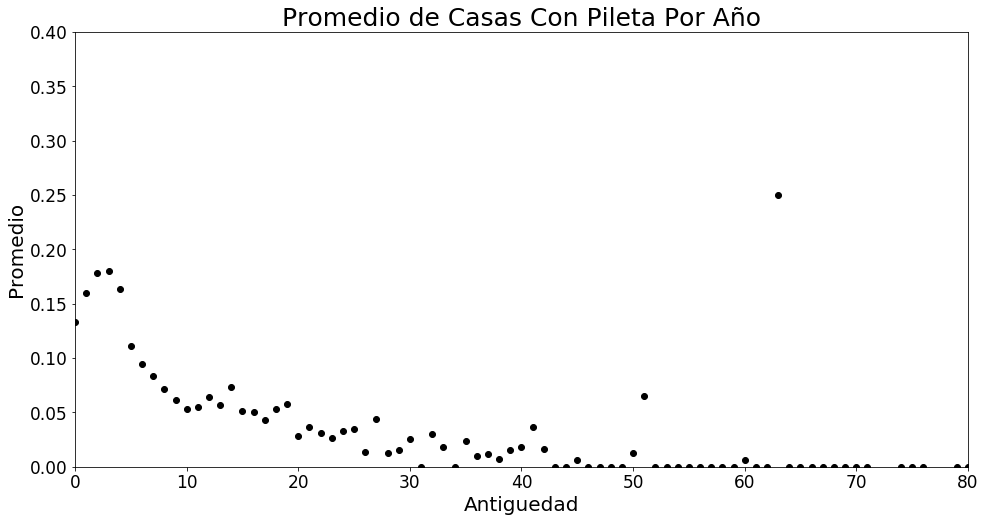

In [244]:
PromedioPiletas= PiletaSegunAños.TienePileta
Antiguedad=PiletaSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioPiletas

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título Promedio de Casas Con Pileta Por Año
plt.title("Promedio de Casas Con Pileta Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.4]);
plt.xlim([0, 80]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, 'o', color='black');

In [245]:
GimnasioSegunAños=dfok.groupby(['Antiguedad']).agg({"TieneGimnasio" :['mean']})

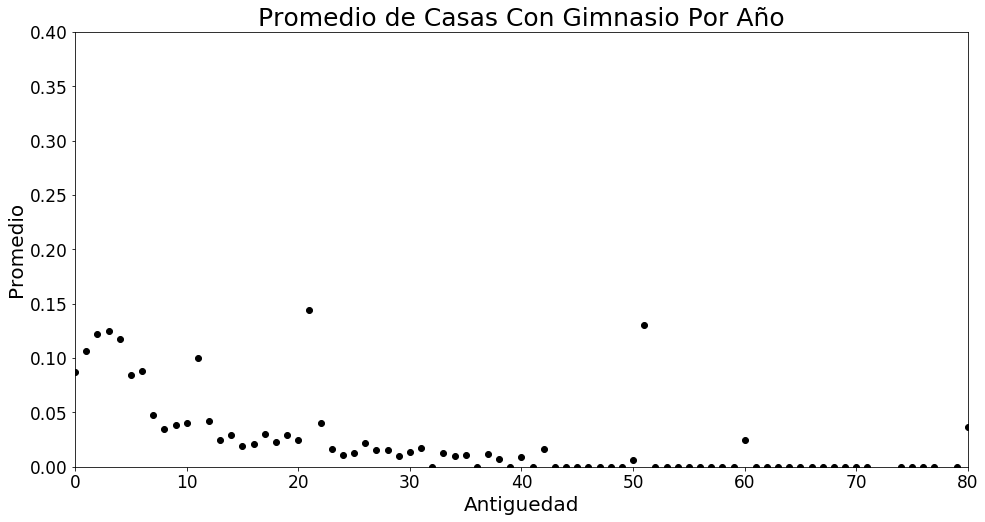

In [246]:
PromedioGimnasios= GimnasioSegunAños.TieneGimnasio
Antiguedad=GimnasioSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioGimnasios

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título
plt.title("Promedio de Casas Con Gimnasio Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.4]);
plt.xlim([0, 80]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, 'o', color='black');

In [247]:
UsosMultiplesSegunAños=dfok.groupby(['Antiguedad']).agg({"TieneUsosMultiples" :['mean']})

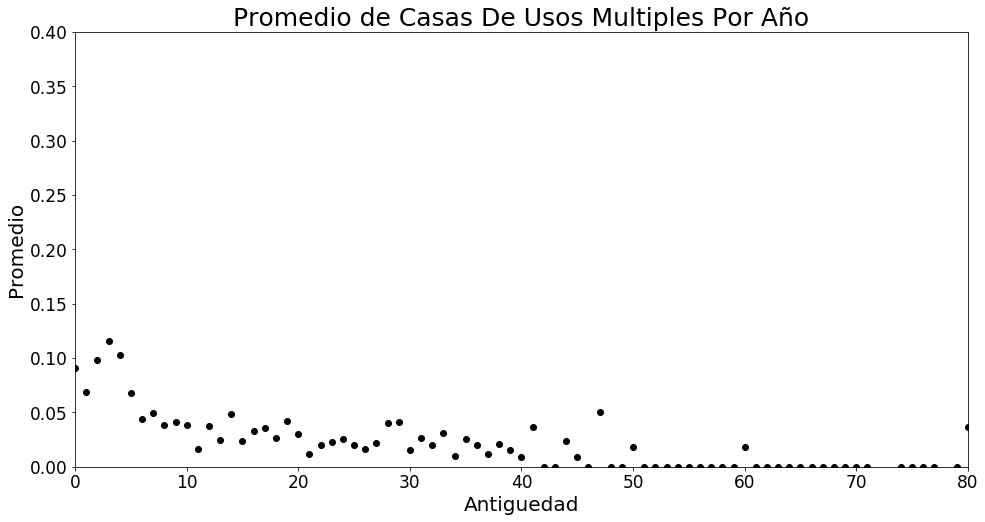

In [248]:
PromedioUsosMultiples= UsosMultiplesSegunAños.TieneUsosMultiples
Antiguedad=UsosMultiplesSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioUsosMultiples

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título
plt.title("Promedio de Casas De Usos Multiples Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.4]);
plt.xlim([0, 80]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, 'o', color='black');